In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

700it [00:00, 710.64it/s]
100%|██████████| 700/700 [00:07<00:00, 98.16it/s] 
8280it [00:00, 246134.48it/s]
7920it [00:00, 244915.64it/s]
710it [00:00, 718.31it/s]
100%|██████████| 710/710 [00:07<00:00, 95.81it/s] 
7920it [00:00, 243874.58it/s]
7560it [00:00, 75733.33it/s]
720it [00:00, 740.49it/s]
100%|██████████| 720/720 [00:07<00:00, 92.20it/s] 
8280it [00:00, 226699.90it/s]
720it [00:00, 784.20it/s]
100%|██████████| 720/720 [00:07<00:00, 93.42it/s] 
8280it [00:00, 236197.57it/s]
700it [00:00, 799.71it/s]
100%|██████████| 700/700 [00:06<00:00, 100.59it/s]
8280it [00:00, 247259.53it/s]
509it [00:00, 988.20it/s] 
100%|██████████| 509/509 [00:02<00:00, 198.93it/s]
3664it [00:00, 244443.68it/s]
700it [00:00, 827.80it/s]
100%|██████████| 700/700 [00:07<00:00, 98.76it/s] 
8280it [00:00, 223033.94it/s]
700it [00:00, 809.04it/s]
100%|██████████| 700/700 [00:07<00:00, 98.98it/s] 
8280it [00:00, 257923.16it/s]
710it [00:01, 406.02it/s]
100%|██████████| 710/710 [00:07<00:00, 94.69it/s] 
8280it 

In [8]:
len(data_train), len(data_val), len(data_test)

(16200, 15480, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [13]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [15]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.23082


100%|██████████| 484/484 [00:37<00:00, 12.98it/s]


Mean val loss: 0.07698


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.11718


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.086817
EarlyStopping counter: 1 out of 10
Epoch 2...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.11245


100%|██████████| 484/484 [00:37<00:00, 12.90it/s]


Mean val loss: 0.073352


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10902


100%|██████████| 484/484 [00:37<00:00, 12.90it/s]


Mean val loss: 0.068597


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.1066


100%|██████████| 484/484 [00:37<00:00, 12.93it/s]


Mean val loss: 0.06316


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10532


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.063543
EarlyStopping counter: 1 out of 10
Epoch 6...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10462


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.062329


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10335


100%|██████████| 484/484 [00:37<00:00, 12.90it/s]


Mean val loss: 0.058548


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10307


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.068021
EarlyStopping counter: 1 out of 10
Epoch 9...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10234


100%|██████████| 484/484 [00:37<00:00, 14.50it/s]


Mean val loss: 0.051284


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10163


100%|██████████| 484/484 [00:37<00:00, 12.90it/s]


Mean val loss: 0.042147


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 11...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10053


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.048486
EarlyStopping counter: 1 out of 10
Epoch 12...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.099876


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.046565
EarlyStopping counter: 2 out of 10
Epoch 13...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.098706


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.048049
EarlyStopping counter: 1 out of 10
Epoch 15...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.098692


100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.040313


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 16...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.098395


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.051664
EarlyStopping counter: 1 out of 10
Epoch 17...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.098732


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.039464


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 18...


 19%|█▊        | 95/507 [00:21<01:25,  4.83it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.046705
EarlyStopping counter: 1 out of 10
Epoch 24...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.09559


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.040104
EarlyStopping counter: 2 out of 10
Epoch 25...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.094203


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.037847
EarlyStopping counter: 3 out of 10
Epoch 26...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.094136


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.041862
EarlyStopping counter: 4 out of 10
Epoch 27...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.093871


 45%|████▌     | 219/484 [00:17<00:19, 13.58it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.091844


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.037617
EarlyStopping counter: 5 out of 10
Epoch 35...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.091959


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.034857


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 36...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.091906


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.038444
EarlyStopping counter: 1 out of 10
Epoch 37...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.091241


100%|██████████| 484/484 [00:37<00:00, 12.90it/s]


Mean val loss: 0.034417


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 38...


  1%|          | 6/507 [00:03<04:21,  1.92it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.090389


100%|██████████| 484/484 [00:37<00:00, 12.93it/s]


Mean val loss: 0.033996


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 44...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.089512


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.033707


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 45...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.090186


100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.033463


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 46...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.089537


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.034003
EarlyStopping counter: 1 out of 10
Epoch 47...


 64%|██████▍   | 325/507 [01:09<00:37,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.088698


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.032896


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 54...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.088268


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.034501
EarlyStopping counter: 1 out of 10
Epoch 55...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.087773


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.034701
EarlyStopping counter: 2 out of 10
Epoch 56...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.087522


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.033331
EarlyStopping counter: 3 out of 10
Epoch 57...


 84%|████████▍ | 428/507 [01:30<00:16,  4.73it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.086411


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.032801
EarlyStopping counter: 4 out of 10
Epoch 65...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.086365


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.032477


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 66...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.086882


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.033105
EarlyStopping counter: 1 out of 10
Epoch 67...


 57%|█████▋    | 287/507 [01:01<00:45,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.033074
EarlyStopping counter: 3 out of 10
Epoch 69...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.086534


 54%|█████▍    | 261/484 [00:20<00:16, 13.55it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.032054
EarlyStopping counter: 1 out of 10
Epoch 77...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.085508


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.031851
EarlyStopping counter: 2 out of 10
Epoch 78...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.084719


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.034044
EarlyStopping counter: 3 out of 10
Epoch 79...


 94%|█████████▎| 475/507 [01:40<00:06,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.033453
EarlyStopping counter: 1 out of 10
Epoch 81...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.084561


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.031906
EarlyStopping counter: 2 out of 10
Epoch 82...


 12%|█▏        | 60/507 [00:14<01:33,  4.78it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.083871


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.032934
EarlyStopping counter: 6 out of 10
Epoch 90...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.083902


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.031203


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 91...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.083136


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.031566
EarlyStopping counter: 1 out of 10
Epoch 92...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.083209


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.031661
EarlyStopping counter: 2 out of 10
Epoch 93...


  0%|          | 1/507 [00:02<17:05,  2.03s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.082765


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.031003
EarlyStopping counter: 4 out of 10
Epoch 101...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.082632


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.031383
EarlyStopping counter: 5 out of 10
Epoch 102...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.082521


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.030946


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 103...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.082667
Epoch   103: reducing learning rate of group 0 to 2.5000e-05.


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.031493
EarlyStopping counter: 1 out of 10
Epoch 104...


 56%|█████▌    | 284/507 [01:01<00:46,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081902


100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.030653


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 113...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081783


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030669
EarlyStopping counter: 1 out of 10
Epoch 114...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081607


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030736
EarlyStopping counter: 2 out of 10
Epoch 115...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081644


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.030602


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 116...


 88%|████████▊ | 446/507 [01:34<00:12,  4.83it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030708
EarlyStopping counter: 1 out of 10
Epoch 125...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081983


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030822
EarlyStopping counter: 2 out of 10
Epoch 126...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081859


100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.030558


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 127...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081427


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030637
EarlyStopping counter: 1 out of 10
Epoch 128...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081616


 47%|████▋     | 227/484 [00:18<00:18, 13.66it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030683
EarlyStopping counter: 6 out of 10
Epoch 137...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.082042


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030634
EarlyStopping counter: 7 out of 10
Epoch 138...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081418


100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.030519


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 139...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081115


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030588
EarlyStopping counter: 1 out of 10
Epoch 140...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.080749


 84%|████████▎ | 405/484 [00:31<00:05, 13.87it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081398


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.03049
EarlyStopping counter: 1 out of 10
Epoch 149...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081199


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030498
EarlyStopping counter: 2 out of 10
Epoch 150...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081155


100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.03047


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 151...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081504


100%|██████████| 484/484 [00:37<00:00, 12.88it/s]


Mean val loss: 0.030444


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 152...


 17%|█▋        | 84/507 [00:19<01:28,  4.80it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081063


100%|██████████| 484/484 [00:37<00:00, 12.90it/s]


Mean val loss: 0.030438


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 161...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081751


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030538
EarlyStopping counter: 1 out of 10
Epoch 162...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.082197


100%|██████████| 484/484 [00:37<00:00, 12.85it/s]


Mean val loss: 0.030439


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 163...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081295


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030484
EarlyStopping counter: 1 out of 10
Epoch 164...


 53%|█████▎    | 270/507 [00:58<00:49,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081319


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030486
EarlyStopping counter: 4 out of 10
Epoch 173...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081172


100%|██████████| 484/484 [00:37<00:00, 14.41it/s]


Mean val loss: 0.030441


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 174...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081219


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030469
EarlyStopping counter: 1 out of 10
Epoch 175...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081431


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030452
EarlyStopping counter: 2 out of 10
Epoch 176...


 78%|███████▊  | 395/507 [01:24<00:23,  4.83it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.080732


100%|██████████| 484/484 [00:37<00:00, 12.87it/s]


Mean val loss: 0.030417


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 185...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.080699


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030452
EarlyStopping counter: 1 out of 10
Epoch 186...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.080716


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.030422


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 187...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081307


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030493
EarlyStopping counter: 1 out of 10
Epoch 188...


  8%|▊         | 41/507 [00:10<01:36,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081148


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030433
EarlyStopping counter: 7 out of 10
Epoch 197...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.08107


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030428
EarlyStopping counter: 8 out of 10
Epoch 198...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081101


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030441
EarlyStopping counter: 9 out of 10
Epoch 199...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.080675


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.030438
EarlyStopping counter: 10 out of 10


 78%|███████▊  | 202/259 [01:55<00:32,  1.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 259/259 [02:31<00:00,  1.88it/s]


## Dump experiment results

In [16]:
import pickle
import json

In [17]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# p = 'carb96558_exp_results.pkl'
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [27]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [16]:
model_conf

{'device': 'cpu', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [19]:
import torch
model.load_state_dict(torch.load('./{}_exp_model.torch'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [18]:
from itertools import chain

In [19]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [20]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

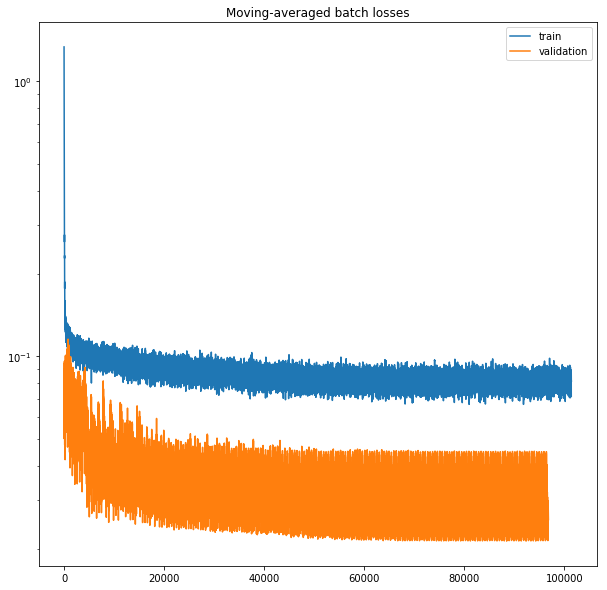

In [21]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [22]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

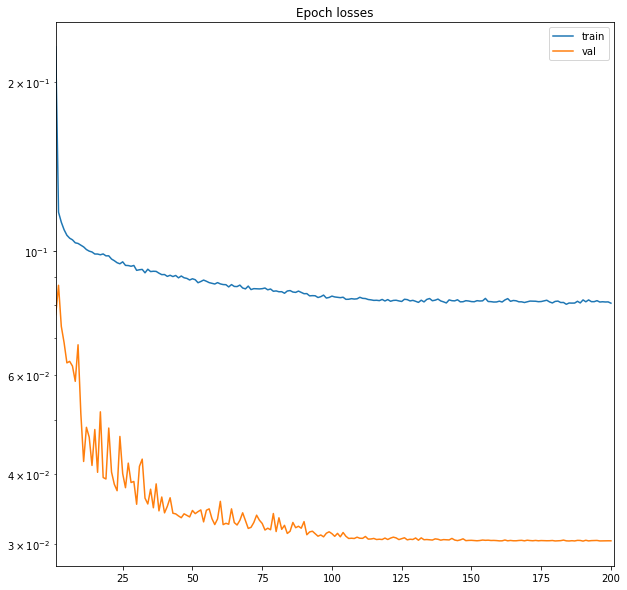

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [24]:
import os

In [25]:
import torch

In [26]:
from visualization_utils import output_to_binary, plot_sample

In [27]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

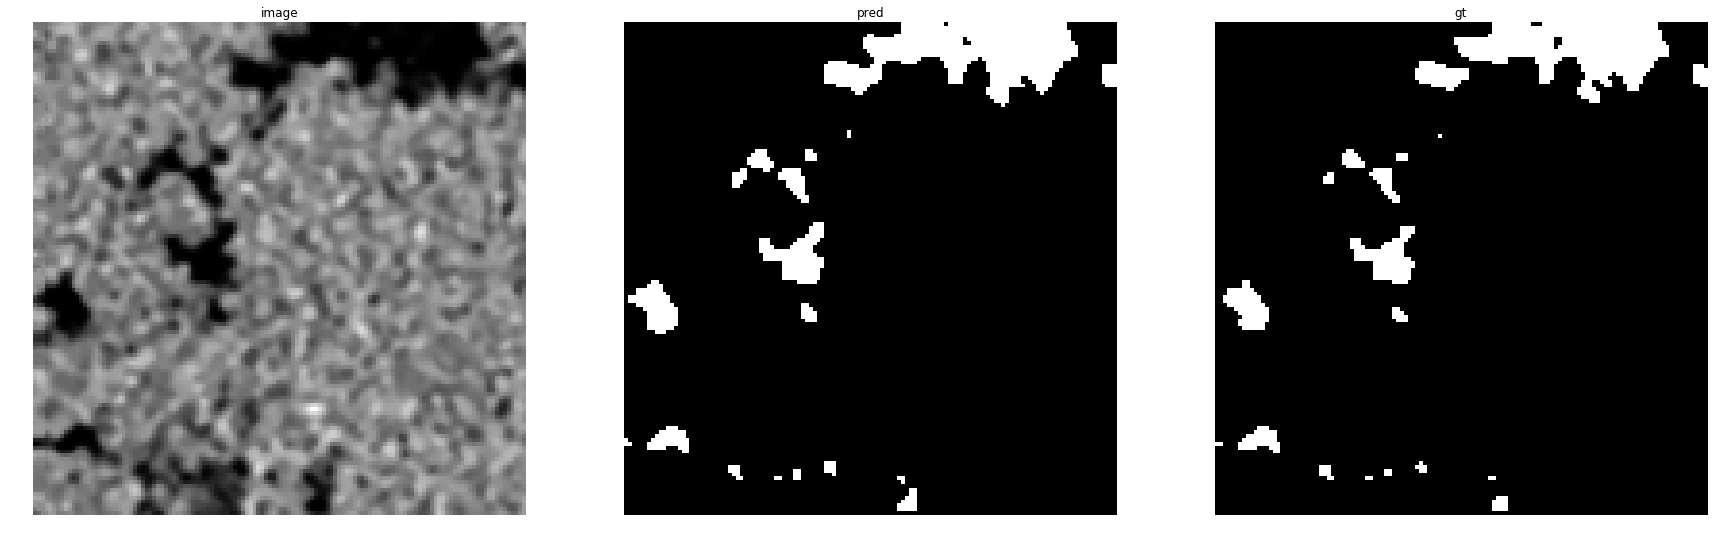

accuracy    : 0.99224853515625
precision   : 0.899119295436349
recall      : 0.9991103202846975
f1          : 0.9464812473662031
pr_auc      : 0.9981663258686557
iou         : 0.8984


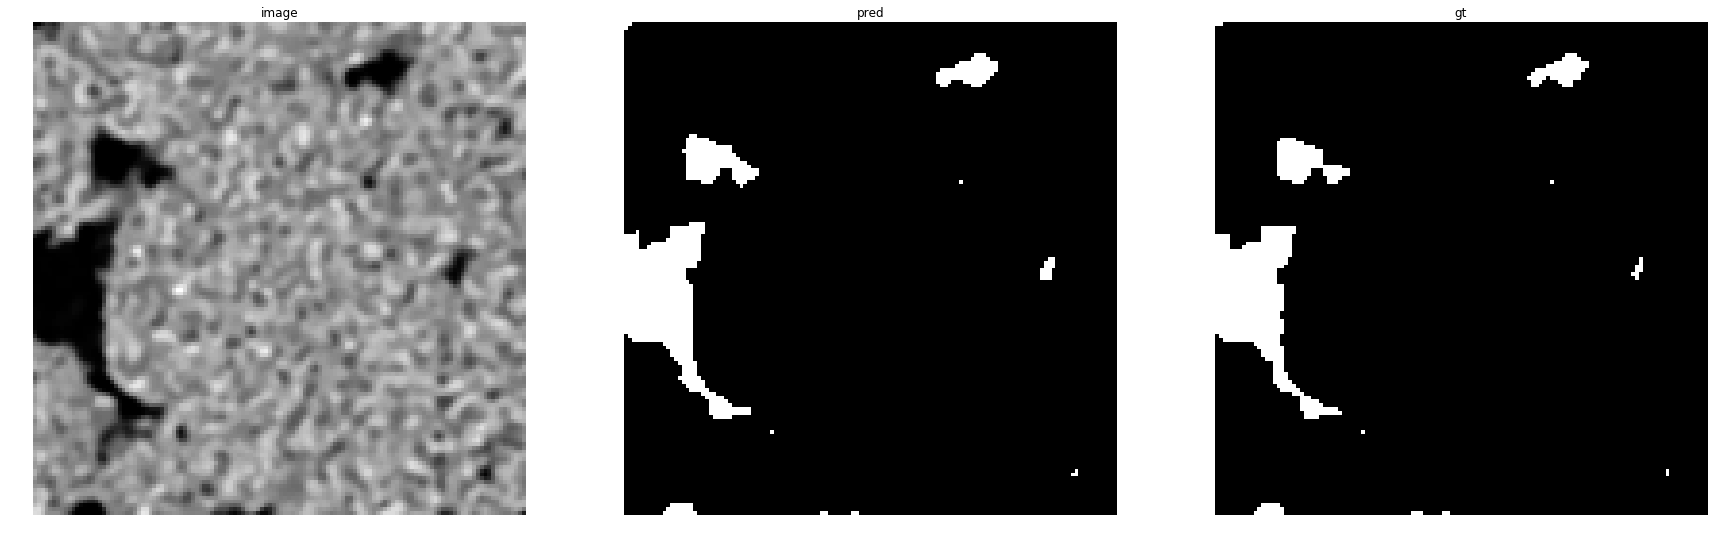

accuracy    : 0.9957275390625
precision   : 0.9253246753246753
recall      : 0.9988317757009346
f1          : 0.9606741573033708
pr_auc      : 0.999096721018316
iou         : 0.9243243243243243


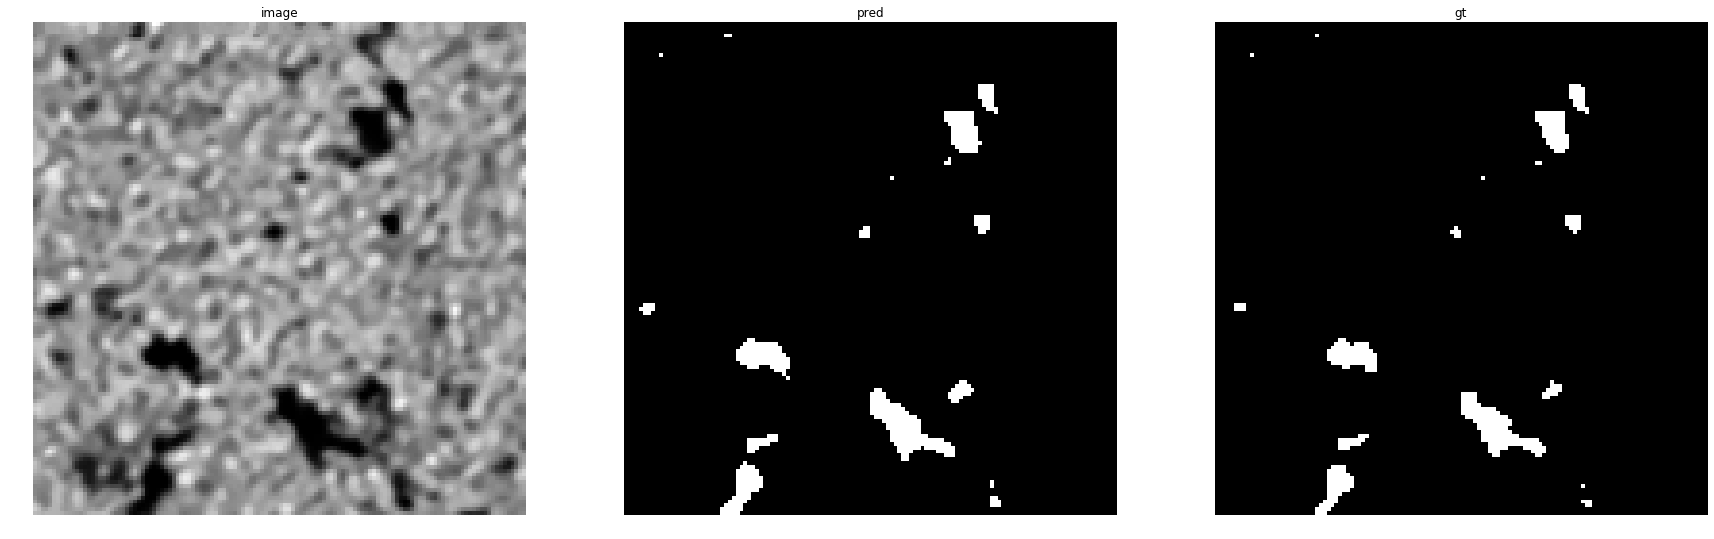

accuracy    : 0.9957275390625
precision   : 0.8673076923076923
recall      : 0.9977876106194691
f1          : 0.9279835390946503
pr_auc      : 0.9959496109036012
iou         : 0.8656429942418427


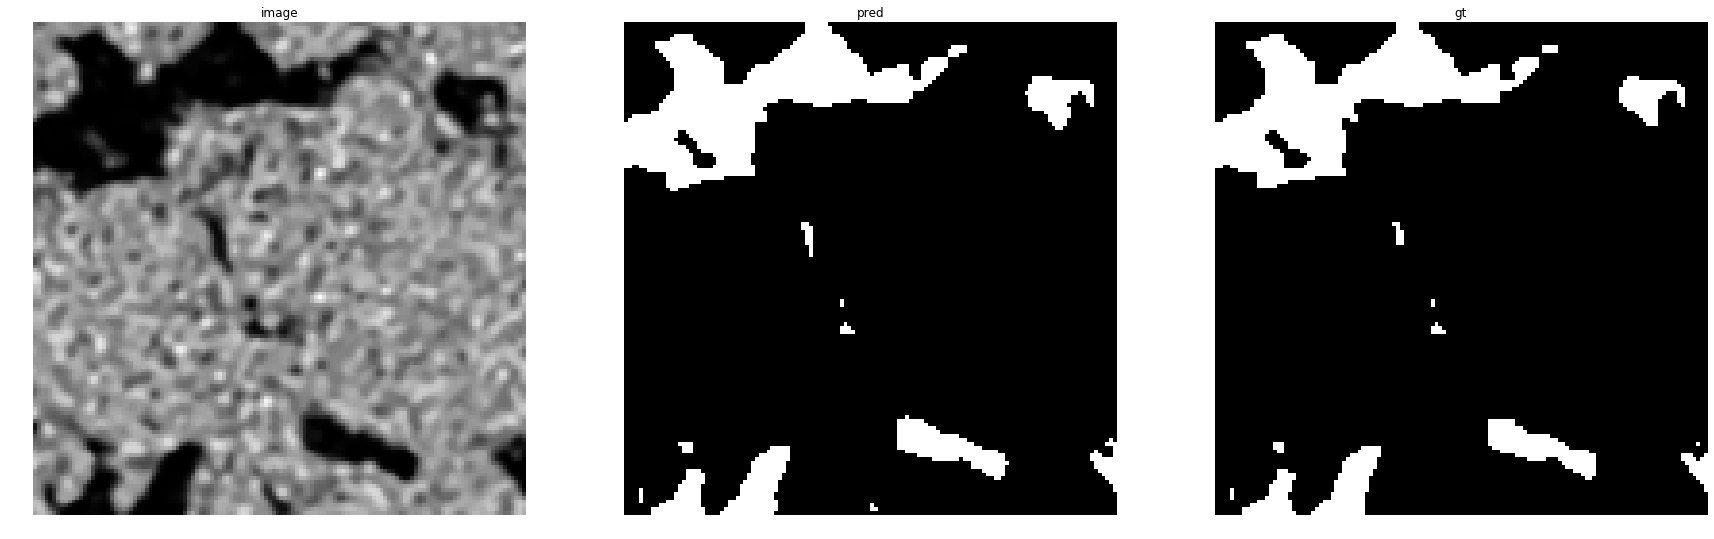

accuracy    : 0.992919921875
precision   : 0.946983546617916
recall      : 1.0
f1          : 0.9727699530516433
pr_auc      : 0.9995759816371843
iou         : 0.946983546617916


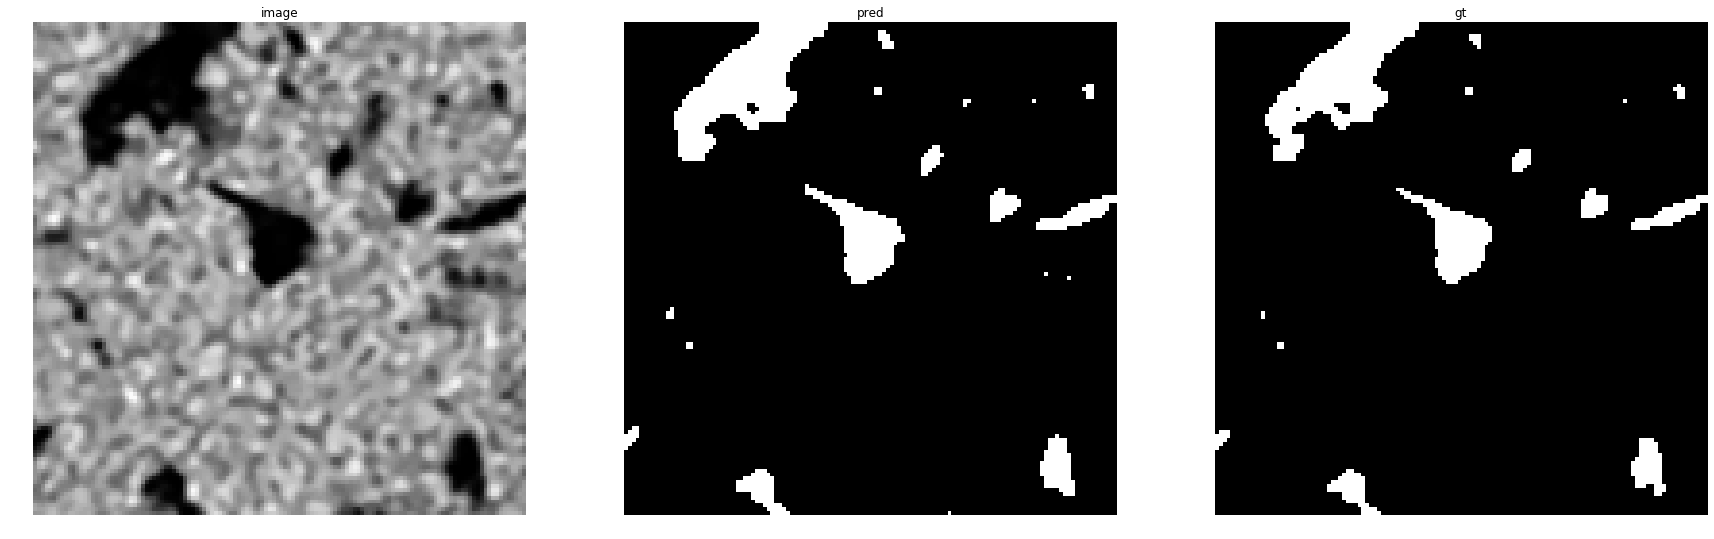

accuracy    : 0.99298095703125
precision   : 0.9122807017543859
recall      : 1.0
f1          : 0.9541284403669724
pr_auc      : 0.9986020213340165
iou         : 0.9122807017543859


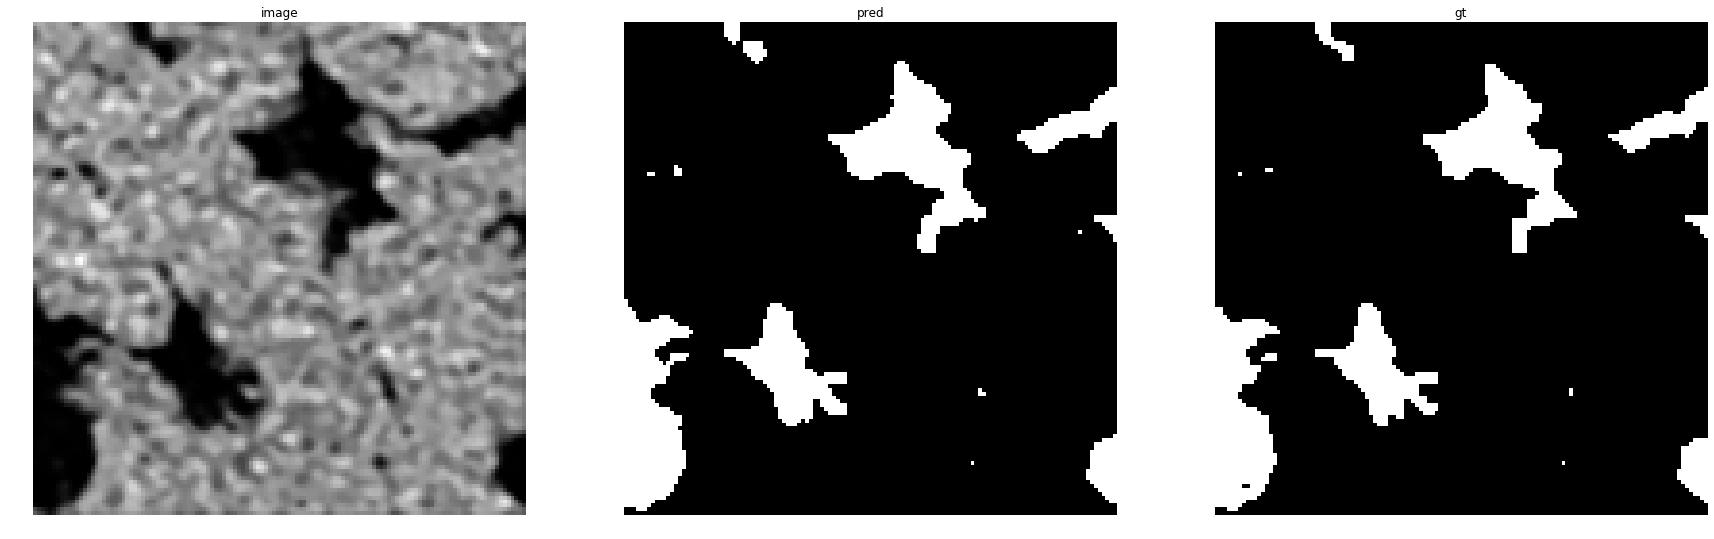

accuracy    : 0.9901123046875
precision   : 0.9274156264447526
recall      : 0.9975136747886624
f1          : 0.9611883085769046
pr_auc      : 0.9988263834709636
iou         : 0.9252767527675276


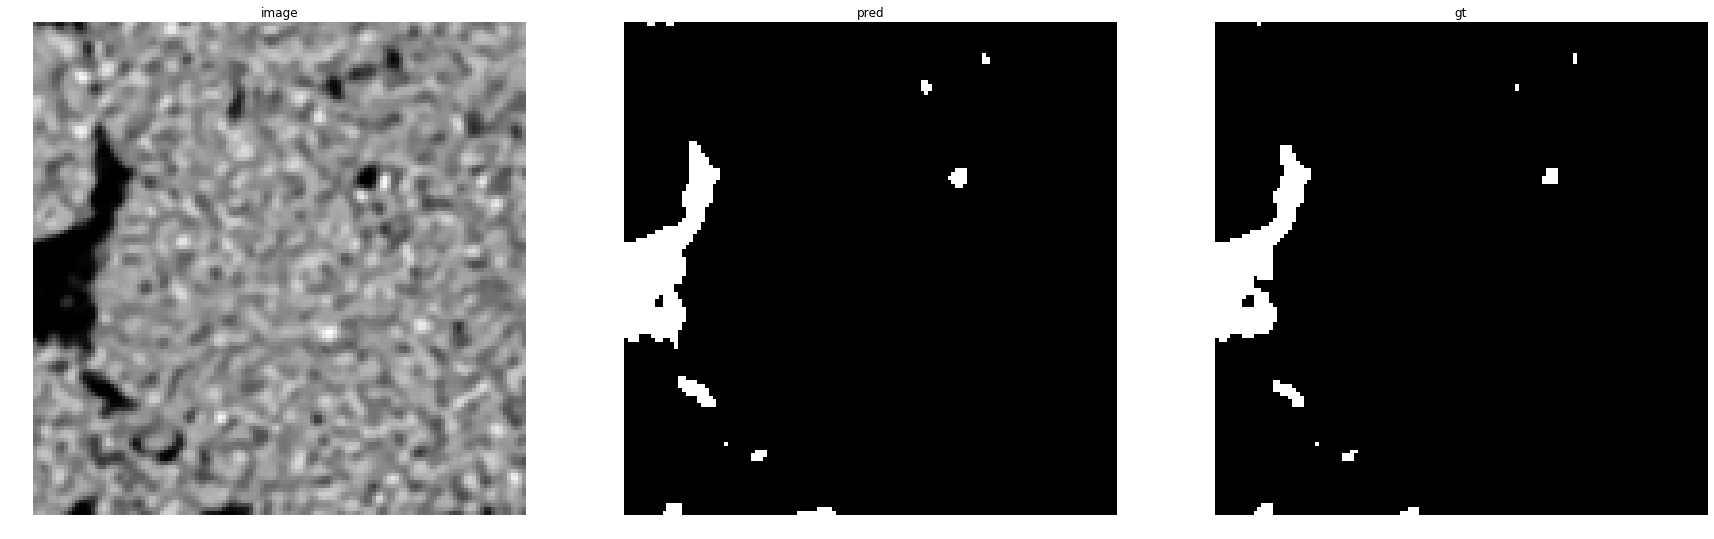

accuracy    : 0.99493408203125
precision   : 0.8766716196136701
recall      : 1.0
f1          : 0.934283452098179
pr_auc      : 0.9977721463805971
iou         : 0.8766716196136701


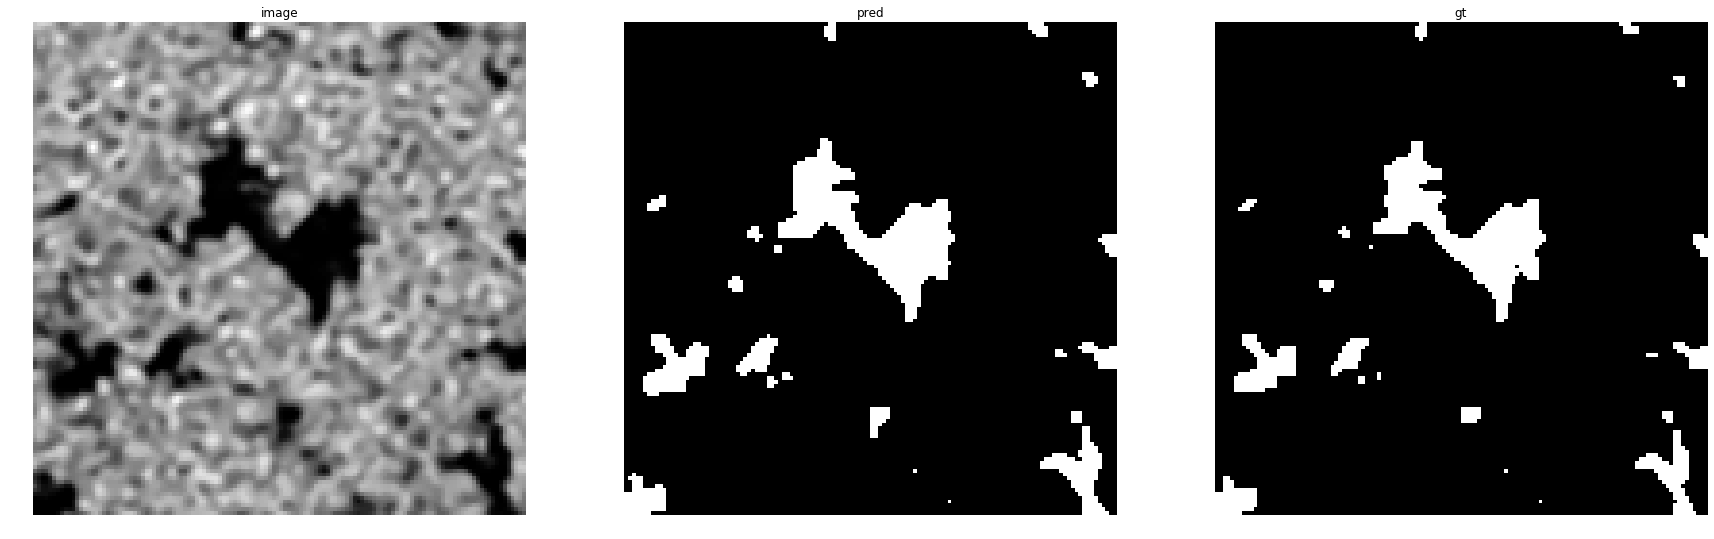

accuracy    : 0.98980712890625
precision   : 0.8802008608321378
recall      : 1.0
f1          : 0.9362838611217092
pr_auc      : 0.9981344803179154
iou         : 0.8802008608321378


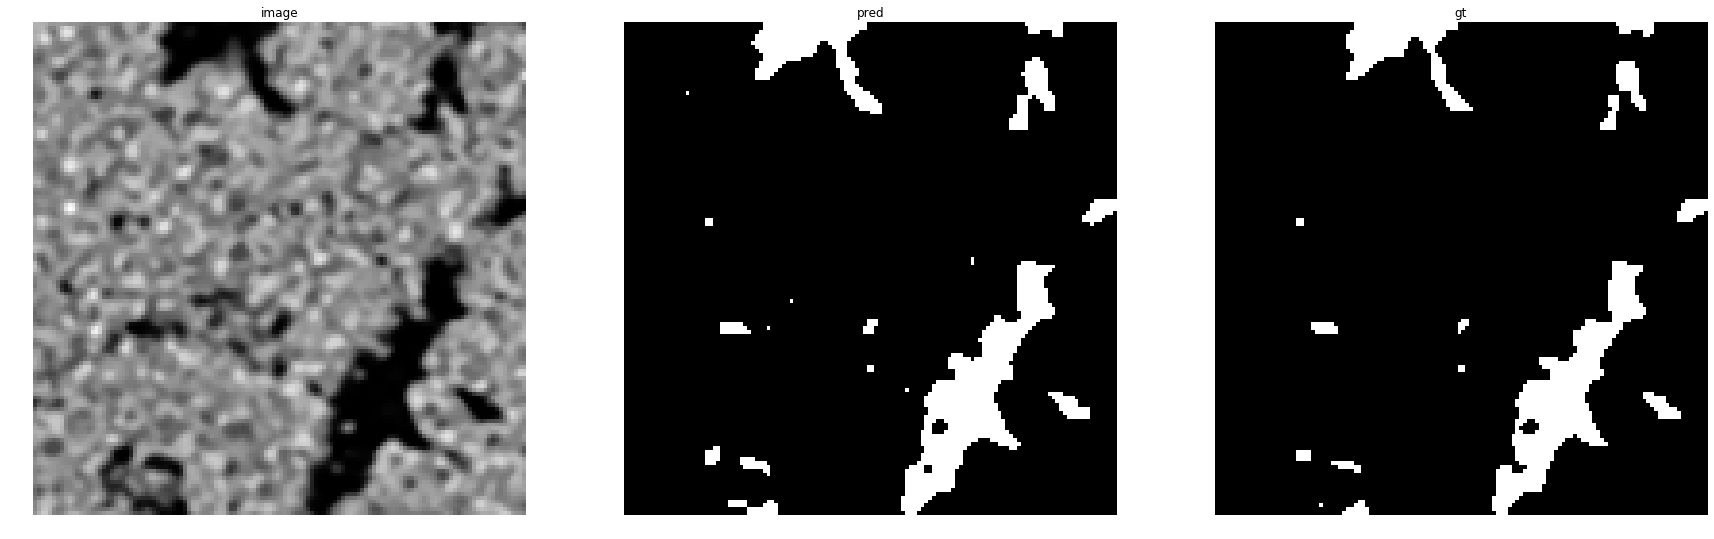

accuracy    : 0.99072265625
precision   : 0.8965986394557823
recall      : 1.0
f1          : 0.945480631276901
pr_auc      : 0.9987620560026071
iou         : 0.8965986394557823


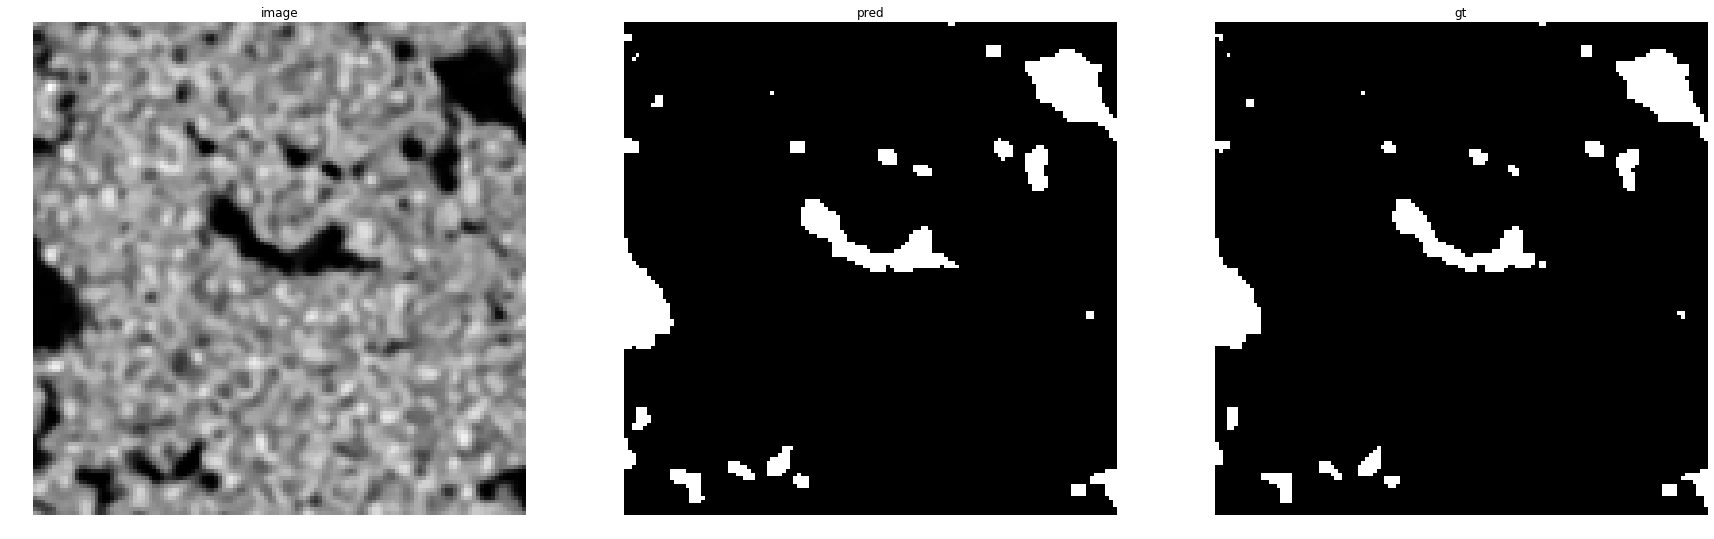

accuracy    : 0.992431640625
precision   : 0.8915135608048994
recall      : 1.0
f1          : 0.9426456984273821
pr_auc      : 0.9980098016517642
iou         : 0.8915135608048994


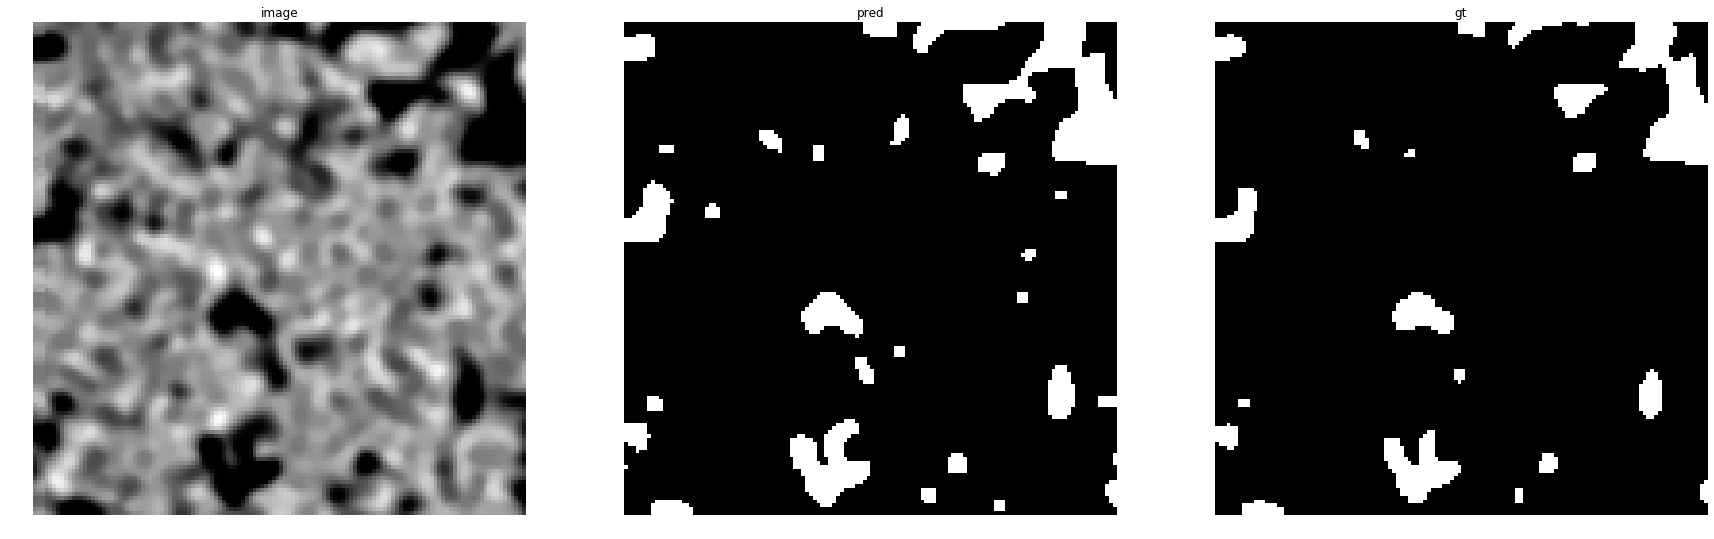

accuracy    : 0.97320556640625
precision   : 0.7451442024720424
recall      : 0.9952830188679245
f1          : 0.852238303601481
pr_auc      : 0.9666584569830513
iou         : 0.7425219941348974


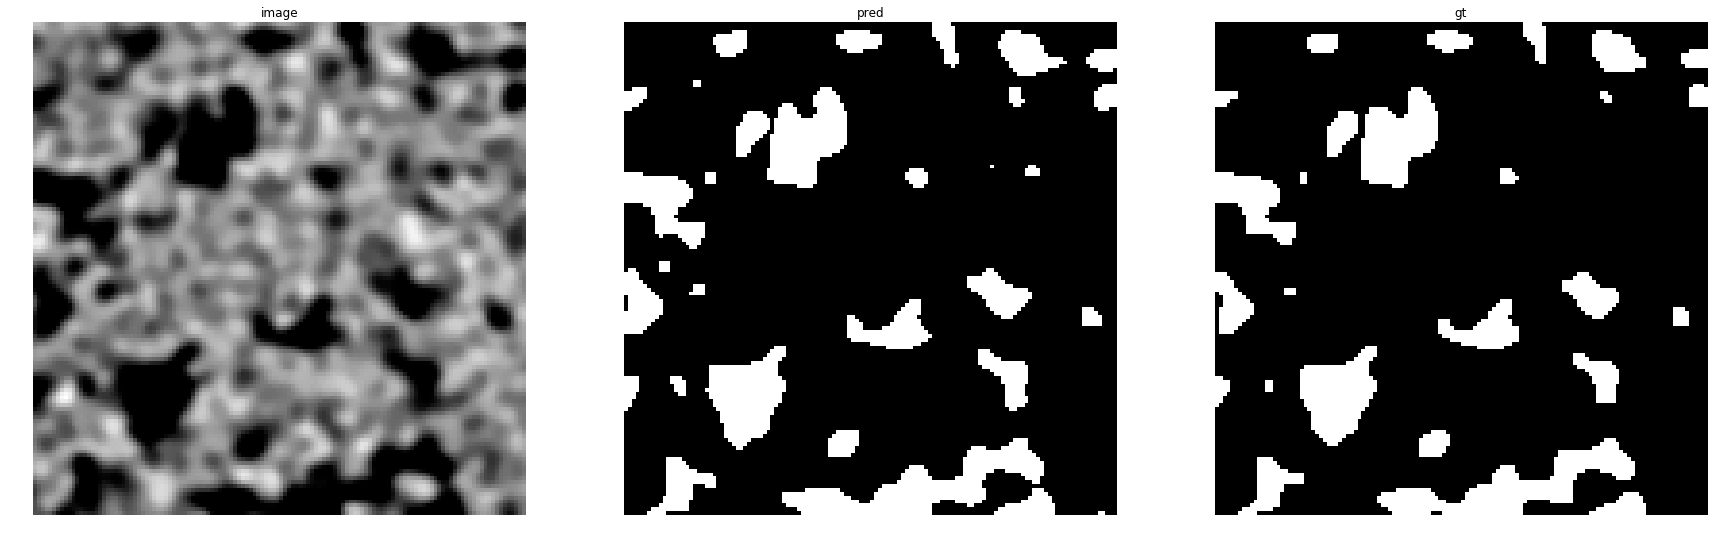

accuracy    : 0.98211669921875
precision   : 0.8965892597968069
recall      : 0.9967728922952803
f1          : 0.9440305635148042
pr_auc      : 0.9945853428562778
iou         : 0.8939942112879884


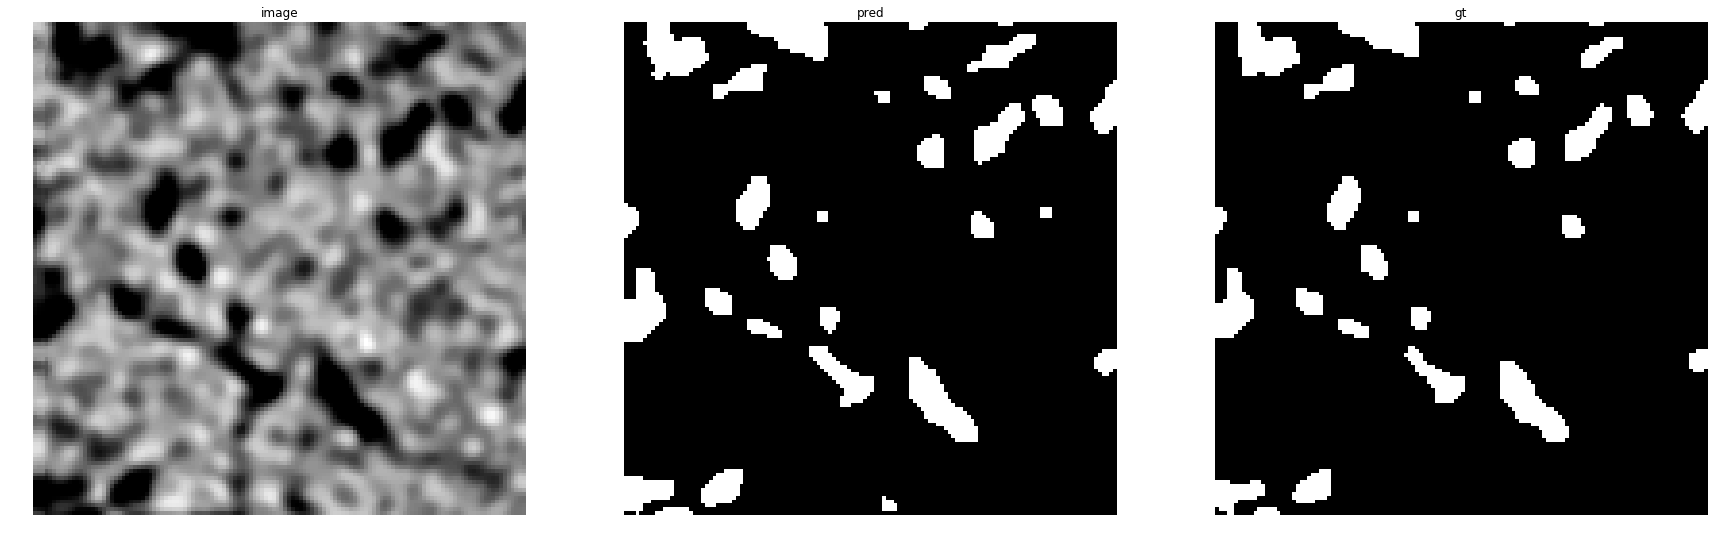

accuracy    : 0.9852294921875
precision   : 0.8655700510493477
recall      : 0.9967341606792945
f1          : 0.9265330904675166
pr_auc      : 0.9878517059303124
iou         : 0.8631221719457014


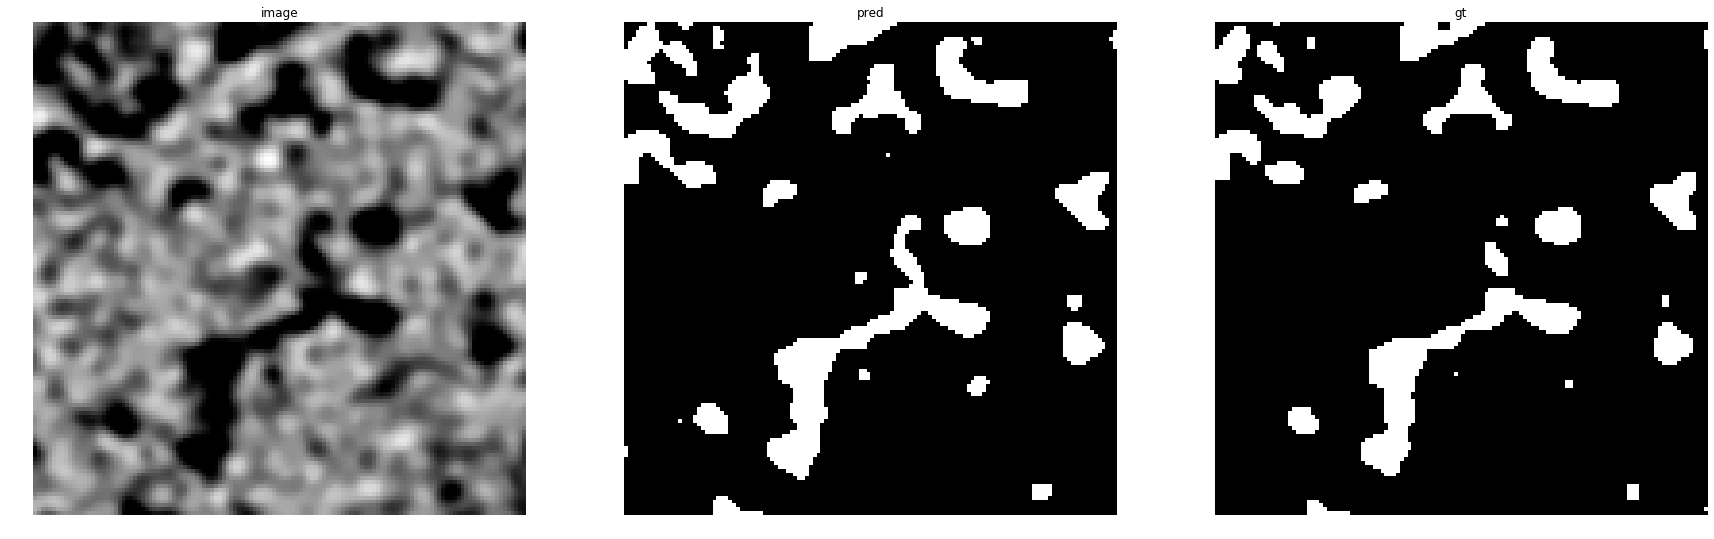

accuracy    : 0.978759765625
precision   : 0.8574989613626921
recall      : 0.9975833736104398
f1          : 0.9222520107238605
pr_auc      : 0.9897330651188893
iou         : 0.8557213930348259


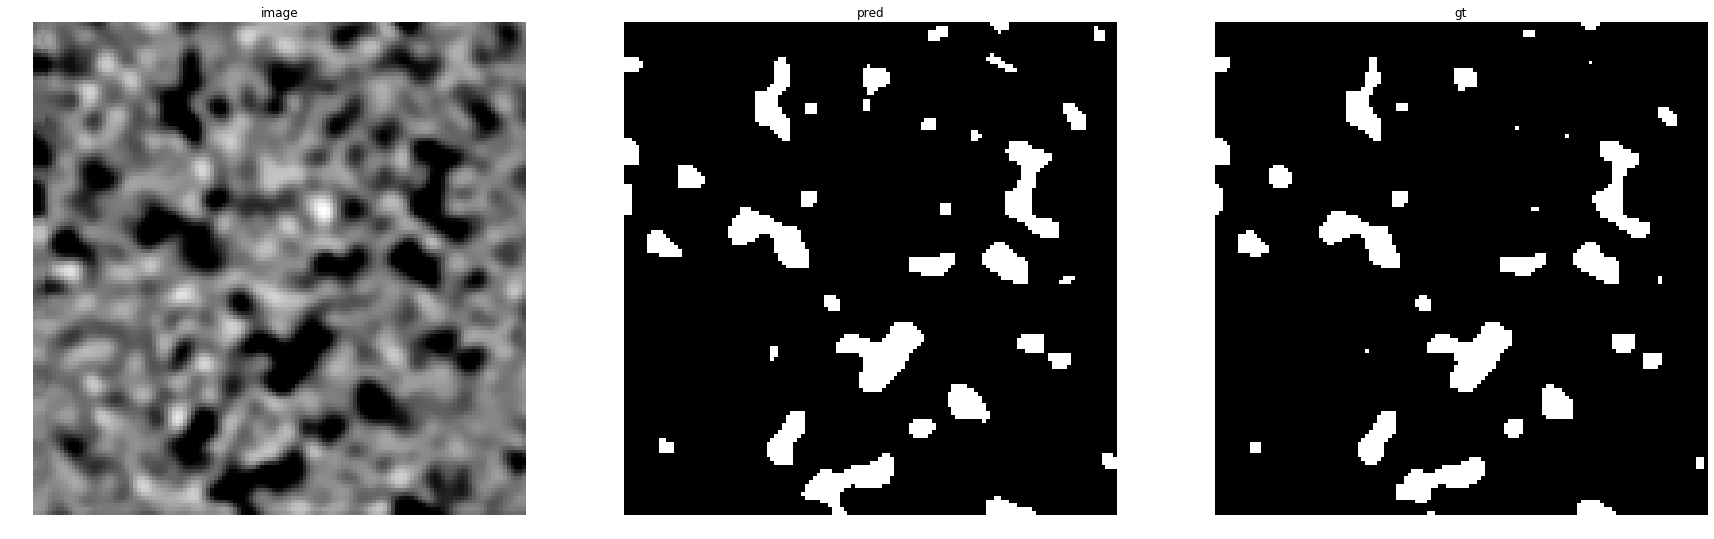

accuracy    : 0.98492431640625
precision   : 0.8495684340320592
recall      : 0.997827661115134
f1          : 0.9177489177489179
pr_auc      : 0.987405823683861
iou         : 0.848


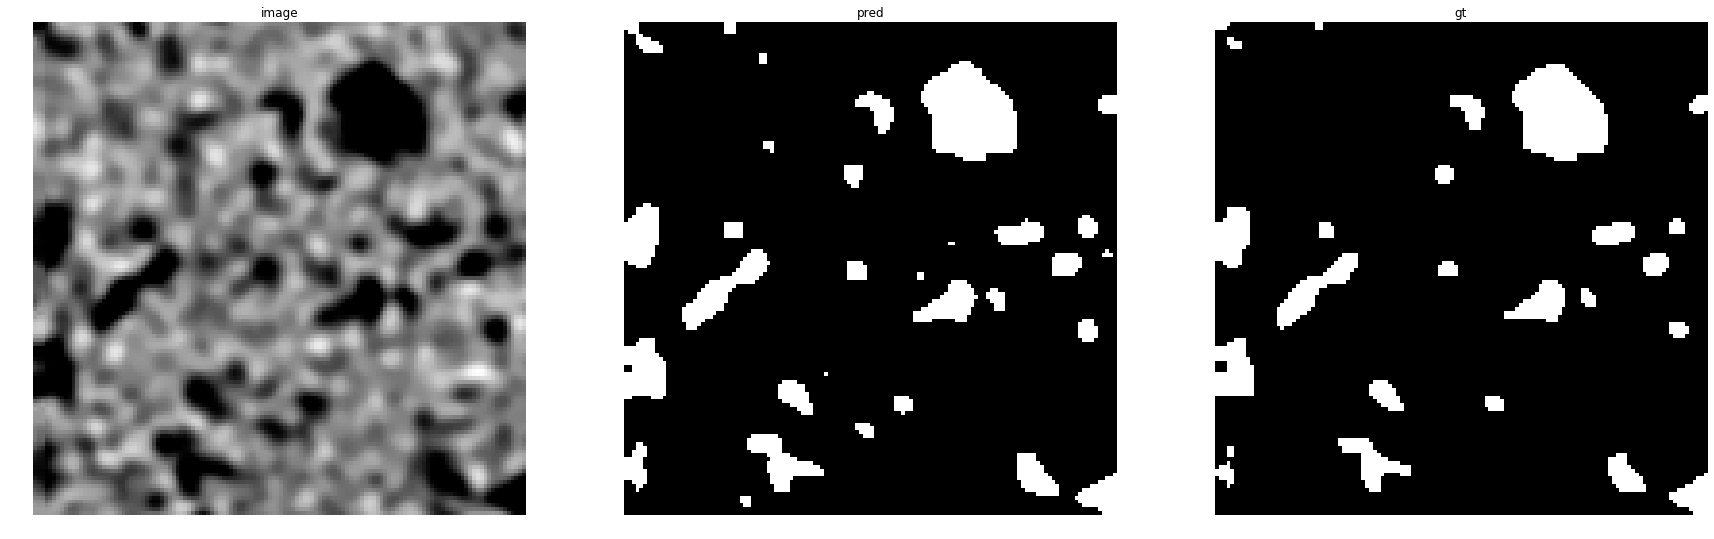

accuracy    : 0.9820556640625
precision   : 0.8406352683461117
recall      : 0.9980494148244473
f1          : 0.9126040428061831
pr_auc      : 0.9922185149403212
iou         : 0.8392564242755605


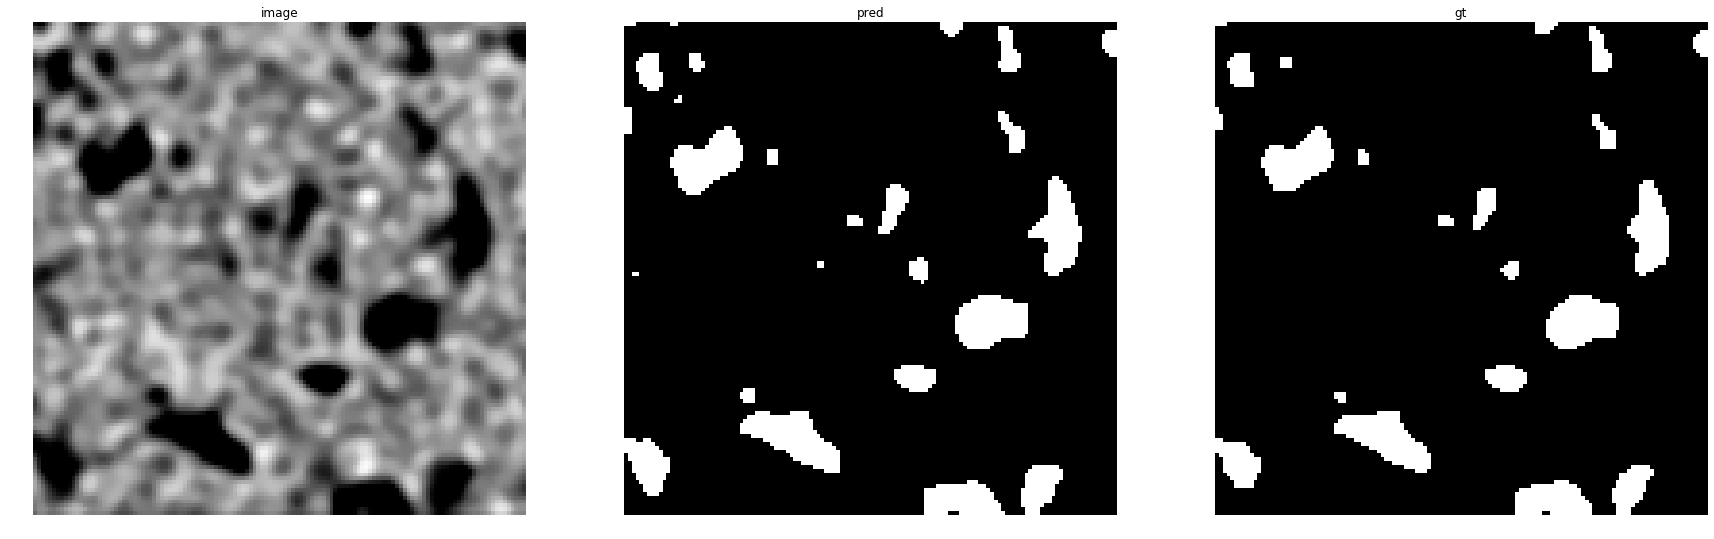

accuracy    : 0.99005126953125
precision   : 0.9022277227722773
recall      : 0.9965823650034177
f1          : 0.947060734004547
pr_auc      : 0.9957995742516375
iou         : 0.8994447871684146


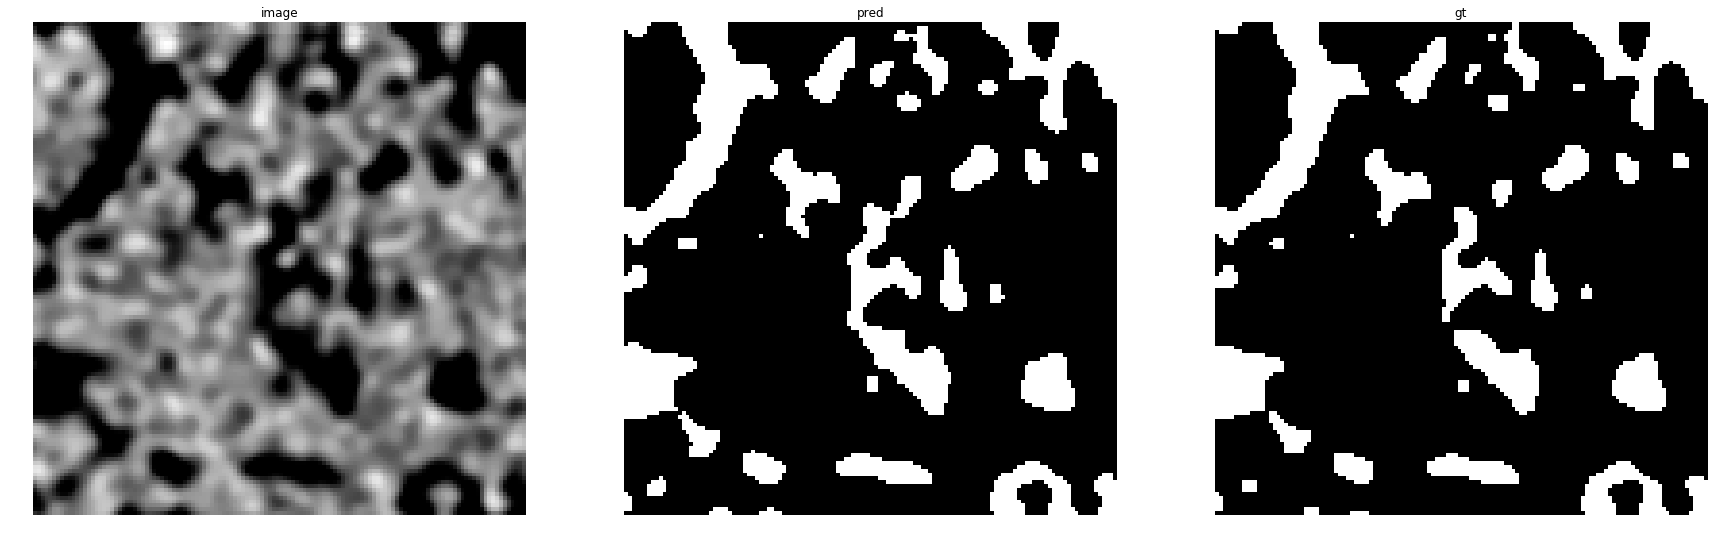

accuracy    : 0.9813232421875
precision   : 0.9145100319860424
recall      : 0.9961989230281914
f1          : 0.9536082474226805
pr_auc      : 0.9949559595514702
iou         : 0.9113300492610837


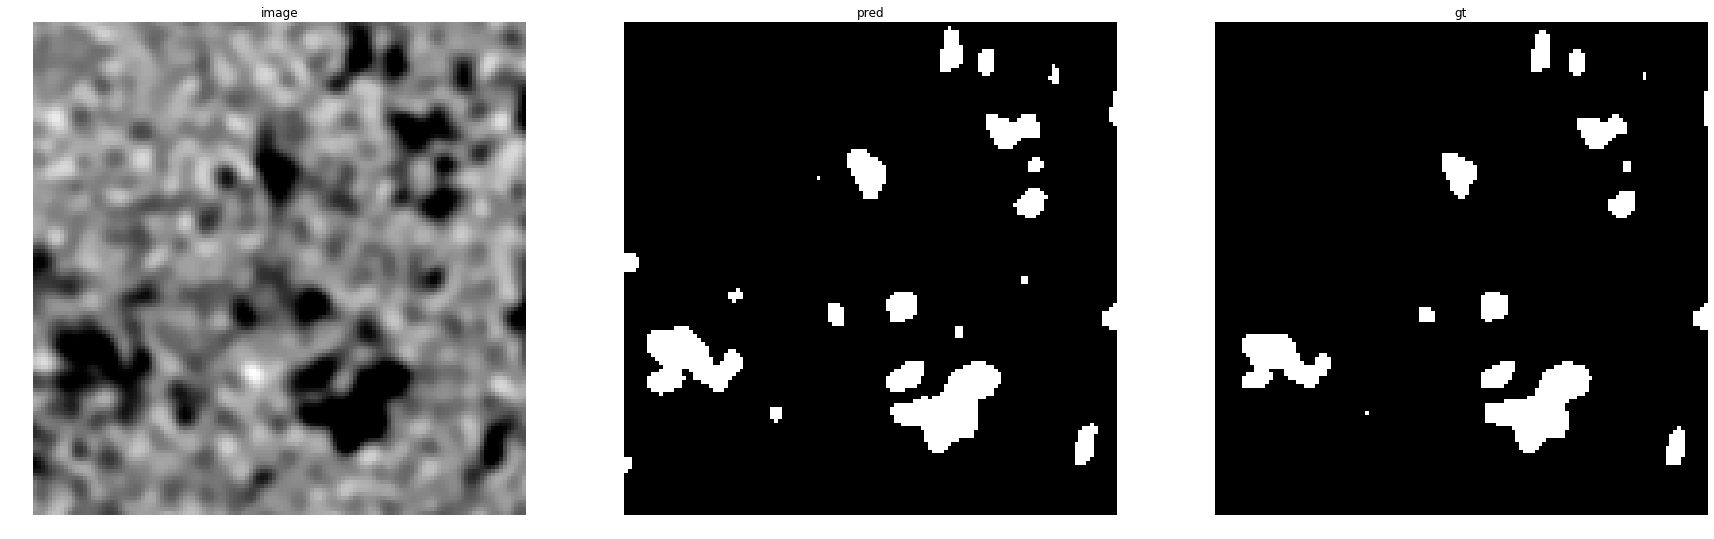

accuracy    : 0.9859619140625
precision   : 0.8098415346121768
recall      : 0.9979445015416238
f1          : 0.8941068139963169
pr_auc      : 0.9877401575262472
iou         : 0.8084929225645295


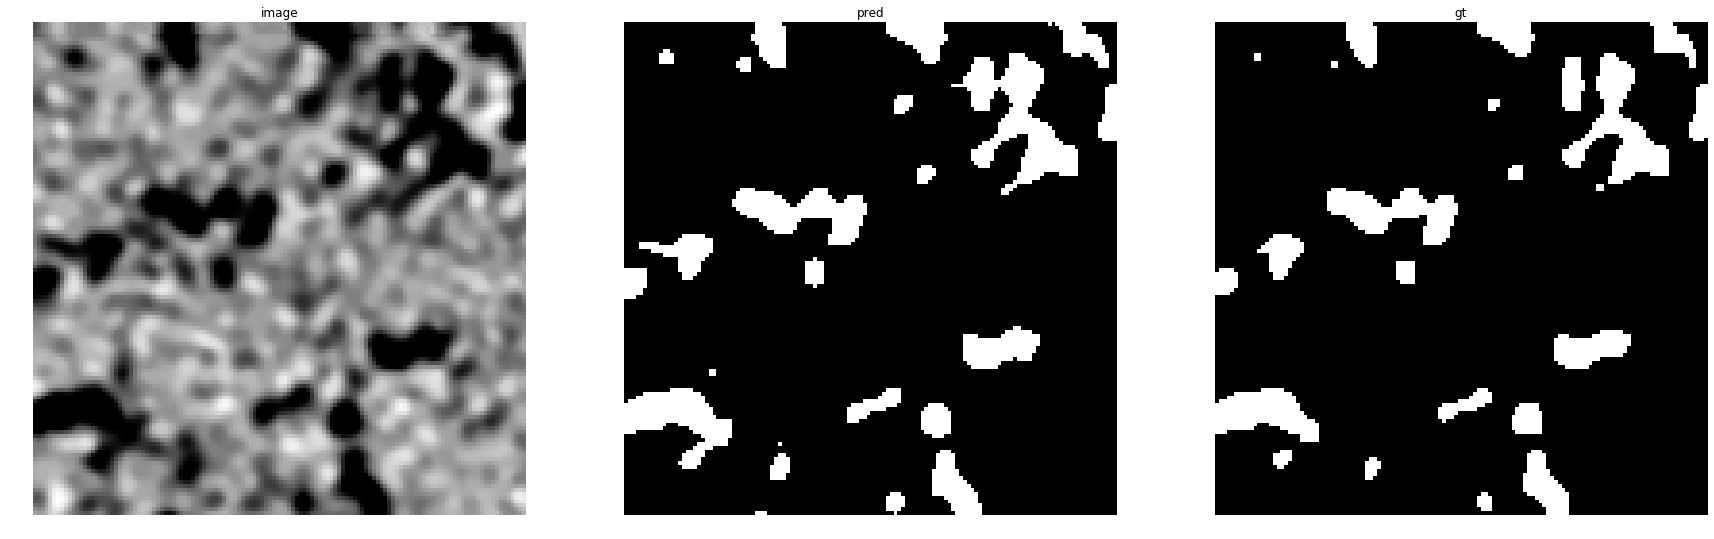

accuracy    : 0.98419189453125
precision   : 0.8774346793349168
recall      : 0.9994588744588745
f1          : 0.9344801416645585
pr_auc      : 0.9939612960562912
iou         : 0.8770180436847104


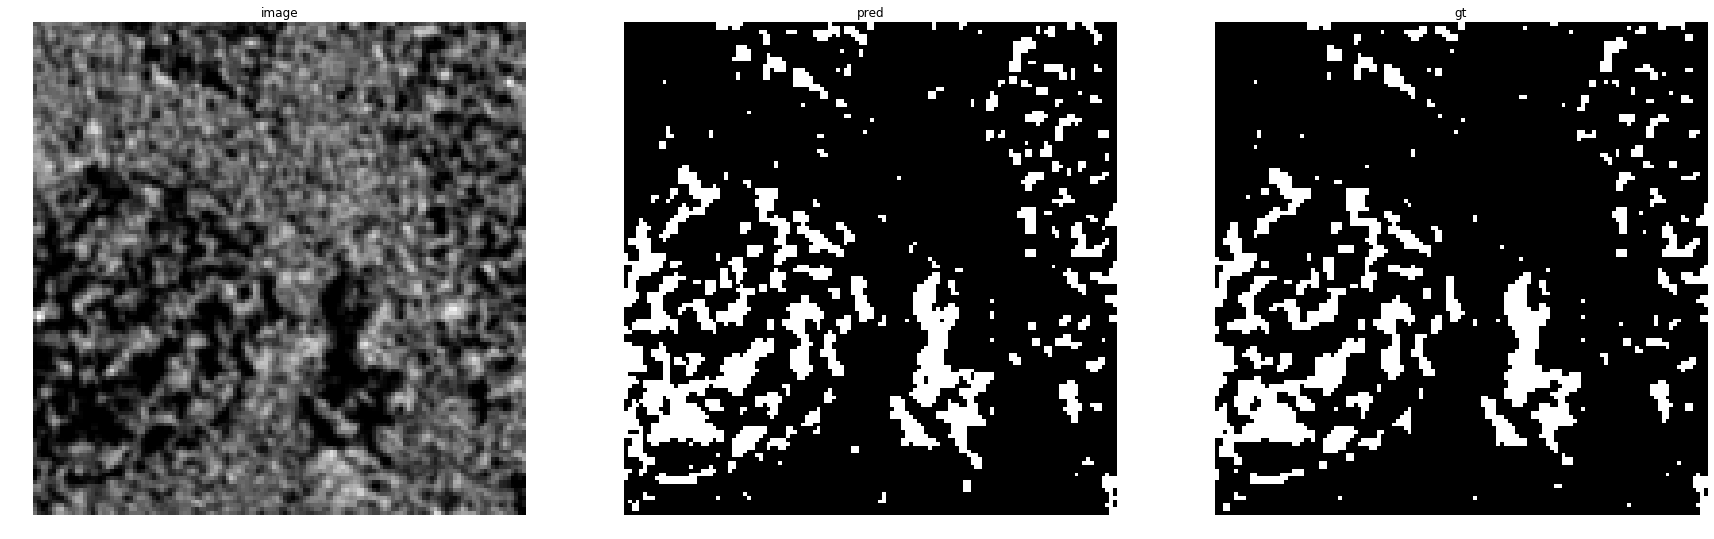

accuracy    : 0.970703125
precision   : 0.8508803449514912
recall      : 0.9732840115084258
f1          : 0.9079754601226994
pr_auc      : 0.9853648747126607
iou         : 0.8314606741573034


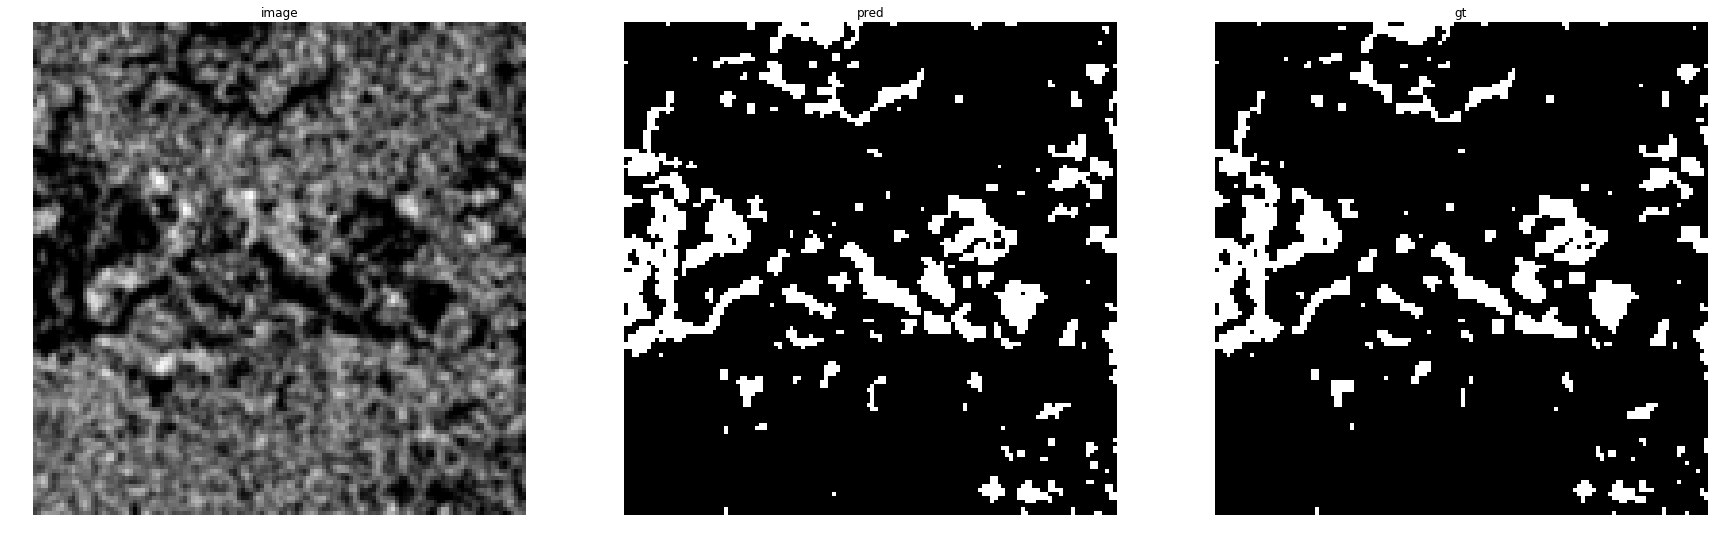

accuracy    : 0.9765625
precision   : 0.8741344195519348
recall      : 0.9662314272850068
f1          : 0.9178785286569717
pr_auc      : 0.9869217672884567
iou         : 0.8482213438735178


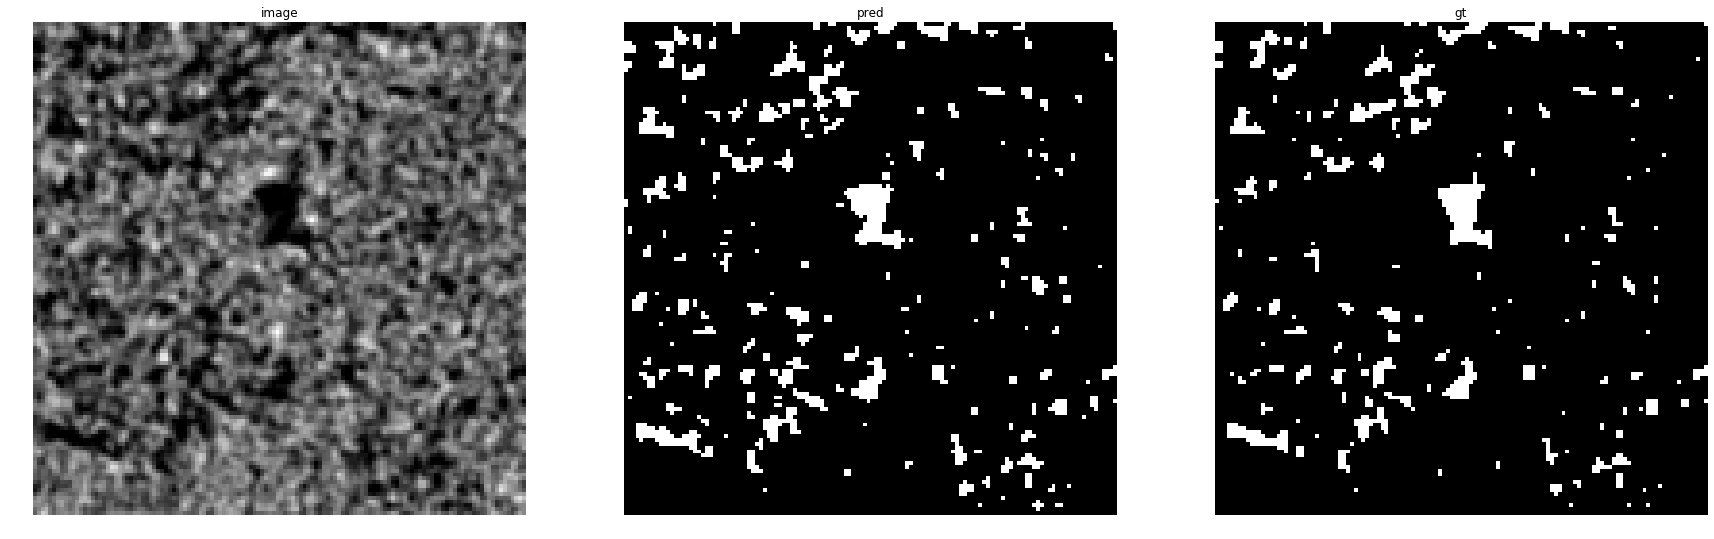

accuracy    : 0.97869873046875
precision   : 0.778179190751445
recall      : 0.9624664879356568
f1          : 0.8605673192169396
pr_auc      : 0.9741969730839296
iou         : 0.7552594670406733


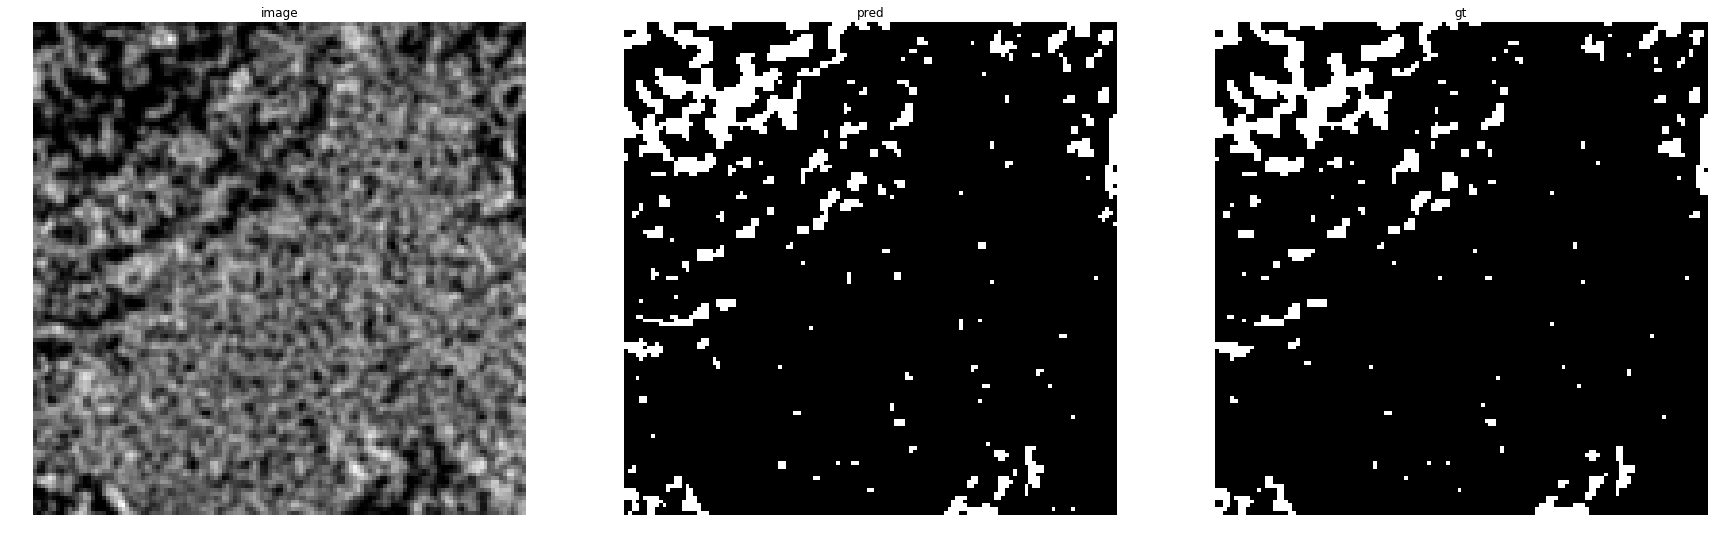

accuracy    : 0.9832763671875
precision   : 0.8631840796019901
recall      : 0.9625520110957004
f1          : 0.9101639344262294
pr_auc      : 0.9842809662595606
iou         : 0.8351383874849578


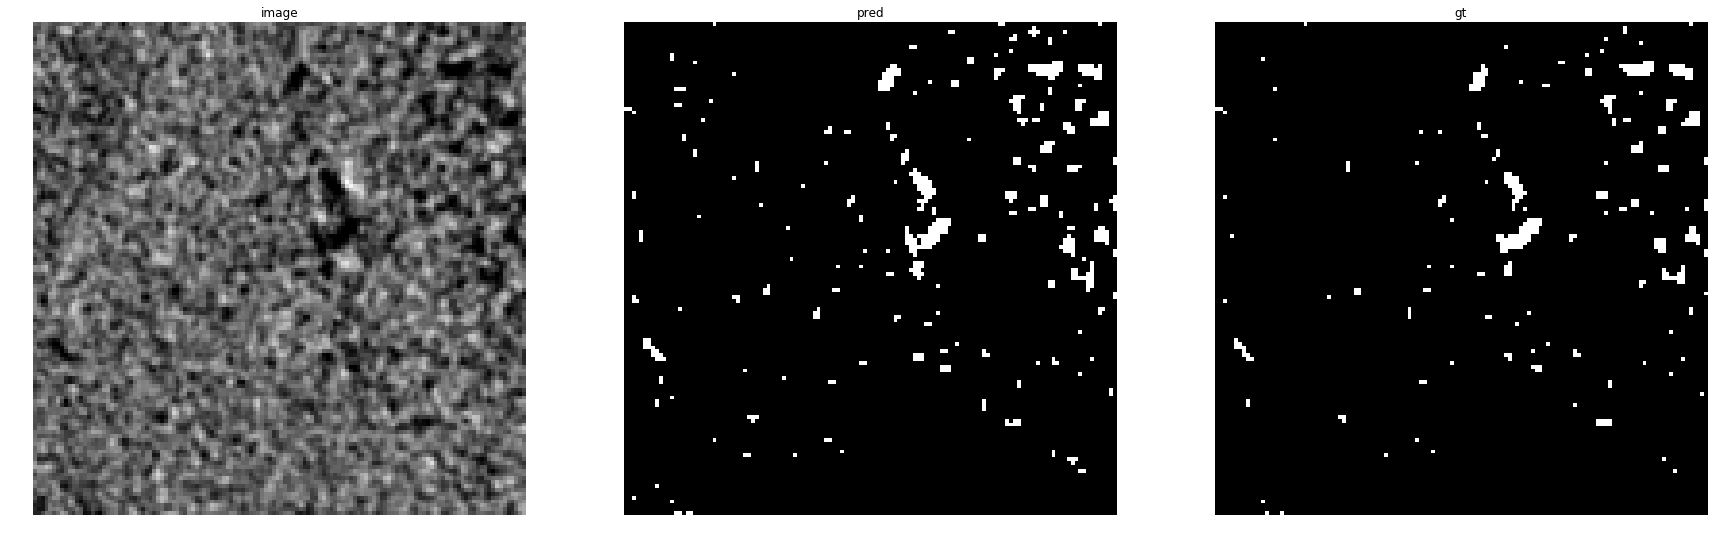

accuracy    : 0.9893798828125
precision   : 0.6957295373665481
recall      : 0.9923857868020305
f1          : 0.8179916317991633
pr_auc      : 0.9750434278992212
iou         : 0.6920353982300885


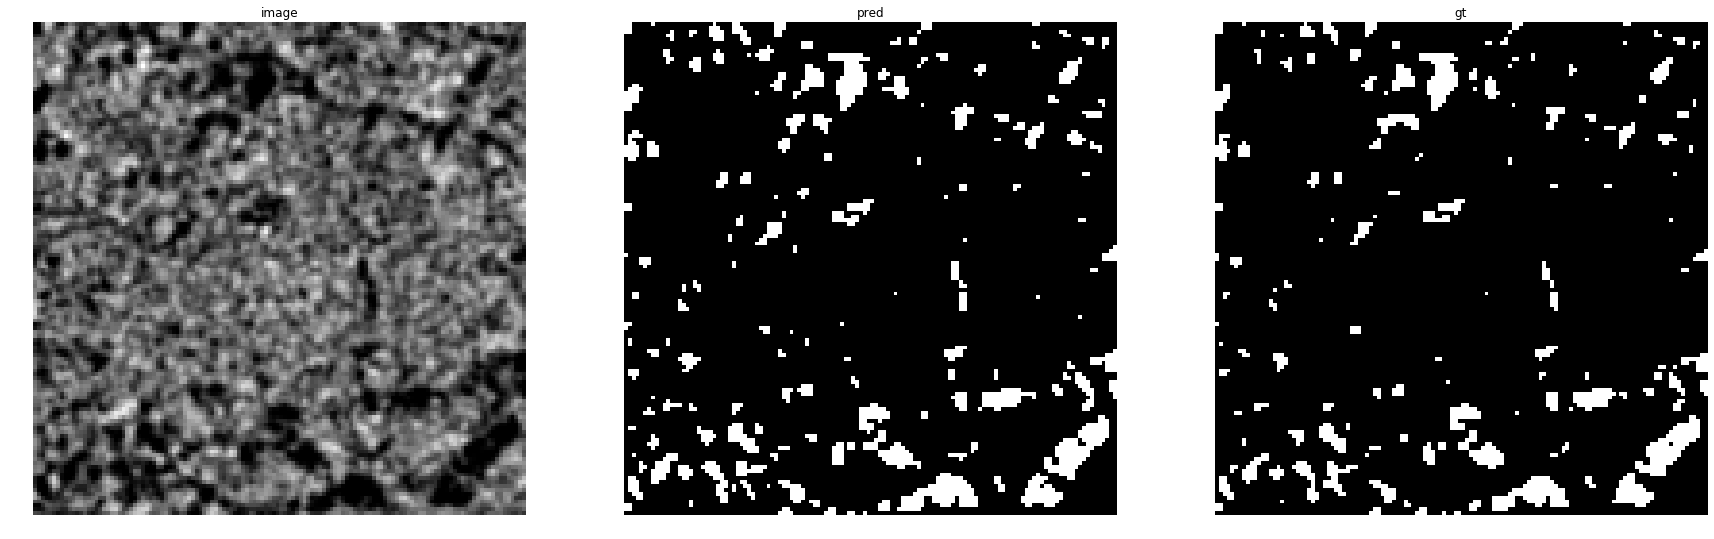

accuracy    : 0.9803466796875
precision   : 0.8191230207064556
recall      : 0.9817518248175182
f1          : 0.8930942895086321
pr_auc      : 0.9857520455433573
iou         : 0.8068386322735452


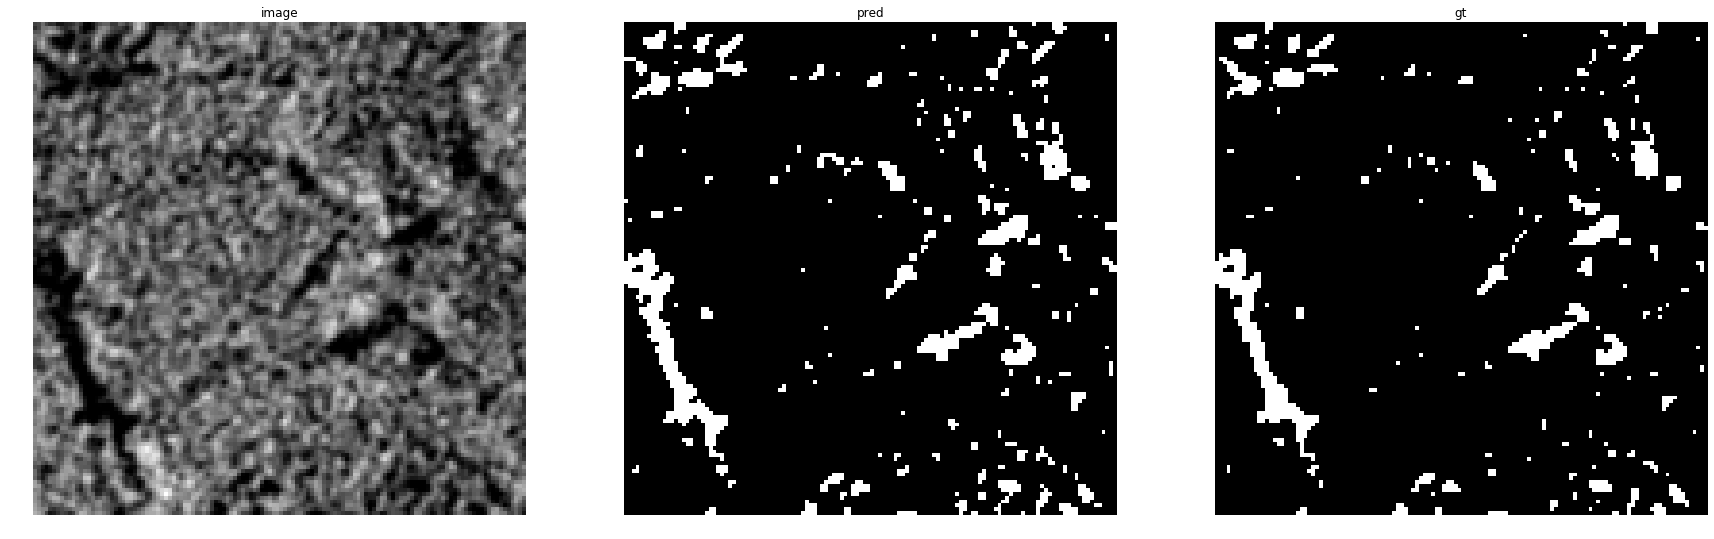

accuracy    : 0.98040771484375
precision   : 0.7992957746478874
recall      : 0.9692570452604612
f1          : 0.8761096101891164
pr_auc      : 0.9806745398434149
iou         : 0.779532967032967


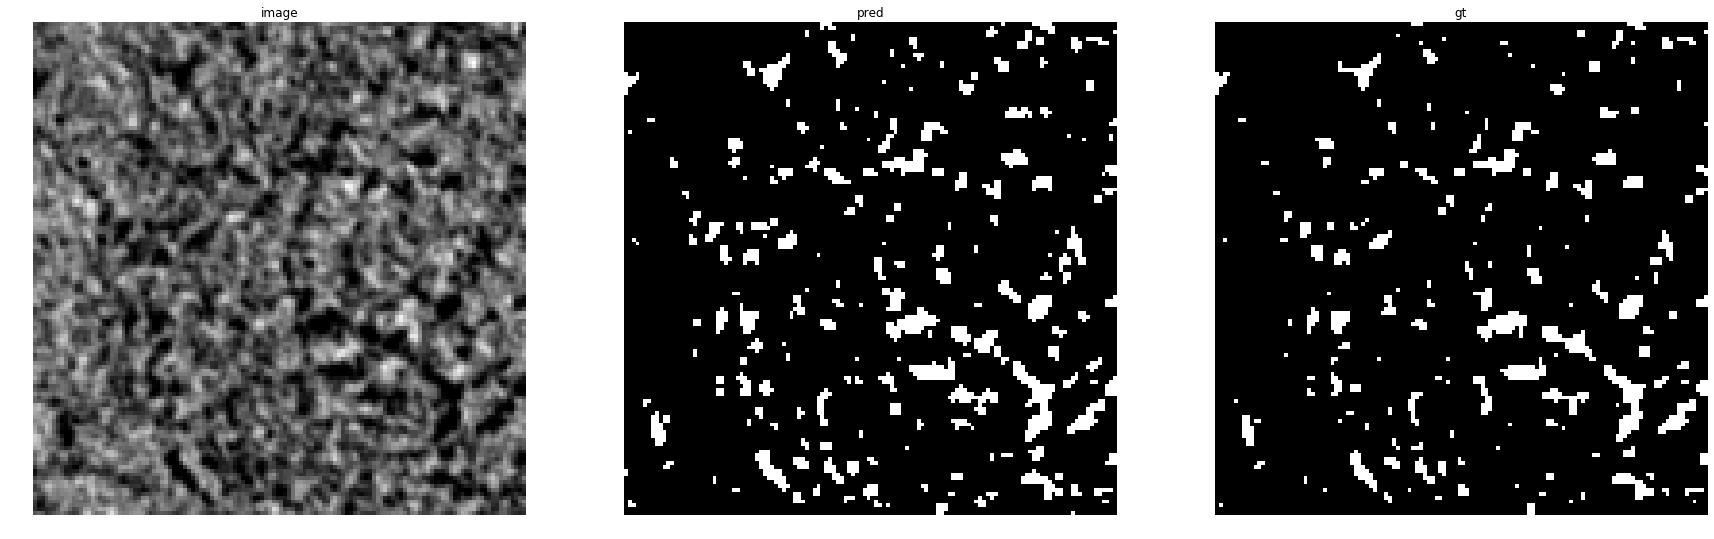

accuracy    : 0.9742431640625
precision   : 0.7567733990147784
recall      : 0.9785031847133758
f1          : 0.8534722222222224
pr_auc      : 0.9763456294817047
iou         : 0.744397334948516


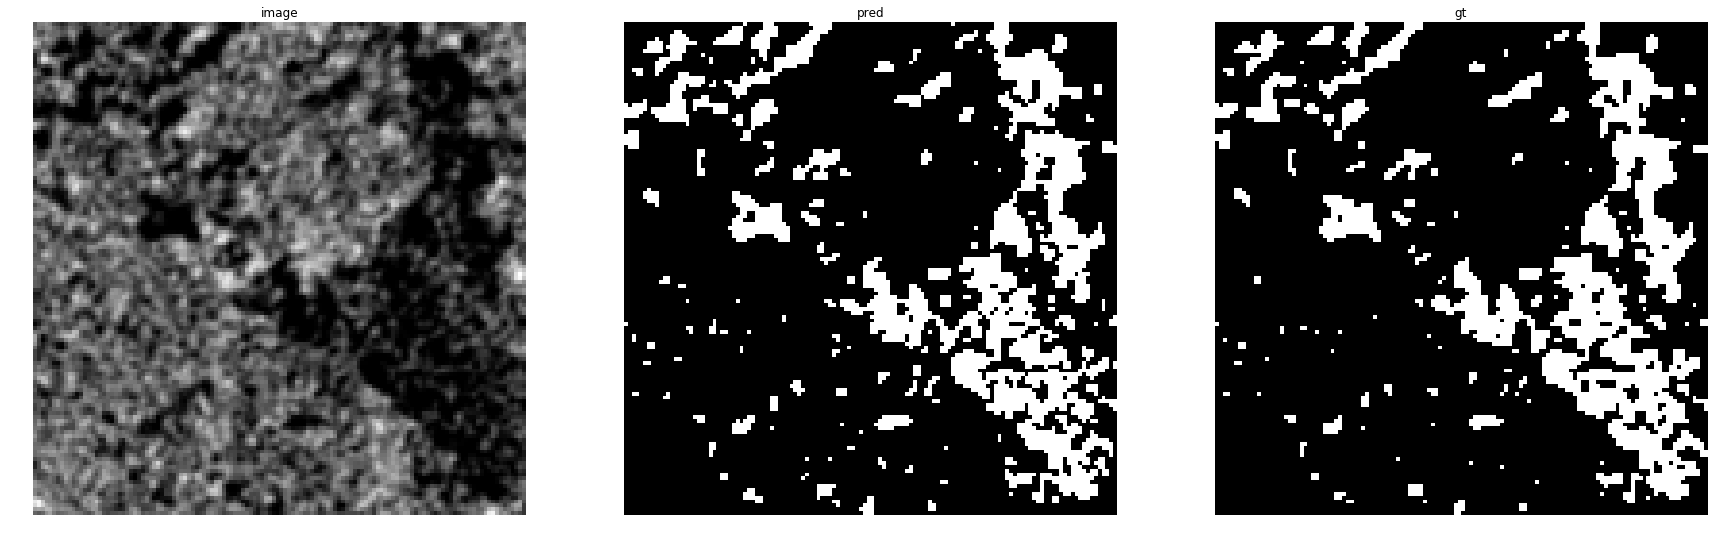

accuracy    : 0.97064208984375
precision   : 0.904
recall      : 0.9456066945606695
f1          : 0.9243353783231084
pr_auc      : 0.9844344483411832
iou         : 0.8593155893536122


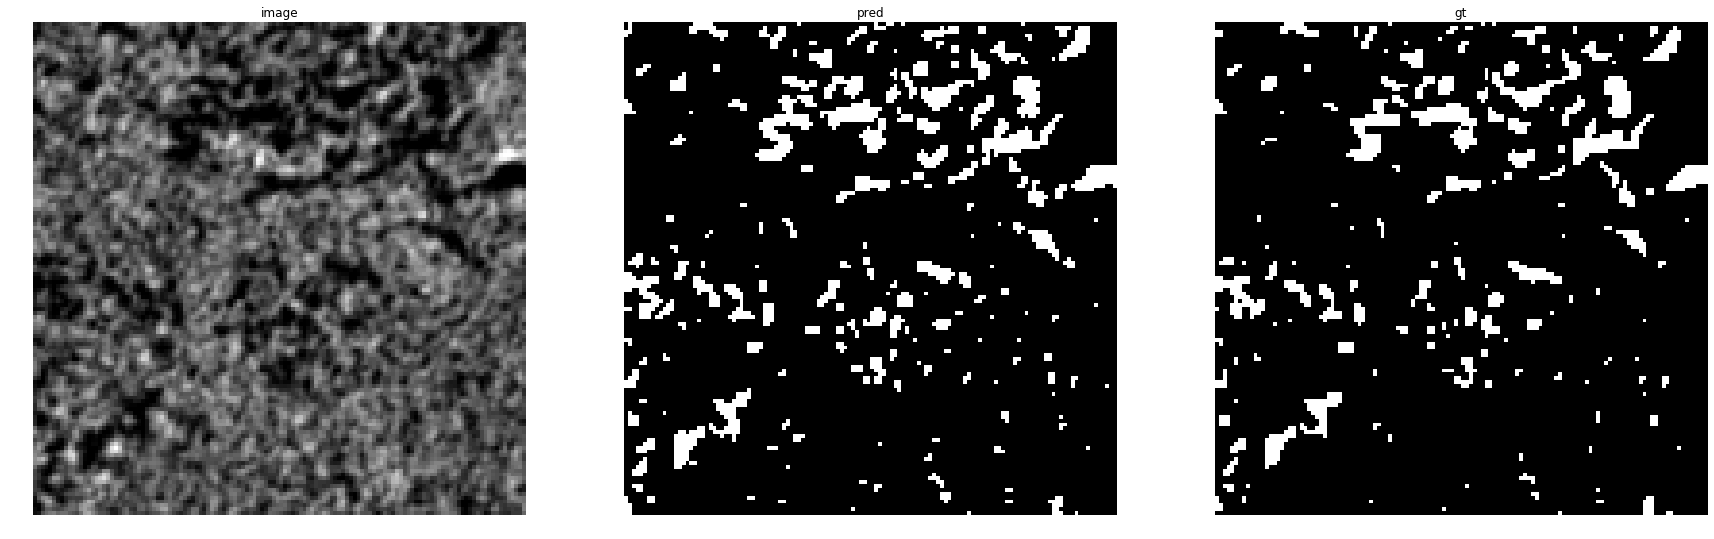

accuracy    : 0.974365234375
precision   : 0.8129032258064516
recall      : 0.9545454545454546
f1          : 0.8780487804878049
pr_auc      : 0.975025719451553
iou         : 0.782608695652174


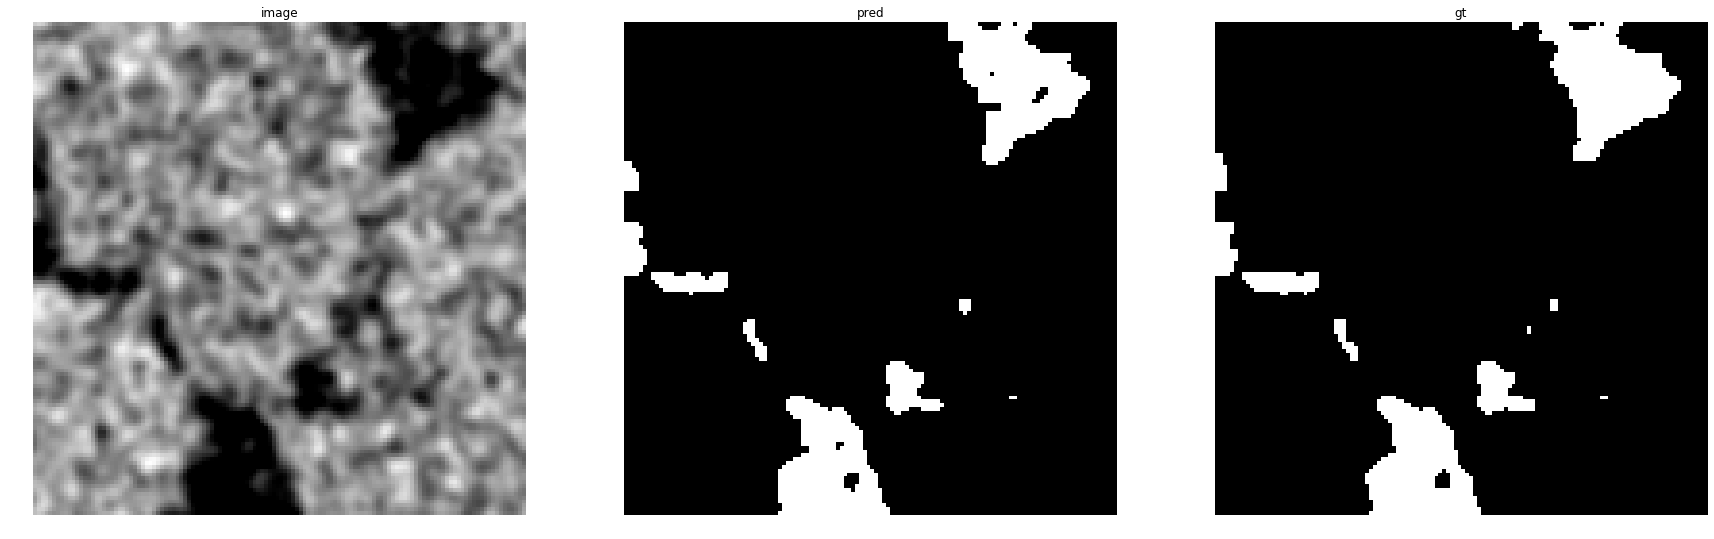

accuracy    : 0.9935302734375
precision   : 0.9787363304981774
recall      : 0.9577883472057075
f1          : 0.9681490384615384
pr_auc      : 0.99622336207832
iou         : 0.9382644146767618


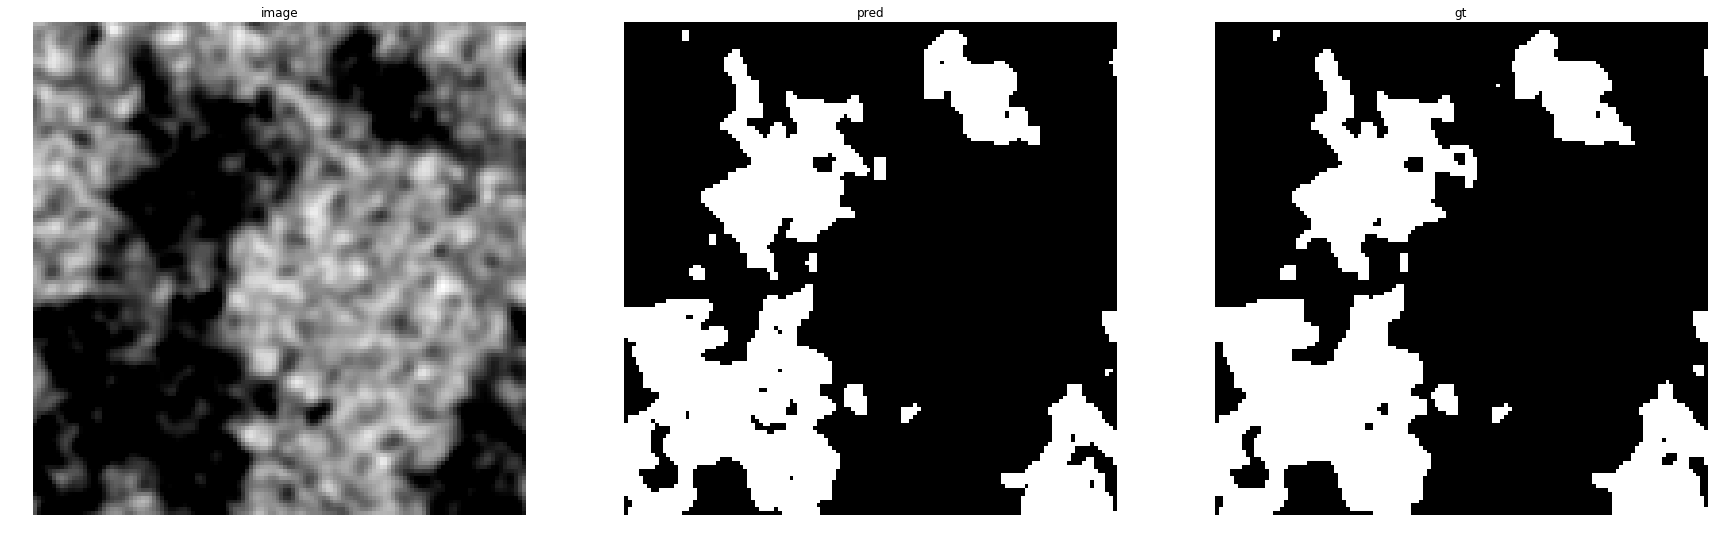

accuracy    : 0.9840087890625
precision   : 0.9954574951330305
recall      : 0.9502374561222383
f1          : 0.9723219945066554
pr_auc      : 0.9987259694975317
iou         : 0.9461348684210527


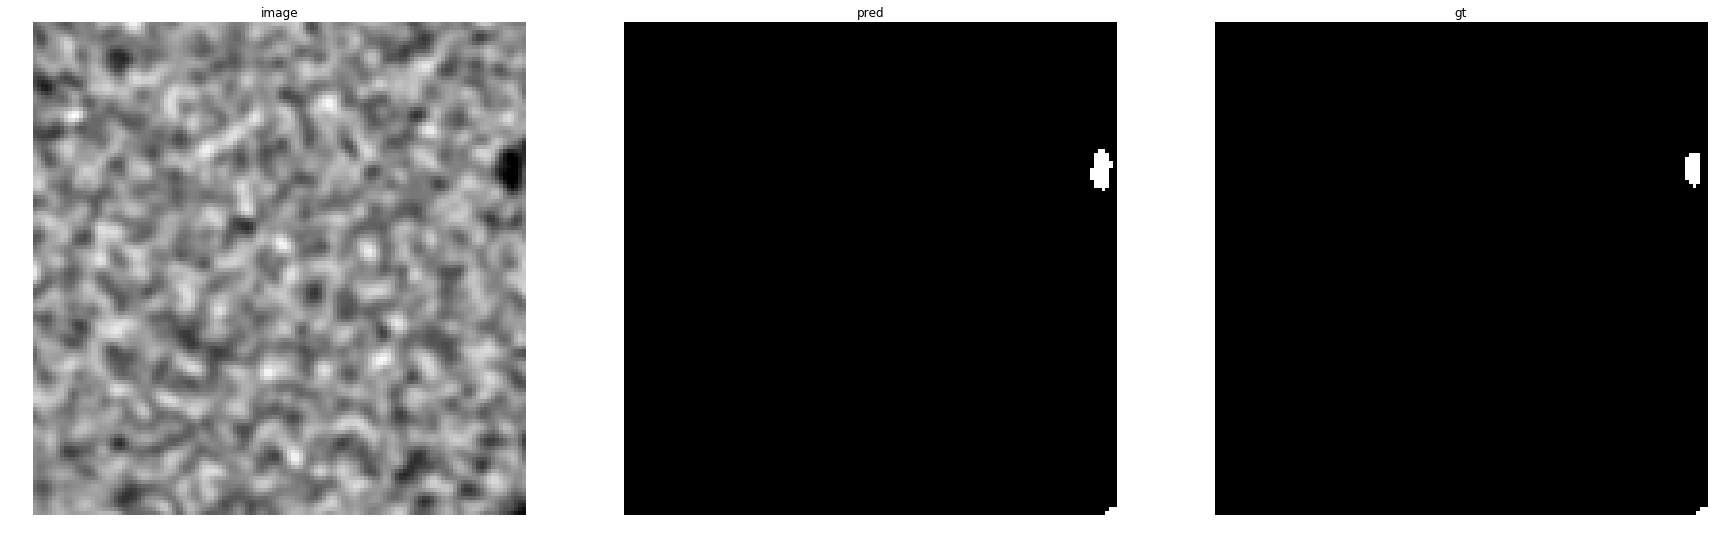

accuracy    : 0.99920654296875
precision   : 0.7346938775510204
recall      : 1.0
f1          : 0.8470588235294119
pr_auc      : 0.9690699537025306
iou         : 0.7346938775510204


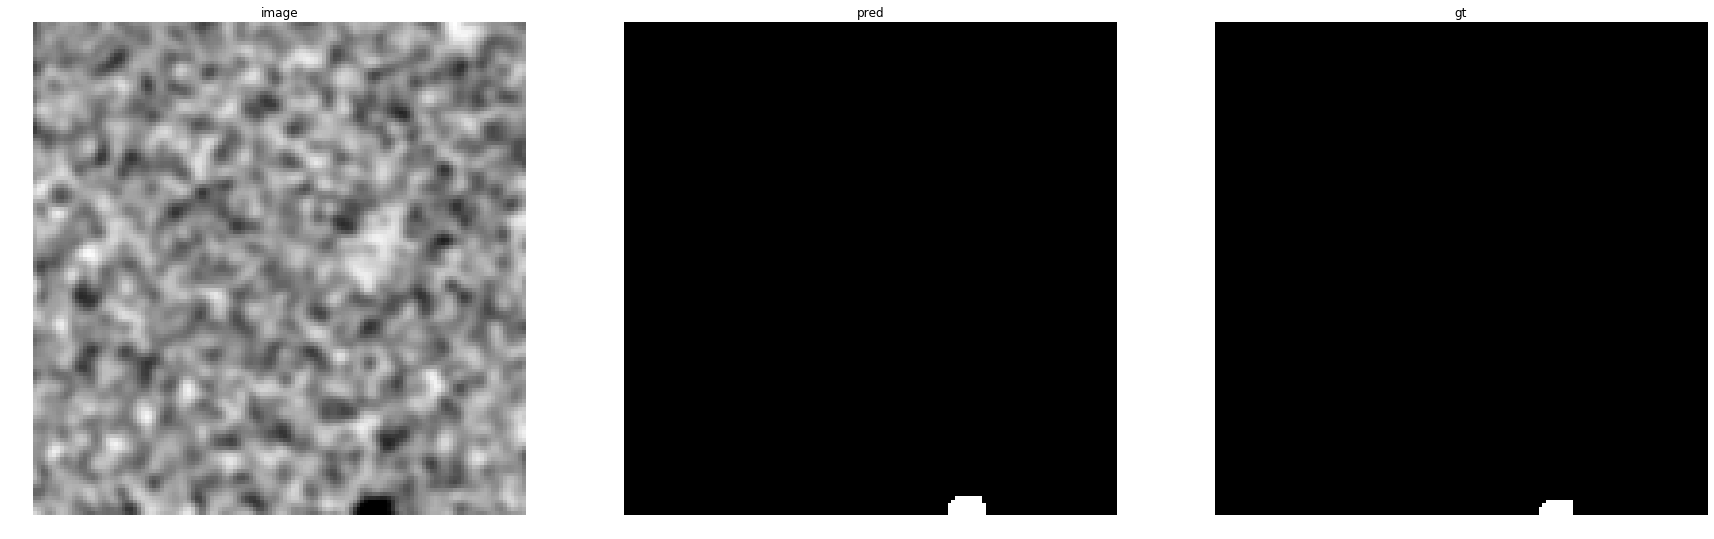

accuracy    : 0.999267578125
precision   : 0.7333333333333333
recall      : 1.0
f1          : 0.846153846153846
pr_auc      : 1.0
iou         : 0.7333333333333333


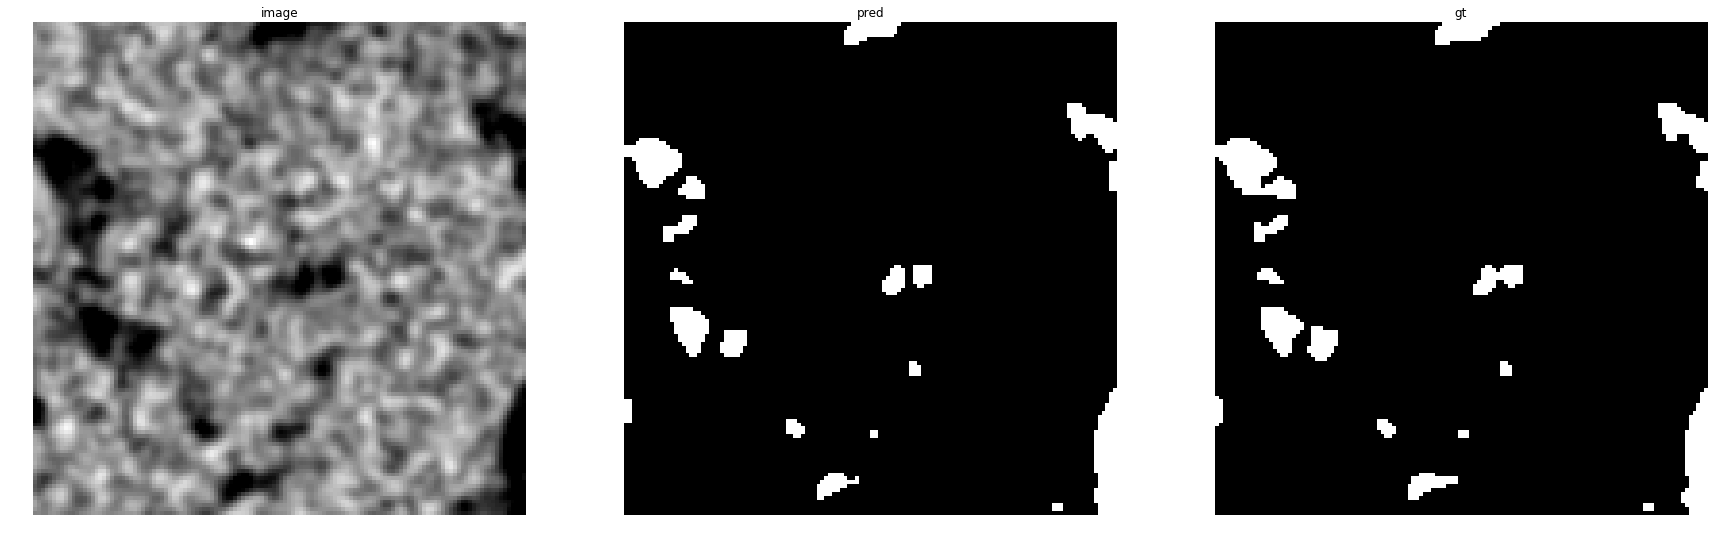

accuracy    : 0.9931640625
precision   : 0.9879227053140096
recall      : 0.8891304347826087
f1          : 0.9359267734553776
pr_auc      : 0.9940263798610607
iou         : 0.8795698924731182


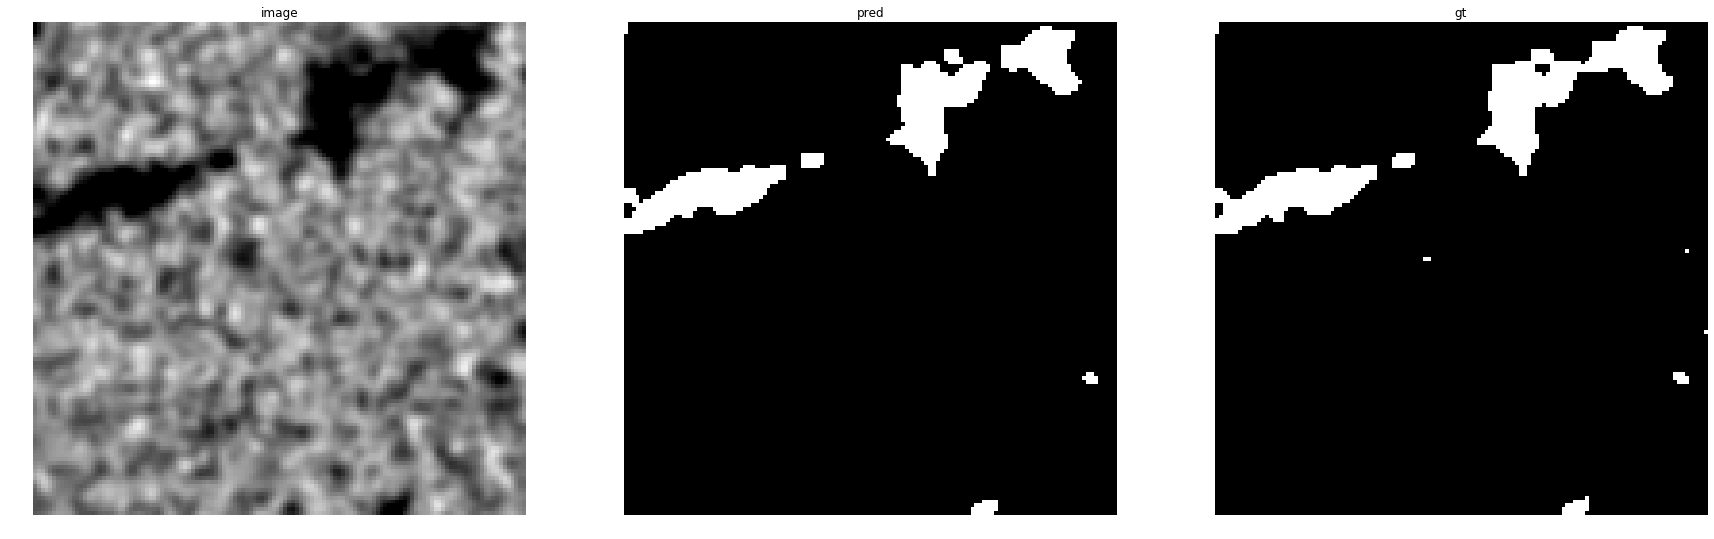

accuracy    : 0.9957275390625
precision   : 0.9925512104283054
recall      : 0.9450354609929078
f1          : 0.9682107175295186
pr_auc      : 0.9978521208088595
iou         : 0.9383802816901409


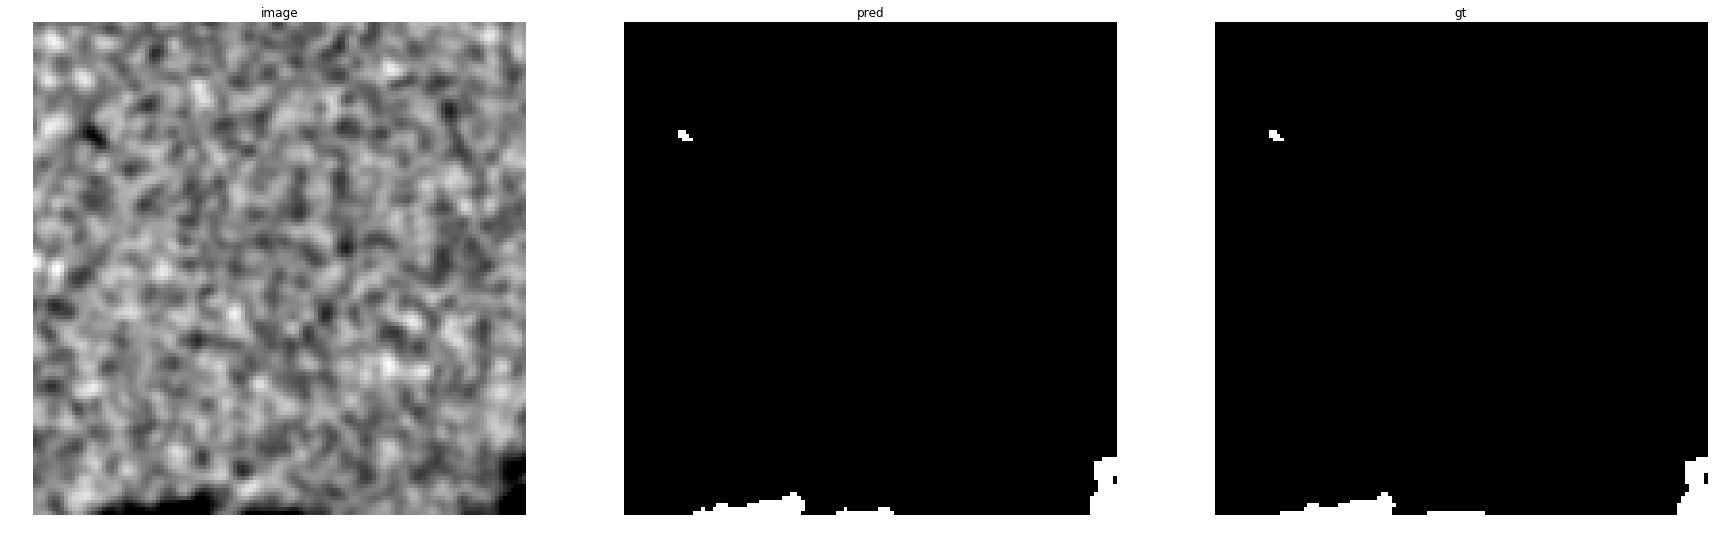

accuracy    : 0.99908447265625
precision   : 0.9512195121951219
recall      : 0.975
f1          : 0.9629629629629629
pr_auc      : 0.9952802588961008
iou         : 0.9285714285714286


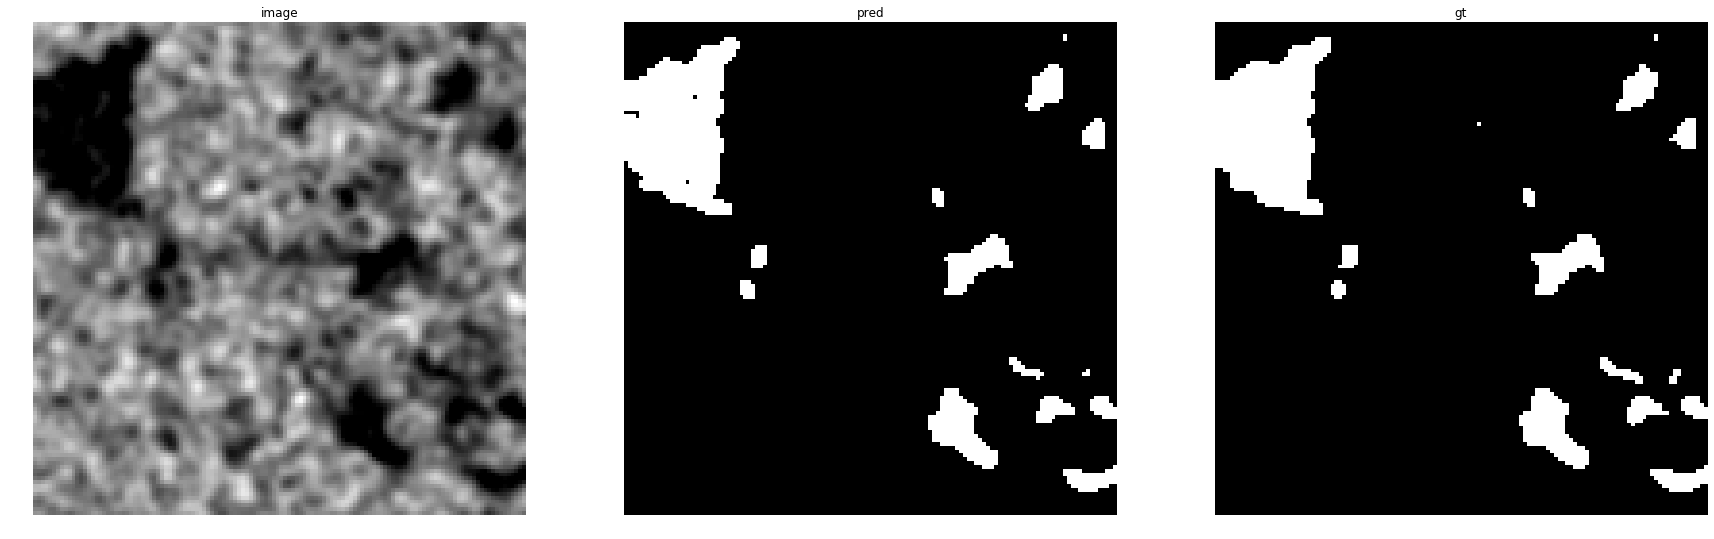

accuracy    : 0.9945068359375
precision   : 0.9886792452830189
recall      : 0.9562043795620438
f1          : 0.9721706864564008
pr_auc      : 0.9985076421096846
iou         : 0.9458483754512635


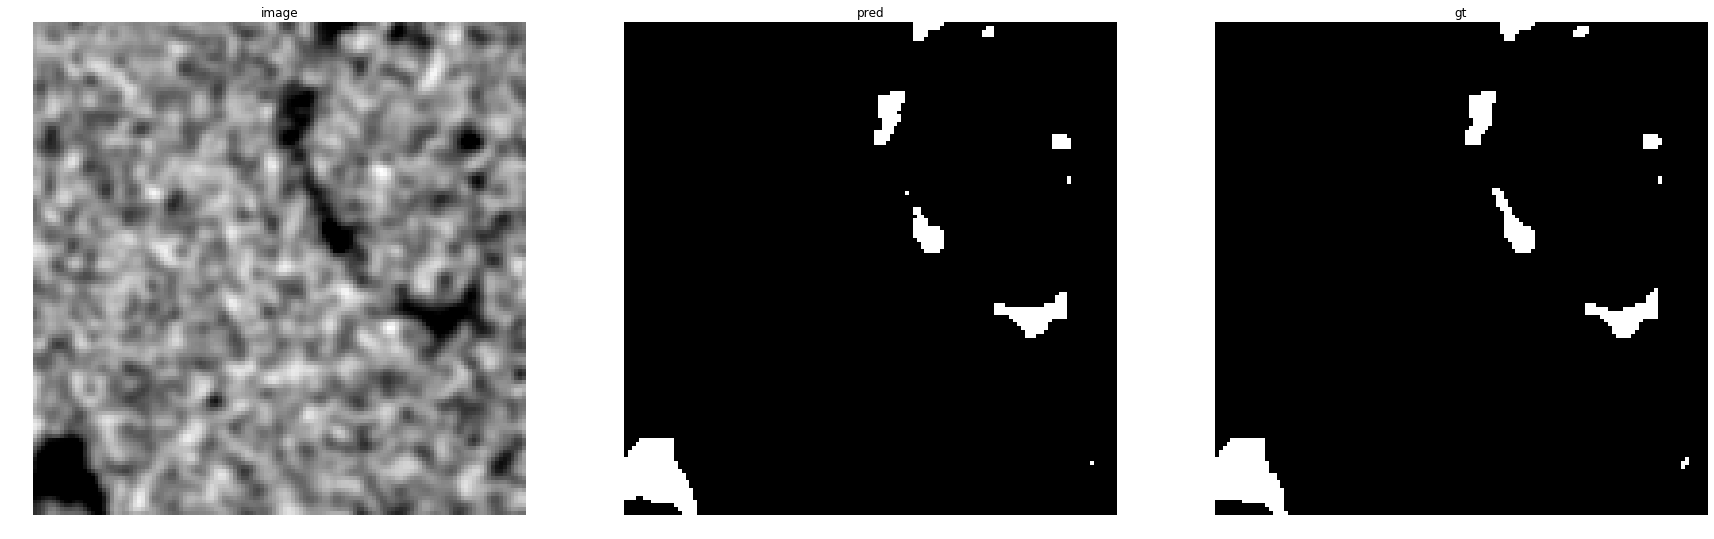

accuracy    : 0.99737548828125
precision   : 0.9816176470588235
recall      : 0.9417989417989417
f1          : 0.9612961296129613
pr_auc      : 0.9954234454402077
iou         : 0.925476603119584


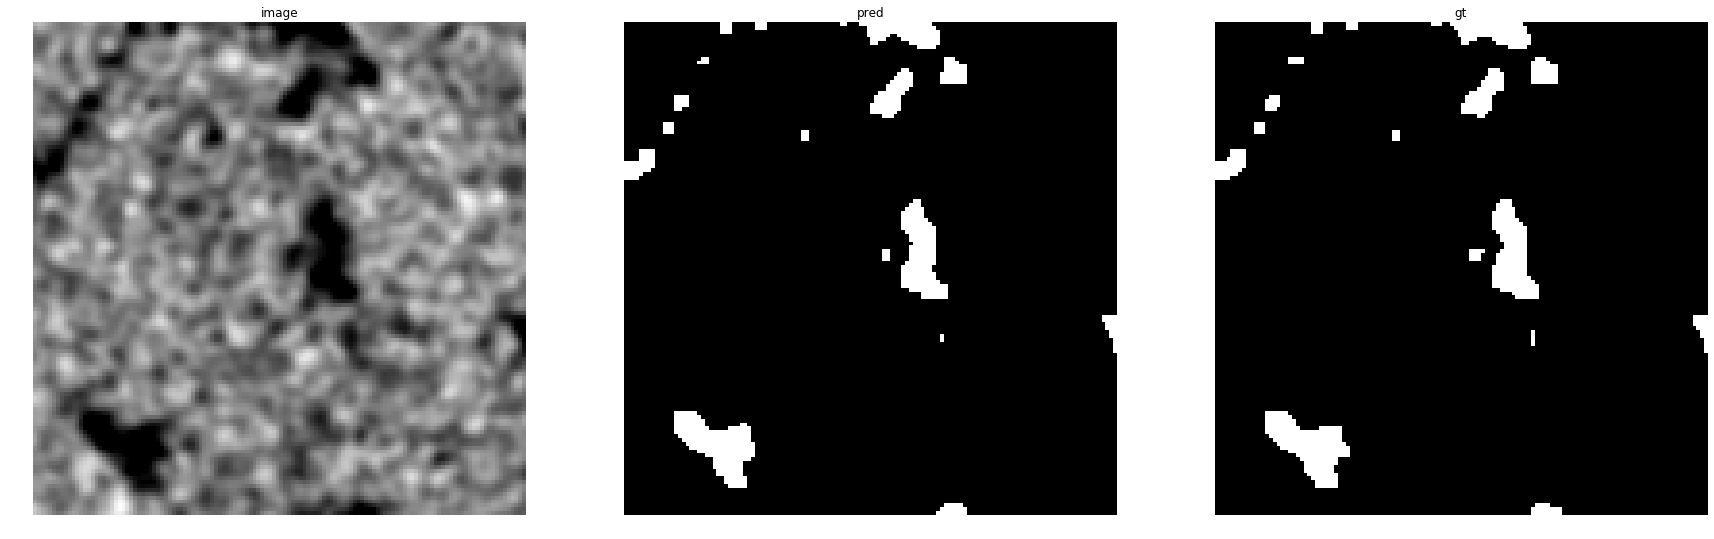

accuracy    : 0.99676513671875
precision   : 0.9858429858429858
recall      : 0.948019801980198
f1          : 0.9665615141955836
pr_auc      : 0.9975408751254851
iou         : 0.9352869352869353


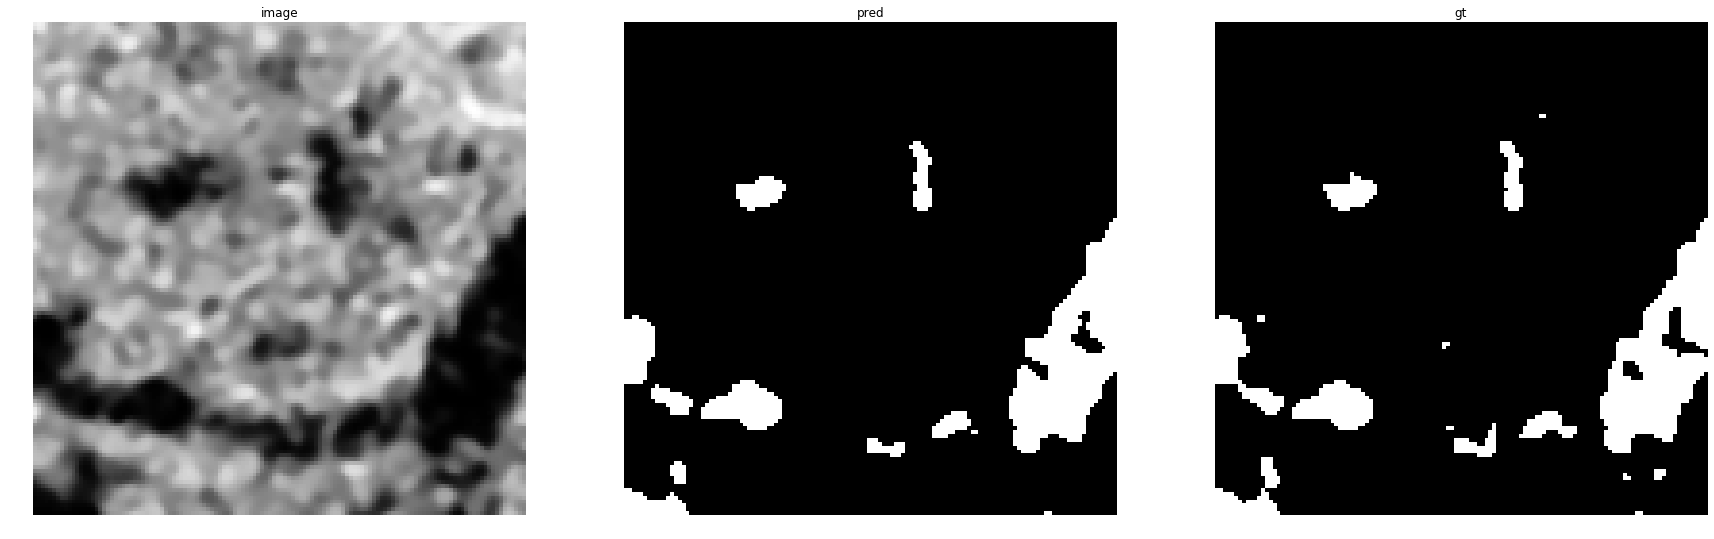

accuracy    : 0.9913330078125
precision   : 0.9702650290885585
recall      : 0.9398872886662493
f1          : 0.9548346055979644
pr_auc      : 0.9941631622935629
iou         : 0.913572732805843


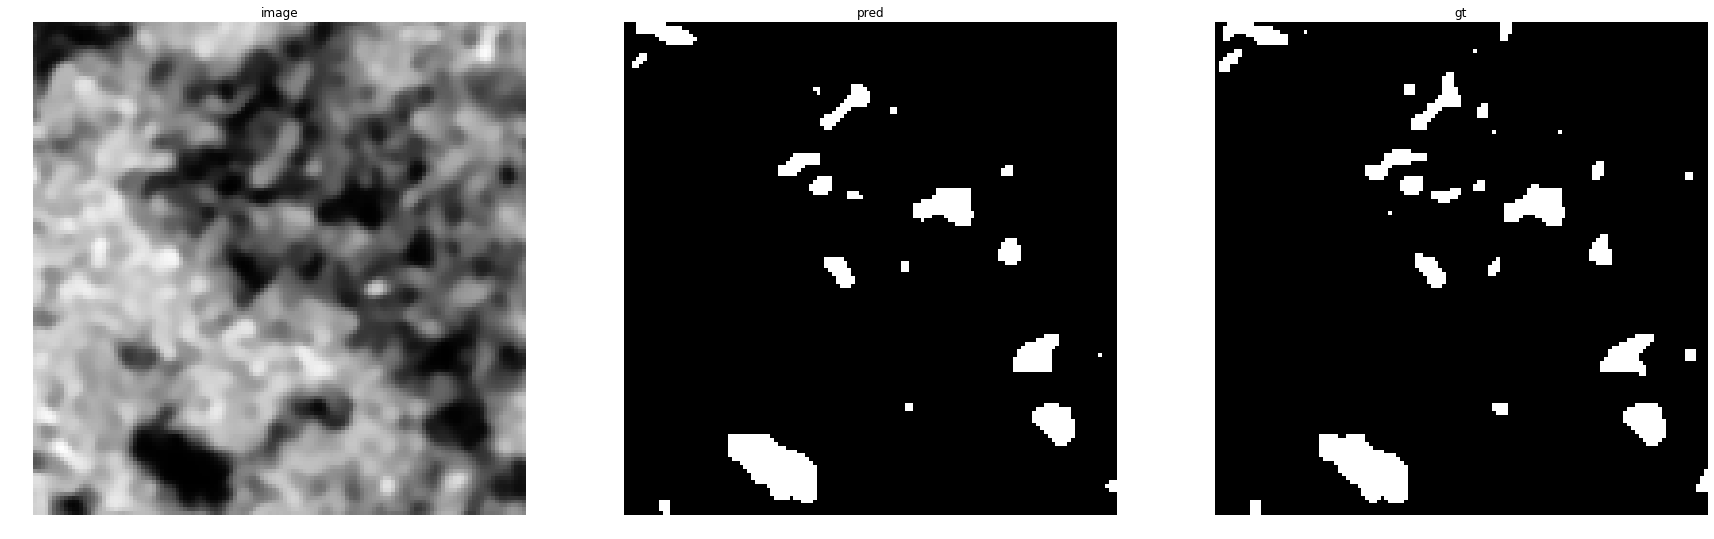

accuracy    : 0.9884033203125
precision   : 0.9757785467128027
recall      : 0.8334975369458129
f1          : 0.8990435706695006
pr_auc      : 0.9788509782513546
iou         : 0.8166023166023166


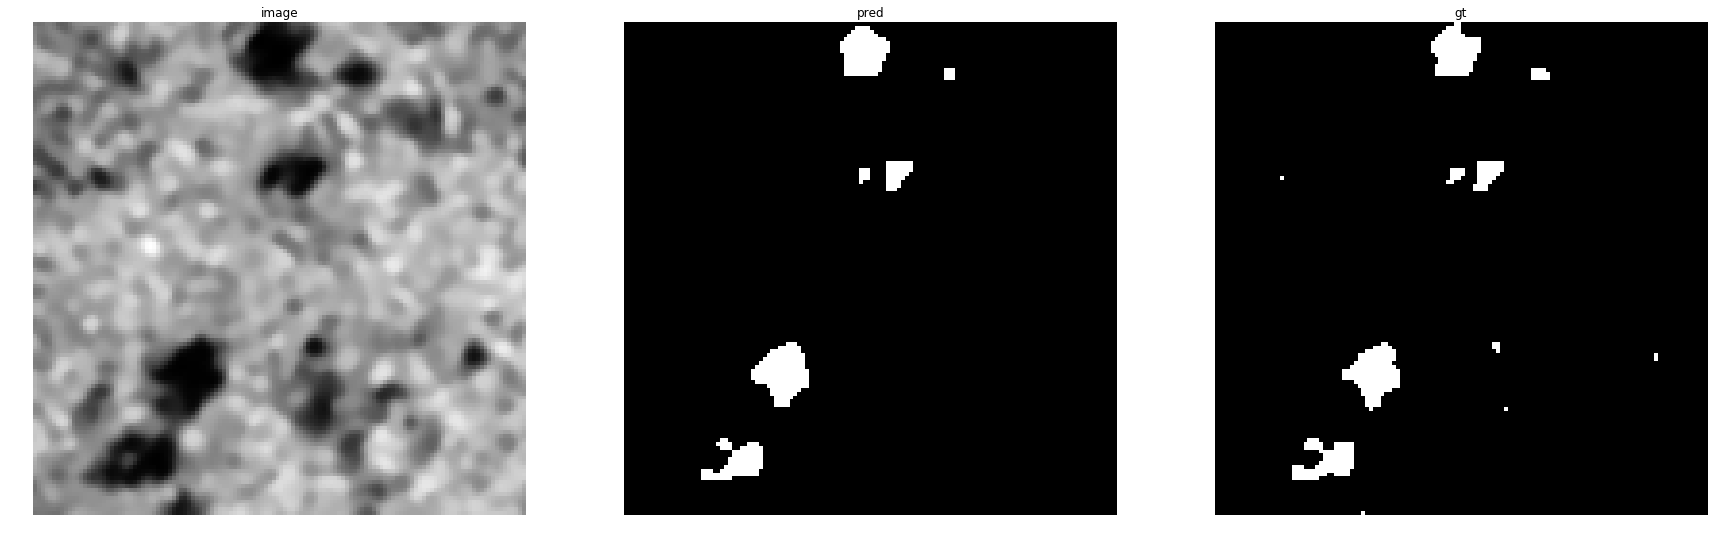

accuracy    : 0.9964599609375
precision   : 0.9533333333333334
recall      : 0.9206008583690987
f1          : 0.9366812227074236
pr_auc      : 0.9879594265642944
iou         : 0.8809034907597536


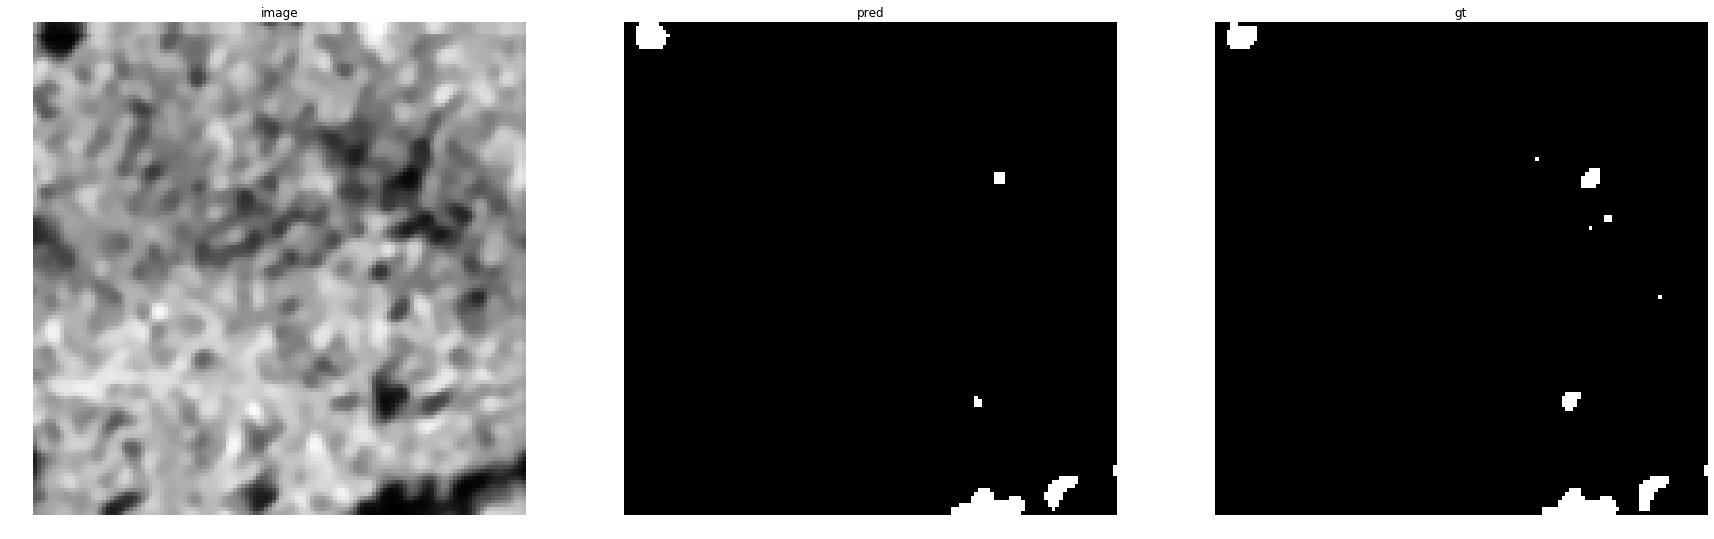

accuracy    : 0.99688720703125
precision   : 0.9381443298969072
recall      : 0.8235294117647058
f1          : 0.8771084337349397
pr_auc      : 0.9619991180136243
iou         : 0.7811158798283262


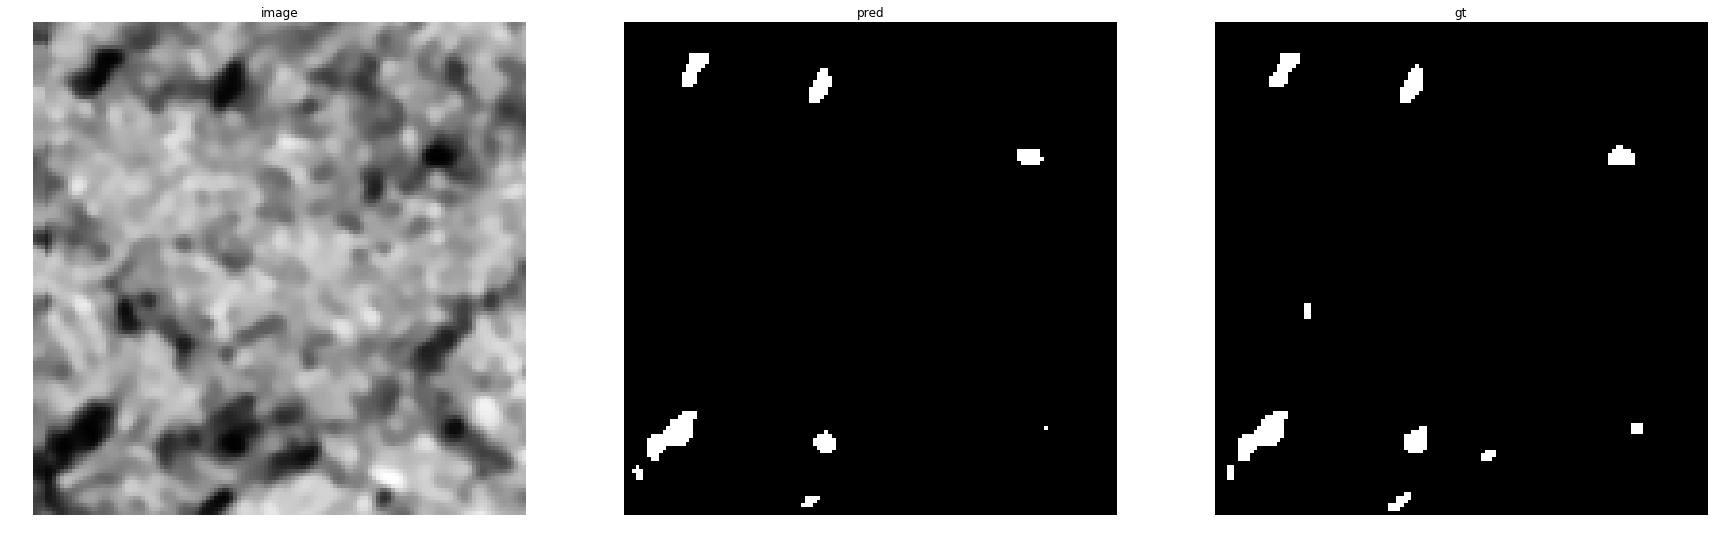

accuracy    : 0.9964599609375
precision   : 0.9911111111111112
recall      : 0.7992831541218638
f1          : 0.8849206349206349
pr_auc      : 0.9857456063770113
iou         : 0.7935943060498221


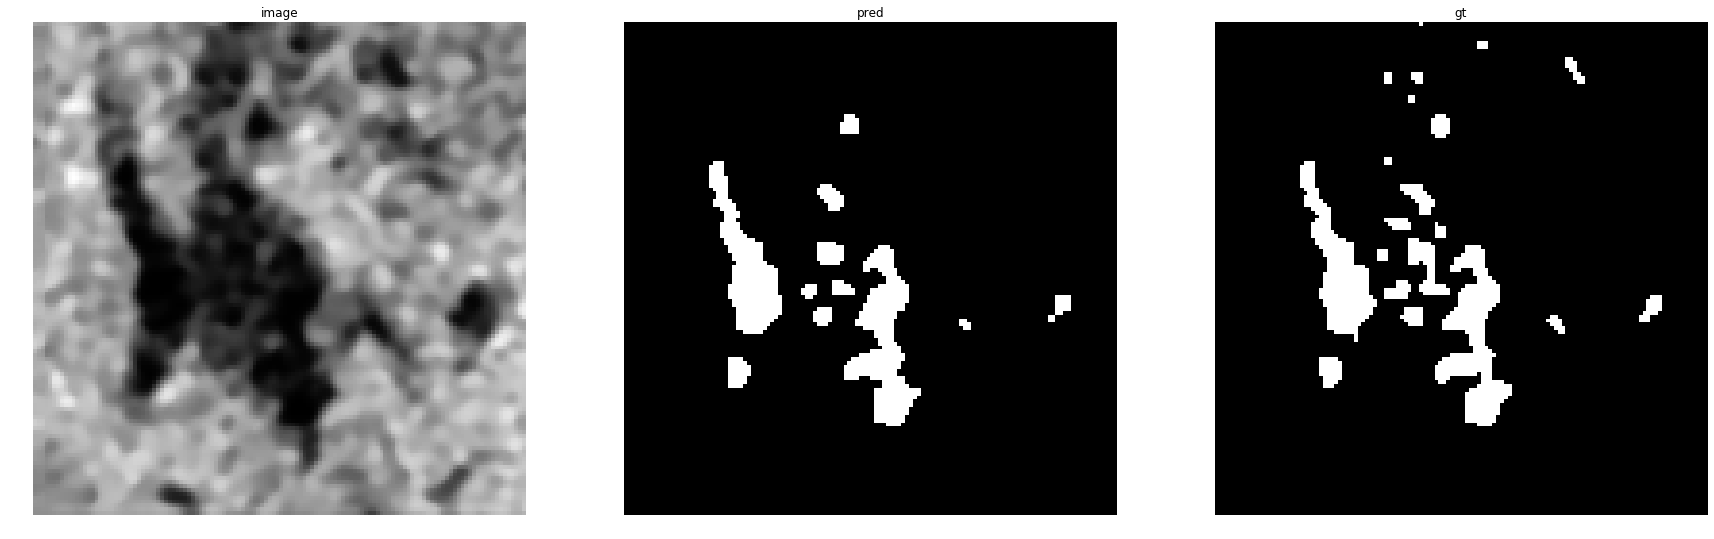

accuracy    : 0.98699951171875
precision   : 0.9592668024439919
recall      : 0.8448430493273542
f1          : 0.8984263233190272
pr_auc      : 0.9799143768713466
iou         : 0.8155844155844156


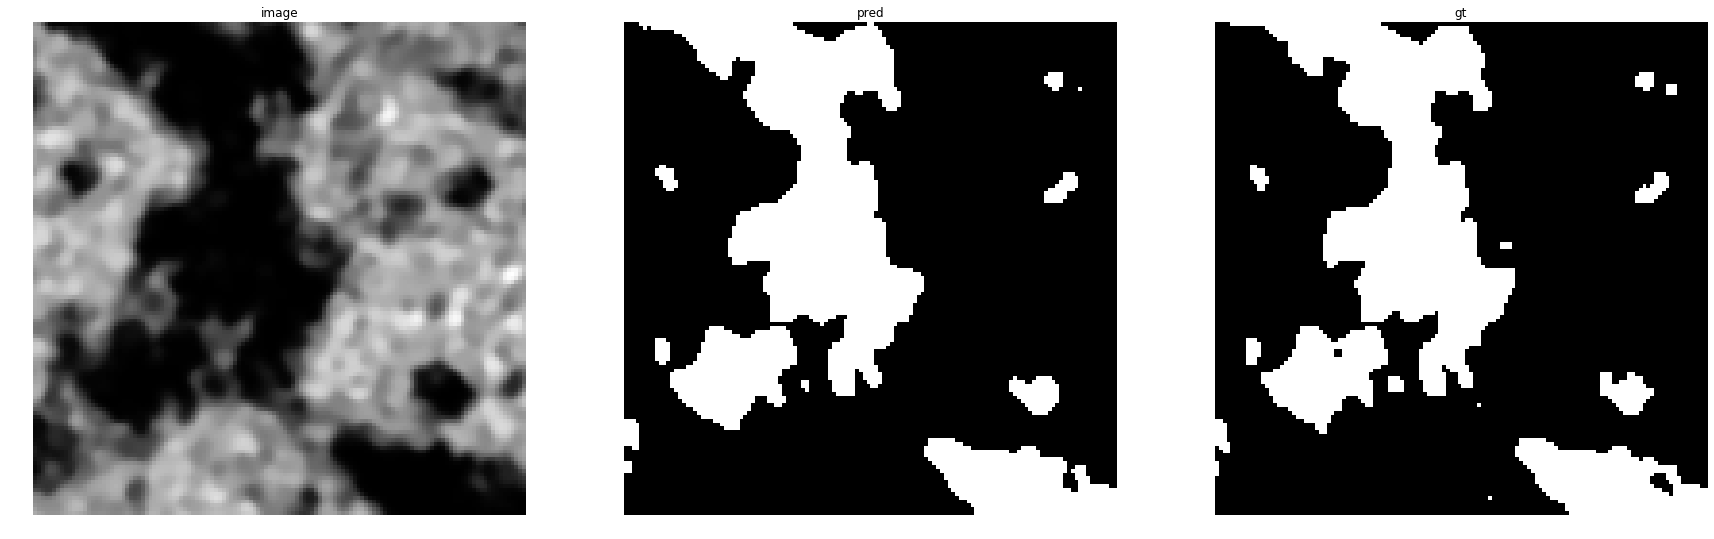

accuracy    : 0.98553466796875
precision   : 0.9596622889305816
recall      : 0.9843637238393071
f1          : 0.971856074100463
pr_auc      : 0.998172030773329
iou         : 0.9452529452529452


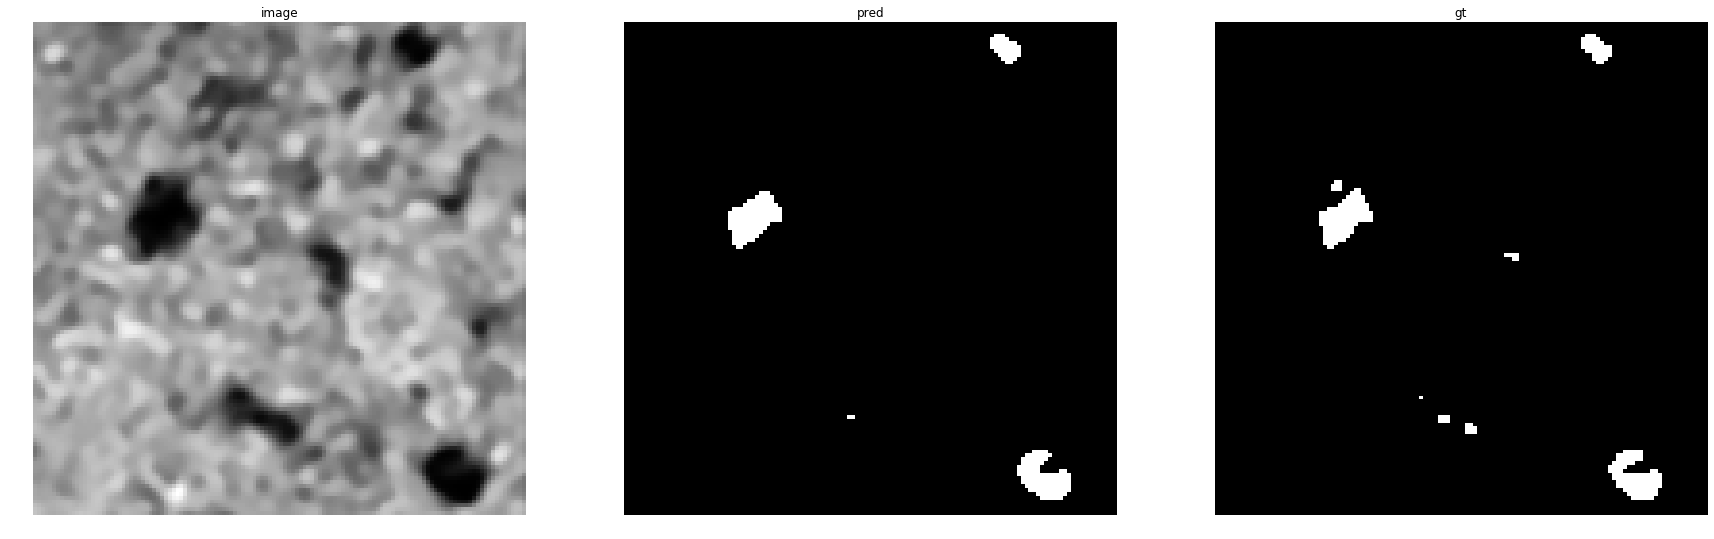

accuracy    : 0.9970703125
precision   : 0.9405594405594405
recall      : 0.8966666666666666
f1          : 0.9180887372013652
pr_auc      : 0.981577836391926
iou         : 0.8485804416403786


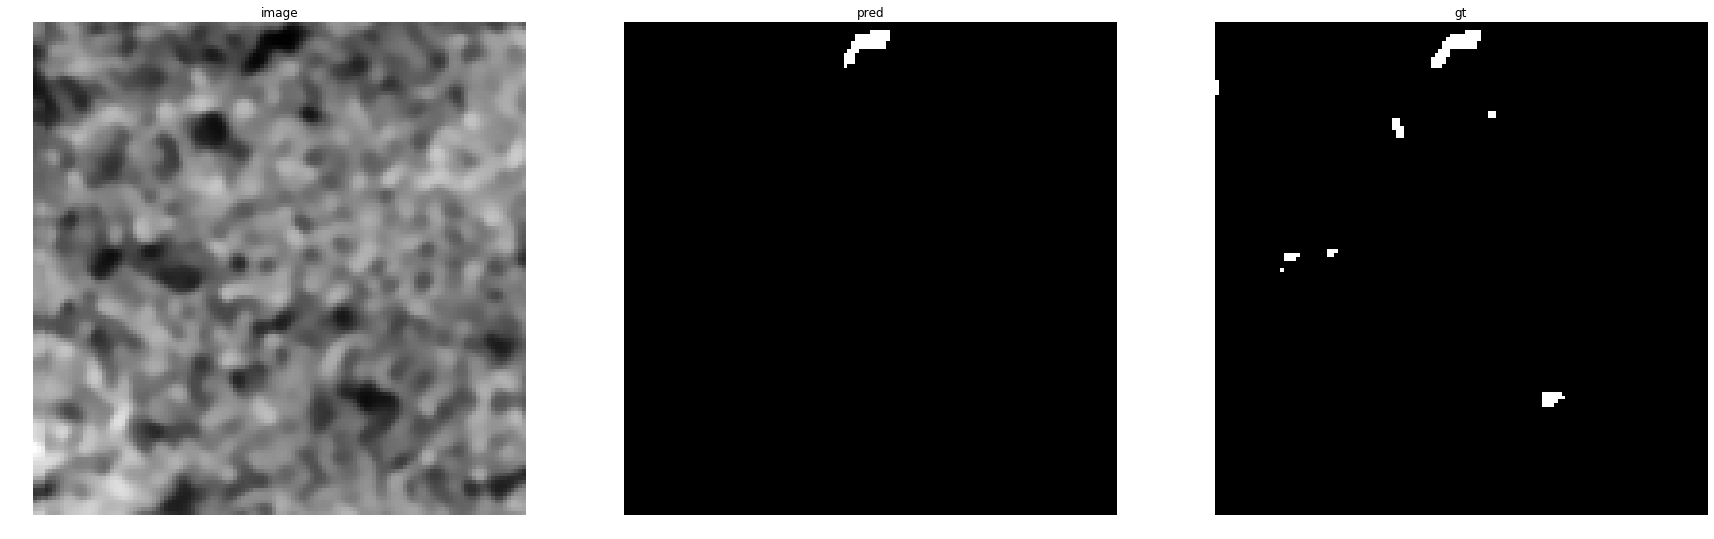

accuracy    : 0.99652099609375
precision   : 0.9629629629629629
recall      : 0.48598130841121495
f1          : 0.6459627329192547
pr_auc      : 0.8980800340431554
iou         : 0.47706422018348627


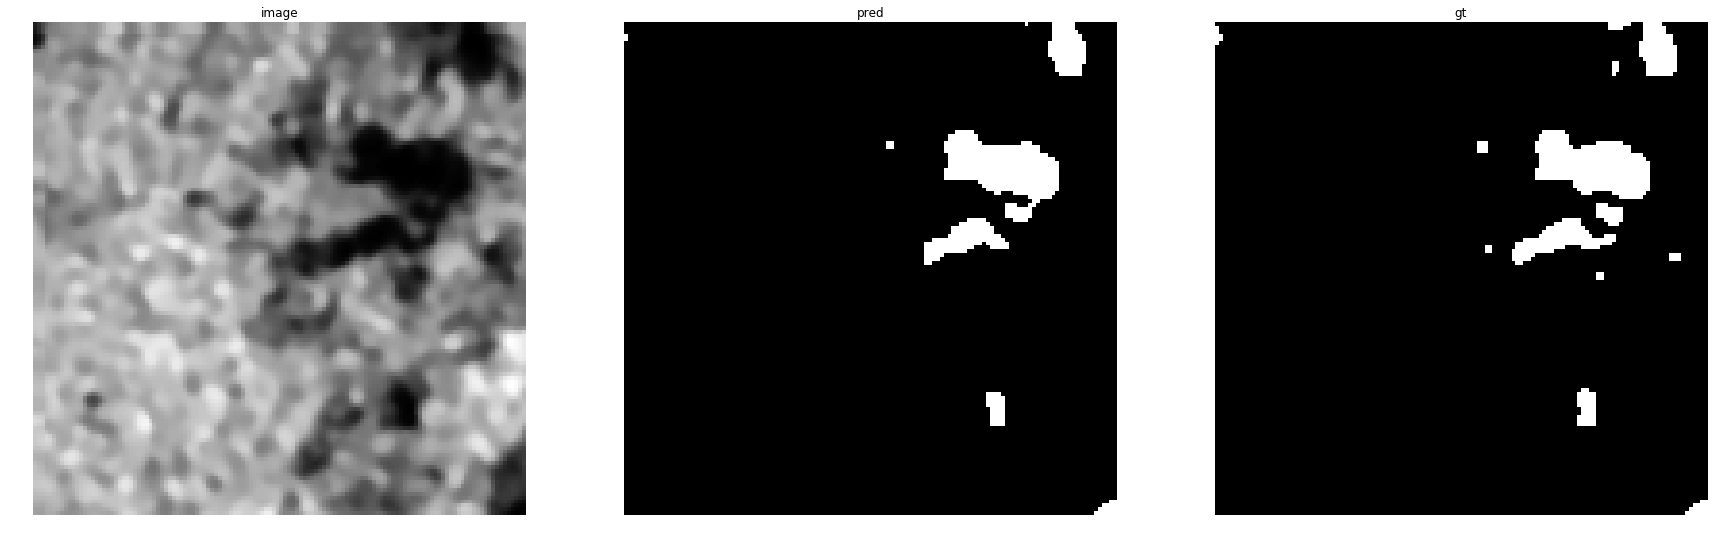

accuracy    : 0.9942626953125
precision   : 0.9757489300998573
recall      : 0.8988173455978975
f1          : 0.935704514363885
pr_auc      : 0.9903652434720636
iou         : 0.8791773778920309


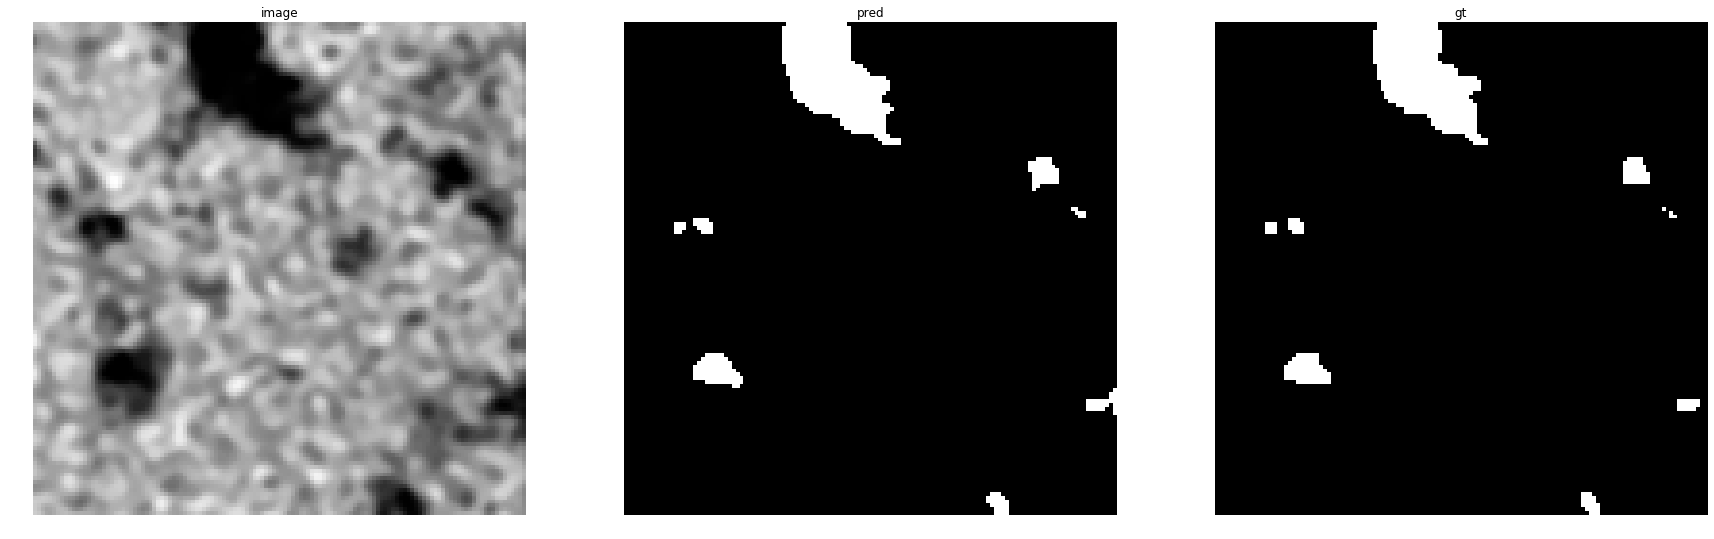

accuracy    : 0.9969482421875
precision   : 0.9398976982097187
recall      : 0.9959349593495935
f1          : 0.9671052631578947
pr_auc      : 0.9983555651252694
iou         : 0.9363057324840764


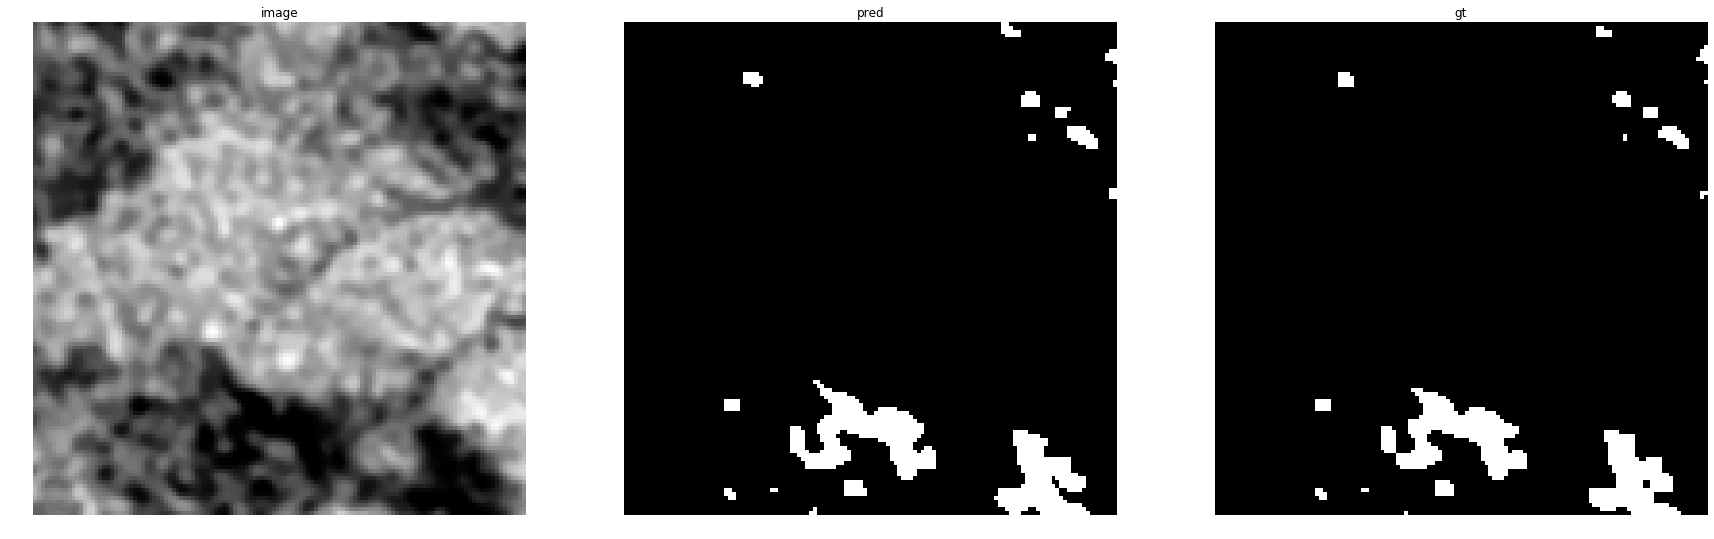

accuracy    : 0.99481201171875
precision   : 0.919674039580908
recall      : 0.9801488833746899
f1          : 0.948948948948949
pr_auc      : 0.9954633760147032
iou         : 0.9028571428571428


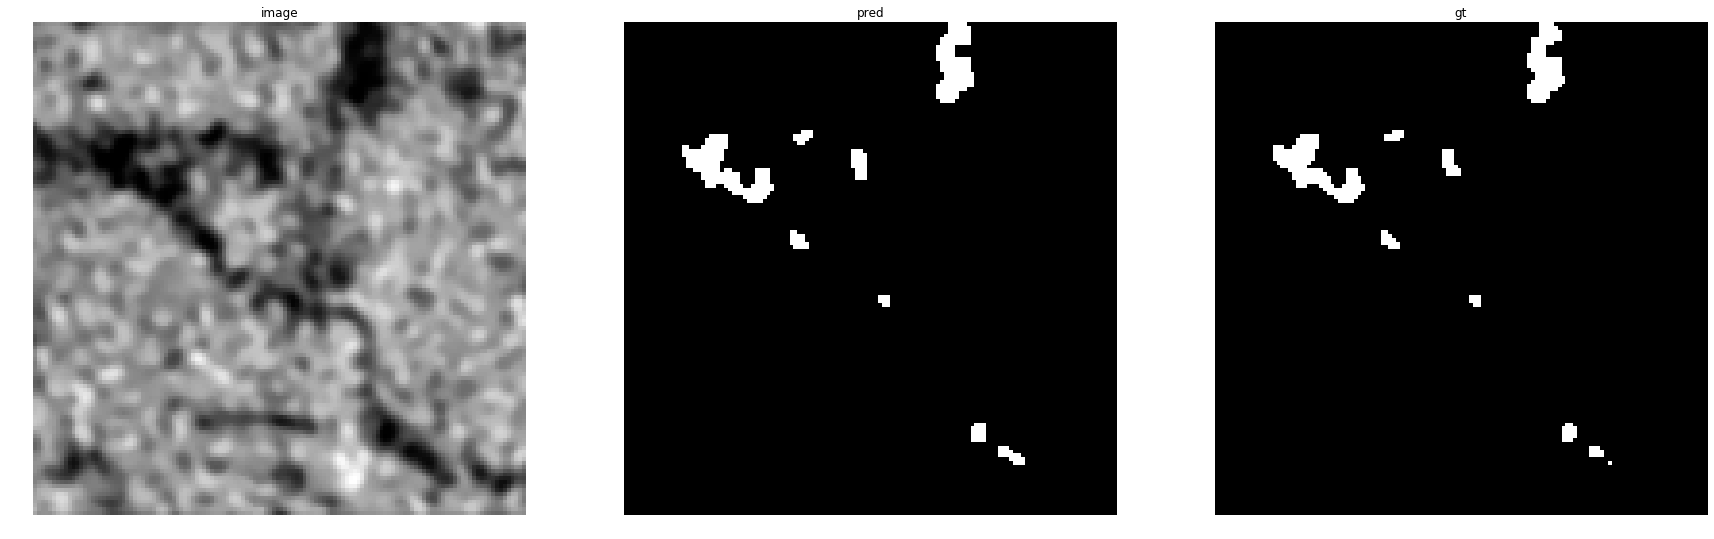

accuracy    : 0.99725341796875
precision   : 0.9118329466357309
recall      : 0.9825
f1          : 0.9458483754512635
pr_auc      : 0.9905228793868569
iou         : 0.8972602739726028


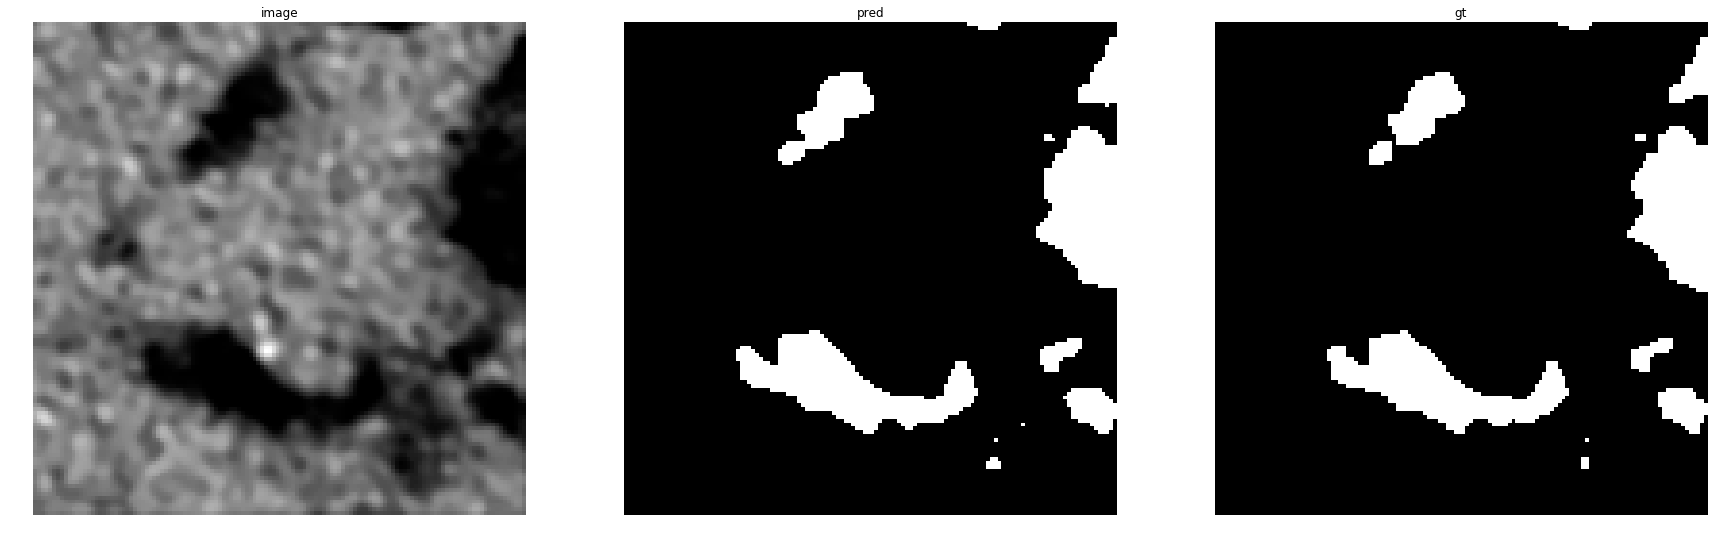

accuracy    : 0.99365234375
precision   : 0.9537750385208013
recall      : 0.9925173703901656
f1          : 0.9727606076479831
pr_auc      : 0.9986534353010539
iou         : 0.9469658337582866


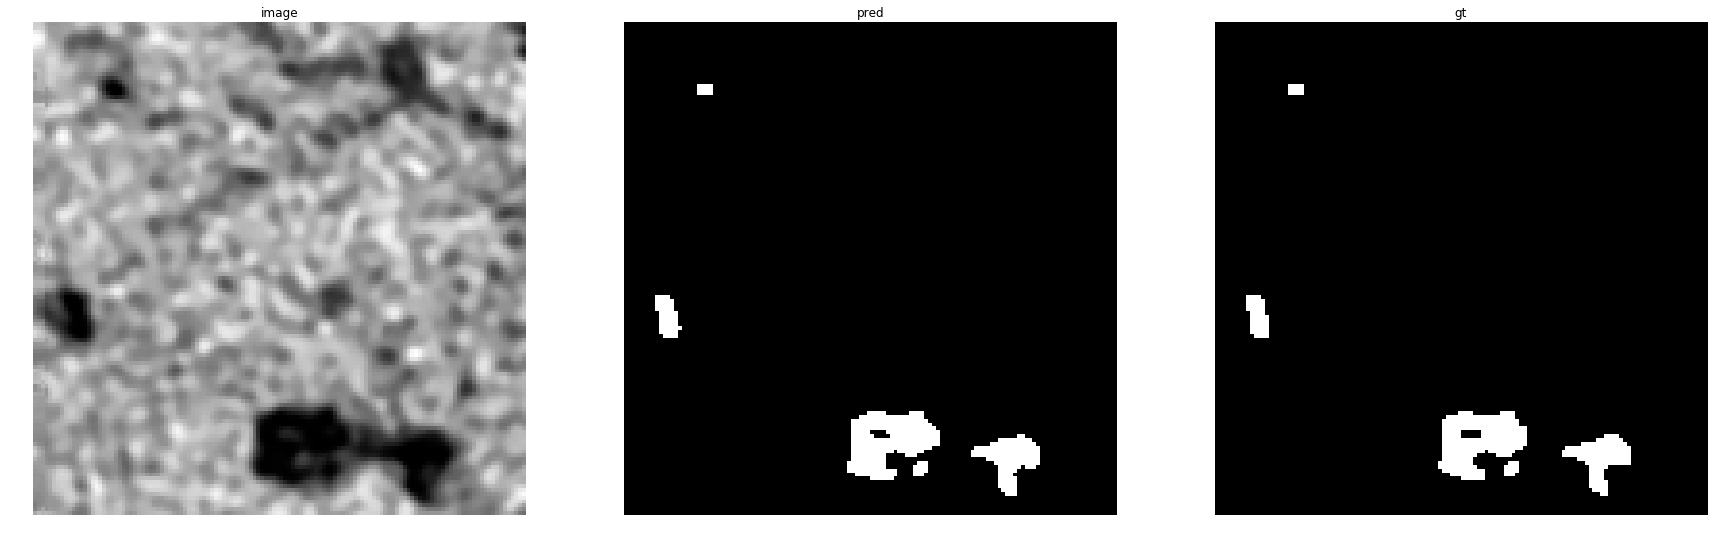

accuracy    : 0.99822998046875
precision   : 0.9504950495049505
recall      : 0.9917355371900827
f1          : 0.9706774519716885
pr_auc      : 0.9982436515359296
iou         : 0.9430255402750491


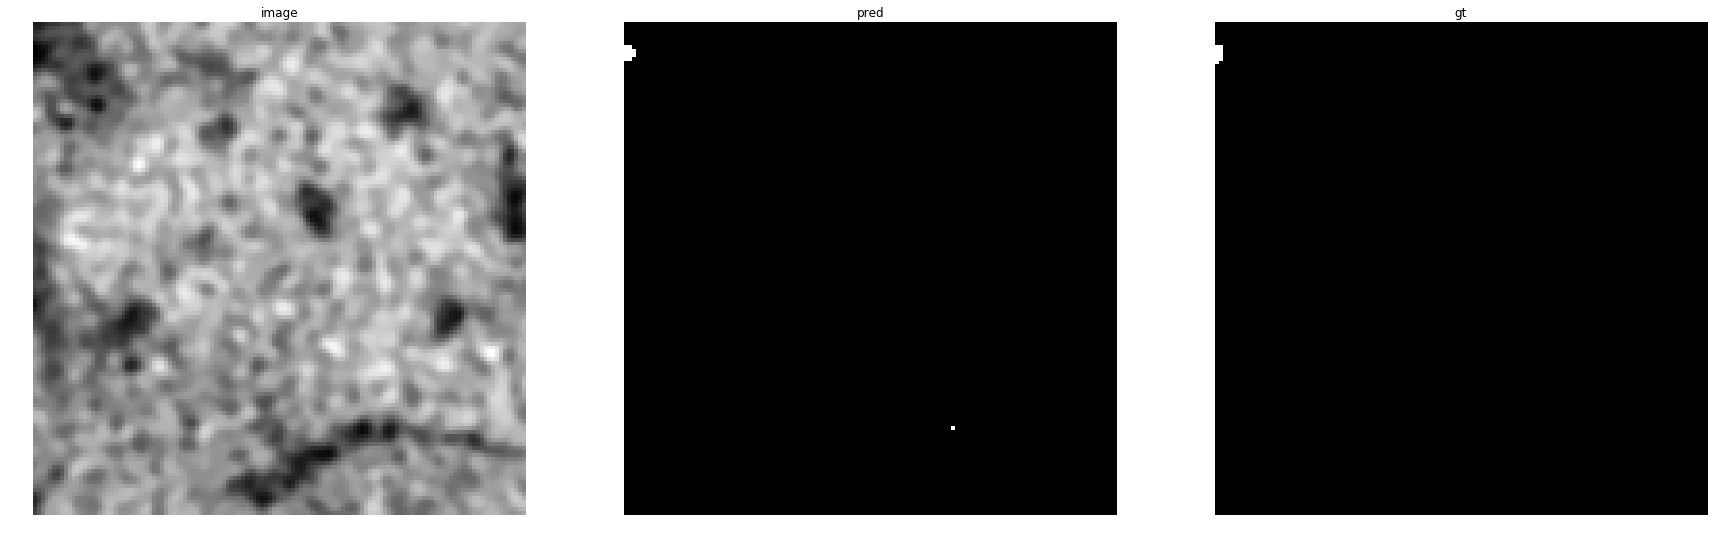

accuracy    : 0.999755859375
precision   : 0.7272727272727273
recall      : 0.8888888888888888
f1          : 0.7999999999999999
pr_auc      : 0.9415204678362574
iou         : 0.6666666666666666


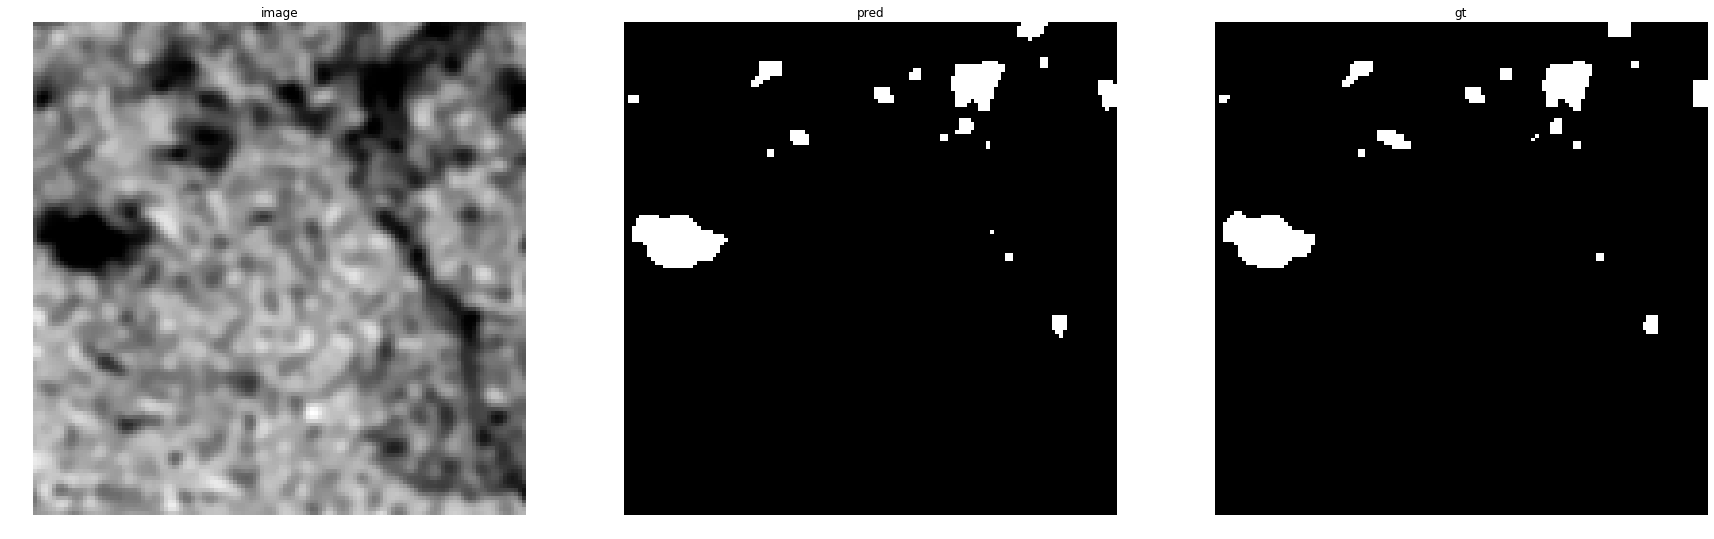

accuracy    : 0.9962158203125
precision   : 0.9292035398230089
recall      : 0.9597806215722121
f1          : 0.9442446043165468
pr_auc      : 0.9917980504247677
iou         : 0.8943781942078365


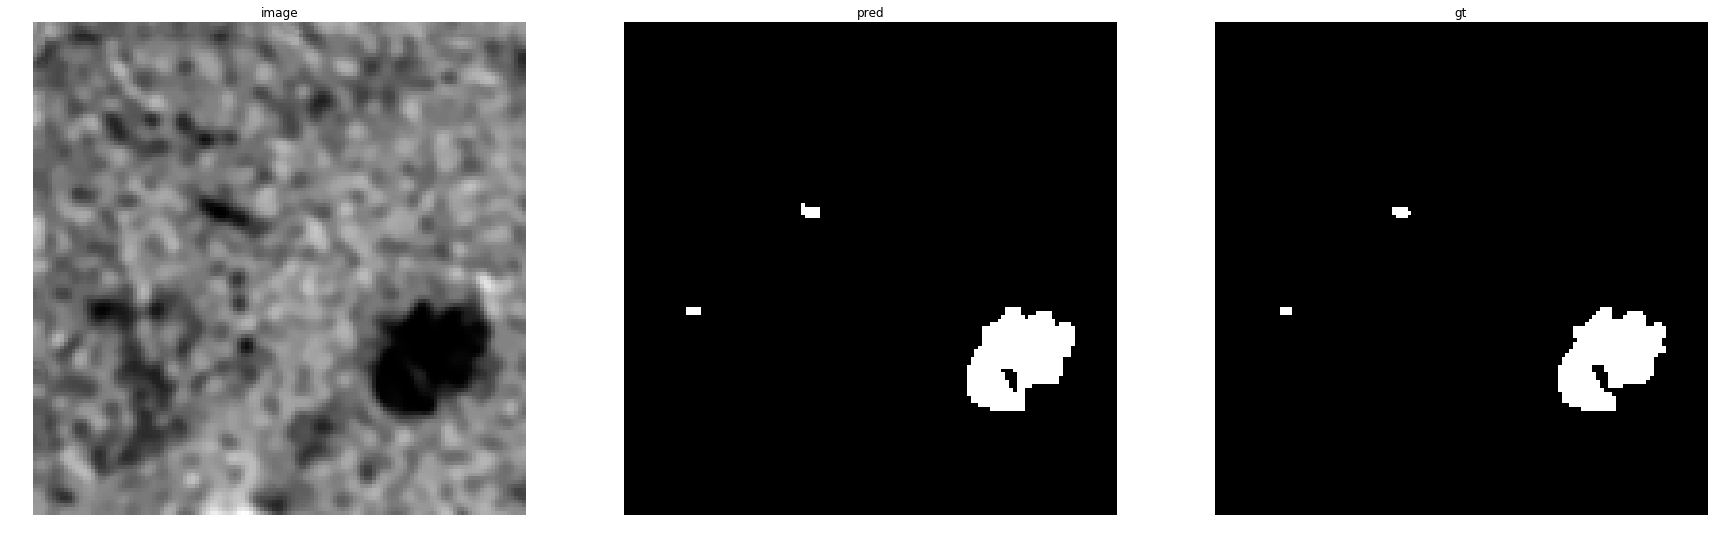

accuracy    : 0.99835205078125
precision   : 0.9546313799621928
recall      : 0.9940944881889764
f1          : 0.973963355834137
pr_auc      : 0.9989376577854808
iou         : 0.9492481203007519


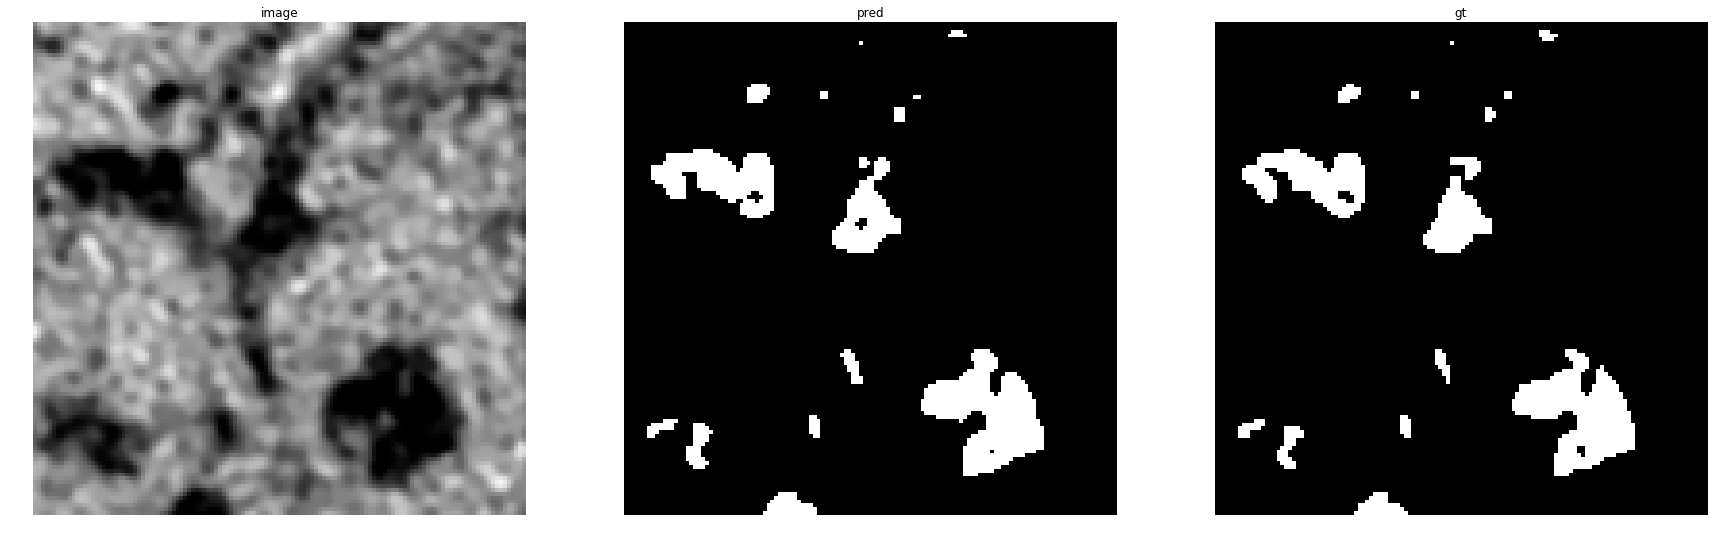

accuracy    : 0.99237060546875
precision   : 0.9322289156626506
recall      : 0.9725058915946583
f1          : 0.9519415609381008
pr_auc      : 0.9937705667989521
iou         : 0.9082905355832722


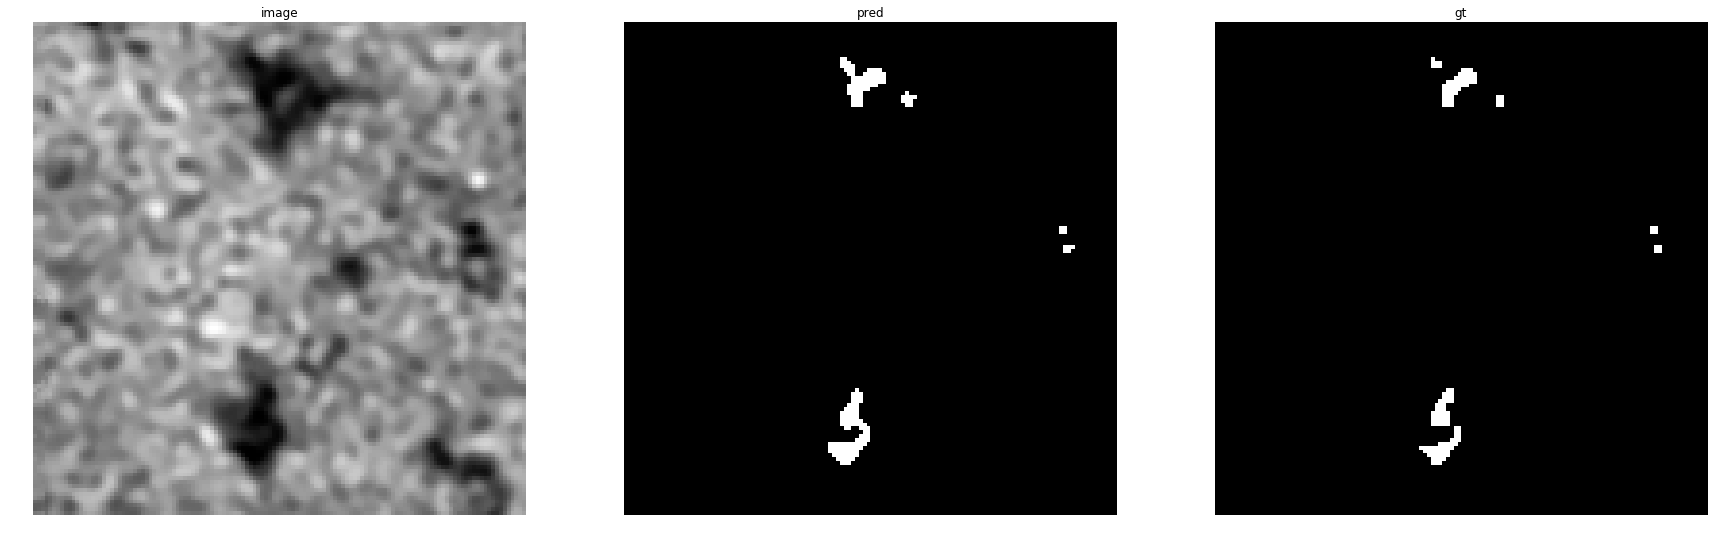

accuracy    : 0.99737548828125
precision   : 0.7880434782608695
recall      : 0.9731543624161074
f1          : 0.8708708708708708
pr_auc      : 0.9757768369926134
iou         : 0.7712765957446809


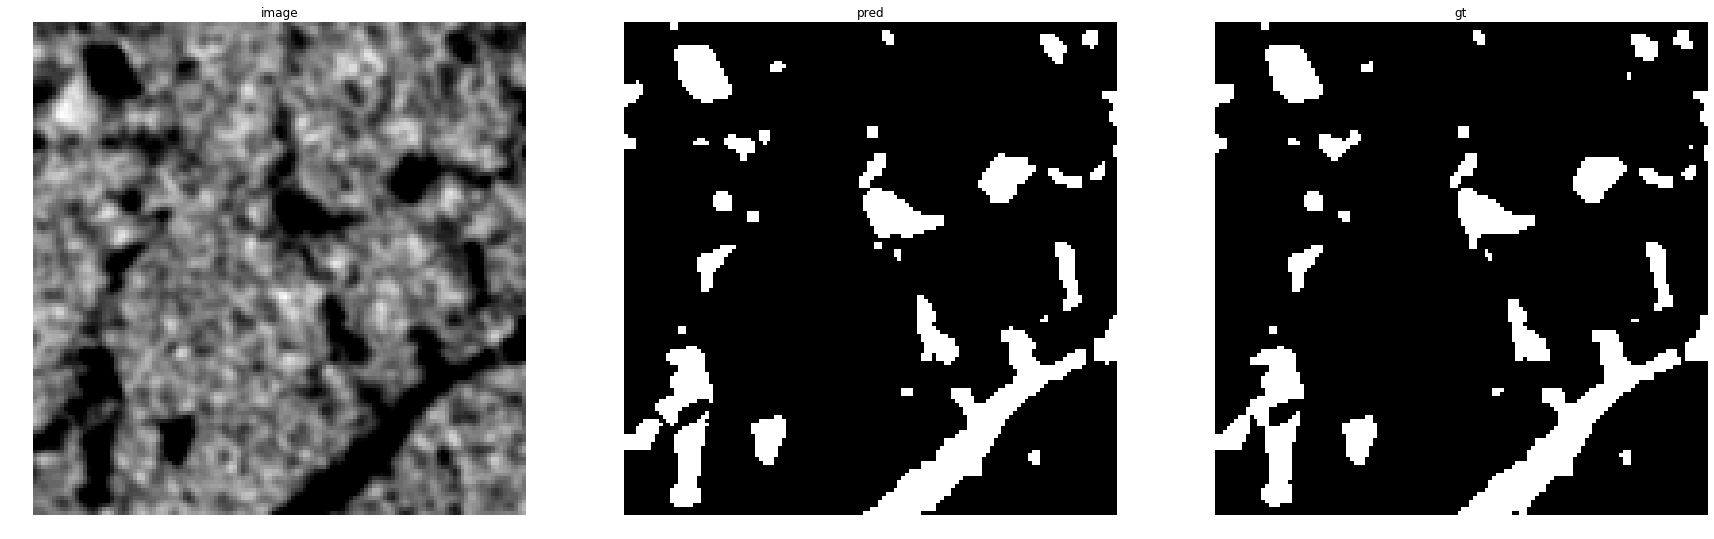

accuracy    : 0.99102783203125
precision   : 0.9625292740046838
recall      : 0.9684260131950989
f1          : 0.9654686398872445
pr_auc      : 0.9962825083029028
iou         : 0.9332425068119891


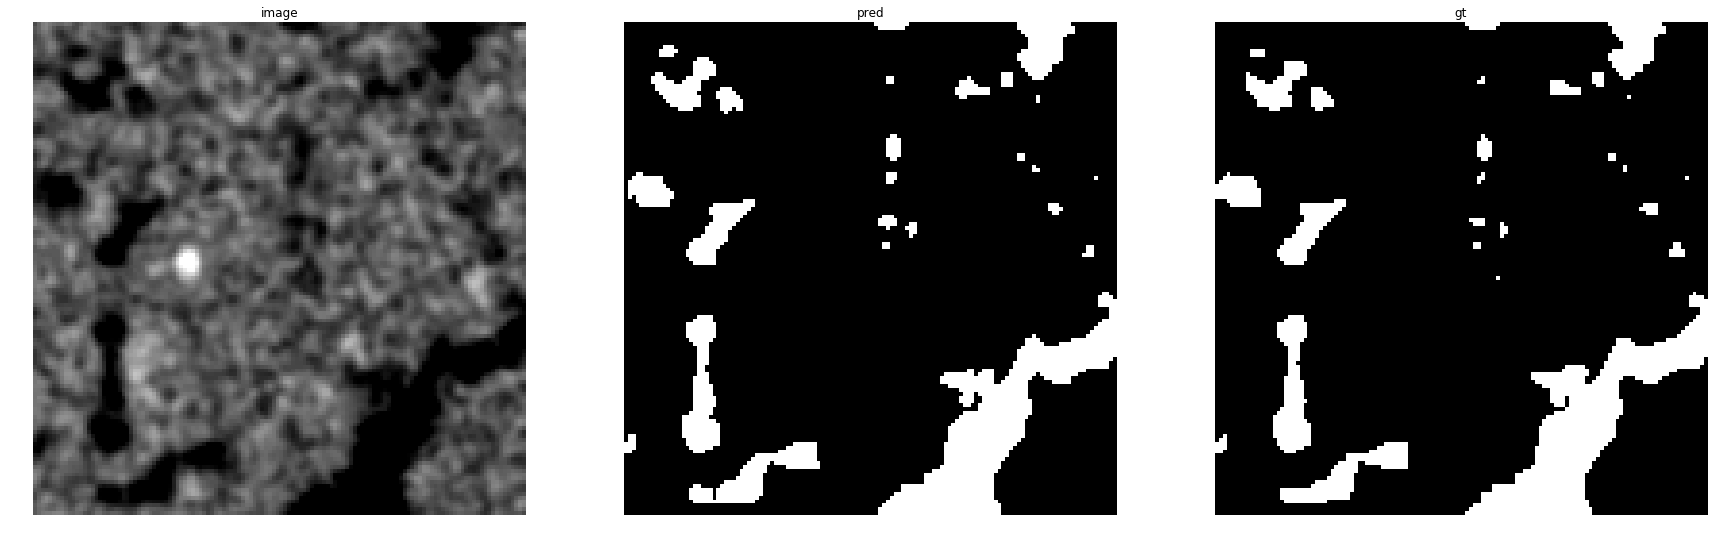

accuracy    : 0.9915771484375
precision   : 0.9599056603773585
recall      : 0.9746168582375478
f1          : 0.9672053231939162
pr_auc      : 0.9969419047188914
iou         : 0.936493327197423


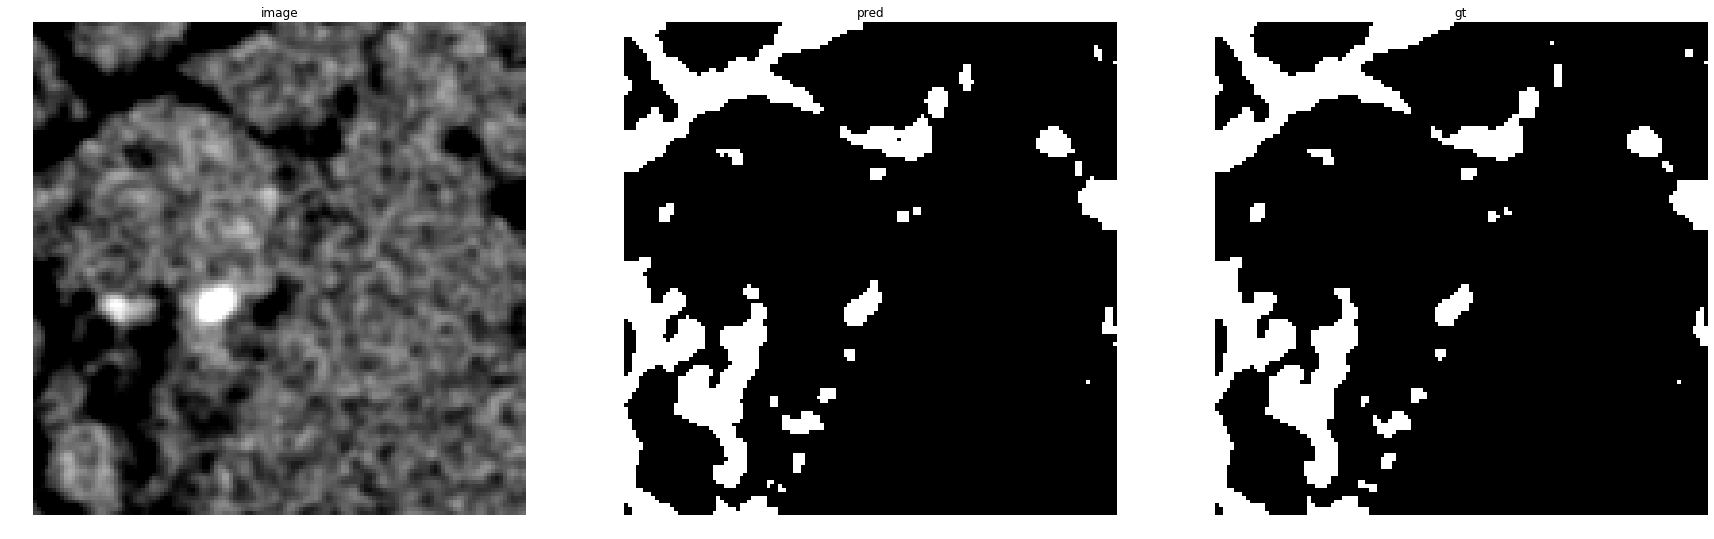

accuracy    : 0.99017333984375
precision   : 0.9663105998356615
recall      : 0.9675030851501439
f1          : 0.9669064748201438
pr_auc      : 0.9969223156925741
iou         : 0.935933147632312


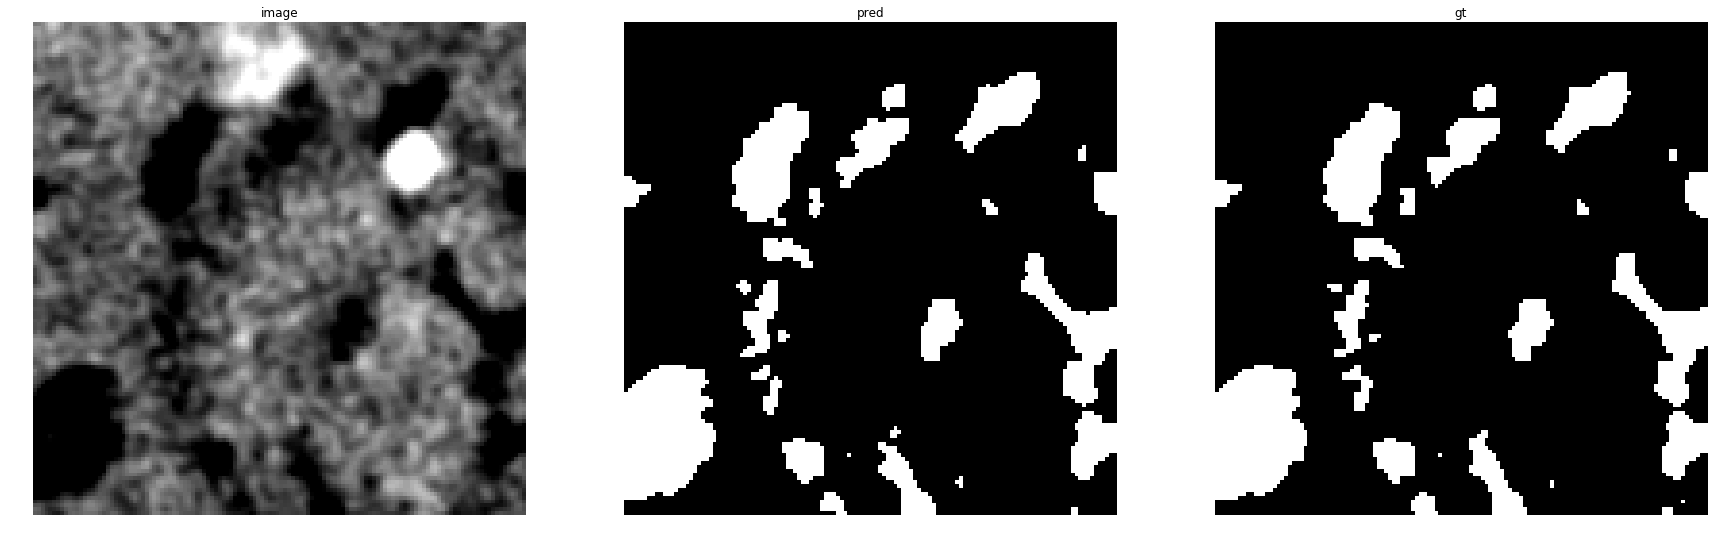

accuracy    : 0.990966796875
precision   : 0.9715657311669128
recall      : 0.9737231680236862
f1          : 0.9726432532347504
pr_auc      : 0.9978310959776348
iou         : 0.9467434328895286


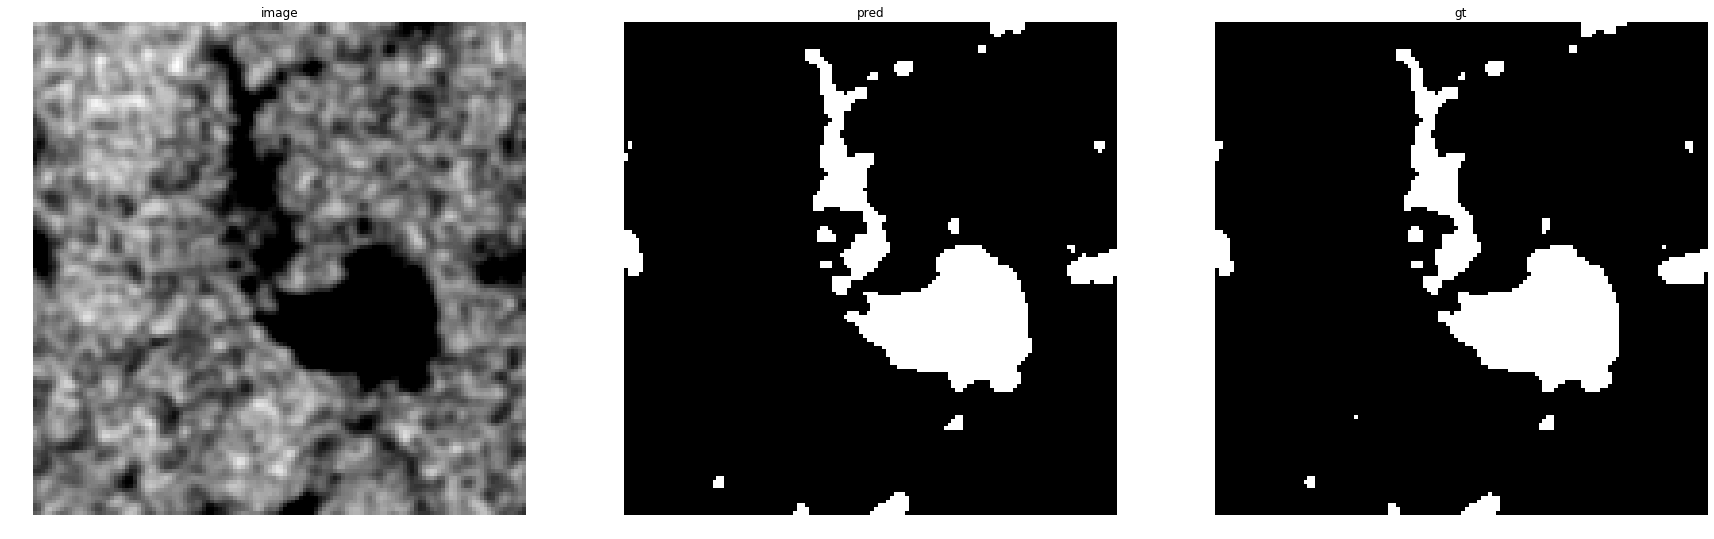

accuracy    : 0.99530029296875
precision   : 0.9754440961337513
recall      : 0.9841855561412757
f1          : 0.9797953293098923
pr_auc      : 0.998869352967637
iou         : 0.9603909465020576


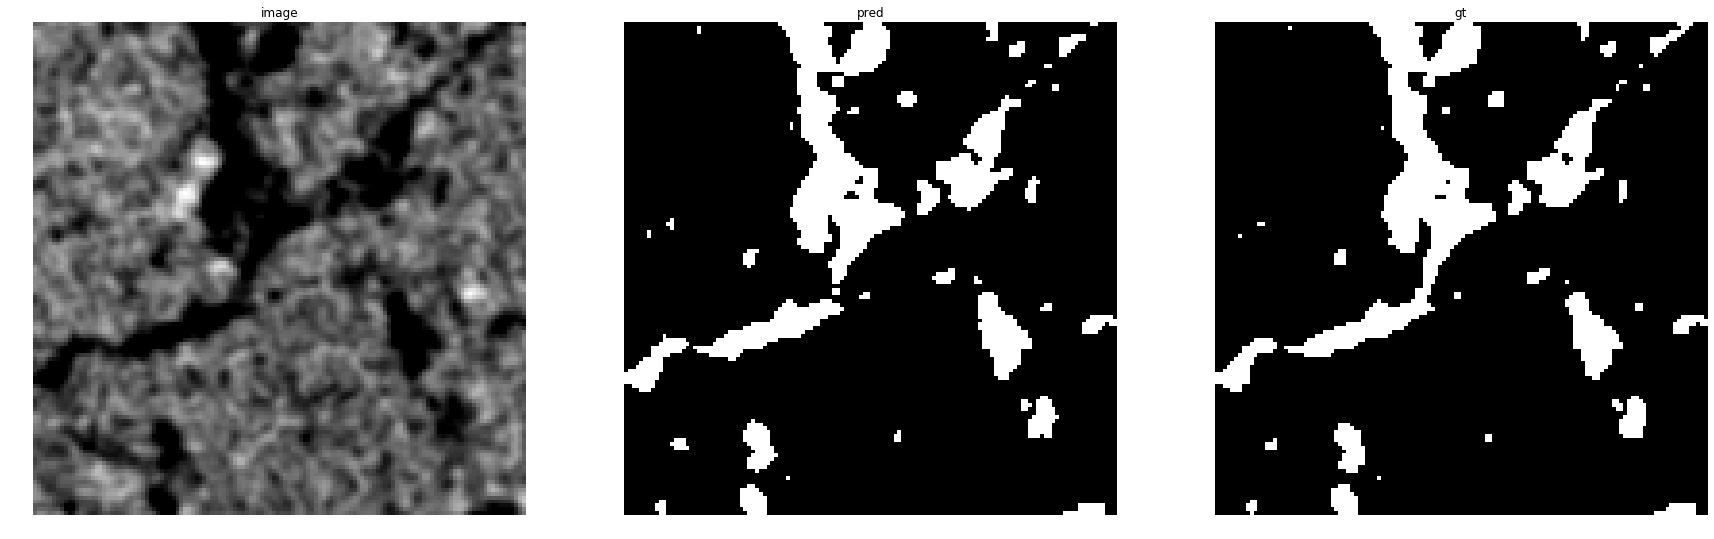

accuracy    : 0.9896240234375
precision   : 0.9529411764705882
recall      : 0.9696132596685083
f1          : 0.9612049292560474
pr_auc      : 0.9953754239889363
iou         : 0.9253075571177505


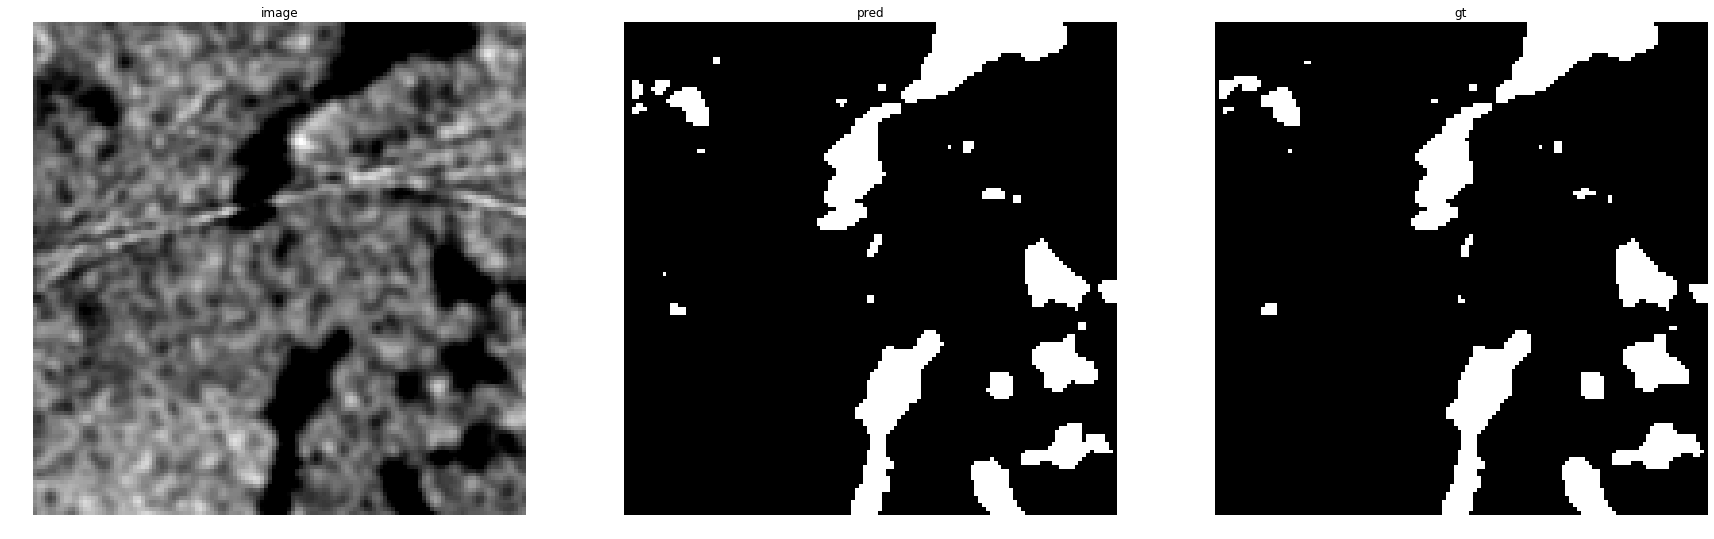

accuracy    : 0.99261474609375
precision   : 0.9646102343376375
recall      : 0.9772286821705426
f1          : 0.9708784596871238
pr_auc      : 0.9976527708826242
iou         : 0.9434050514499532


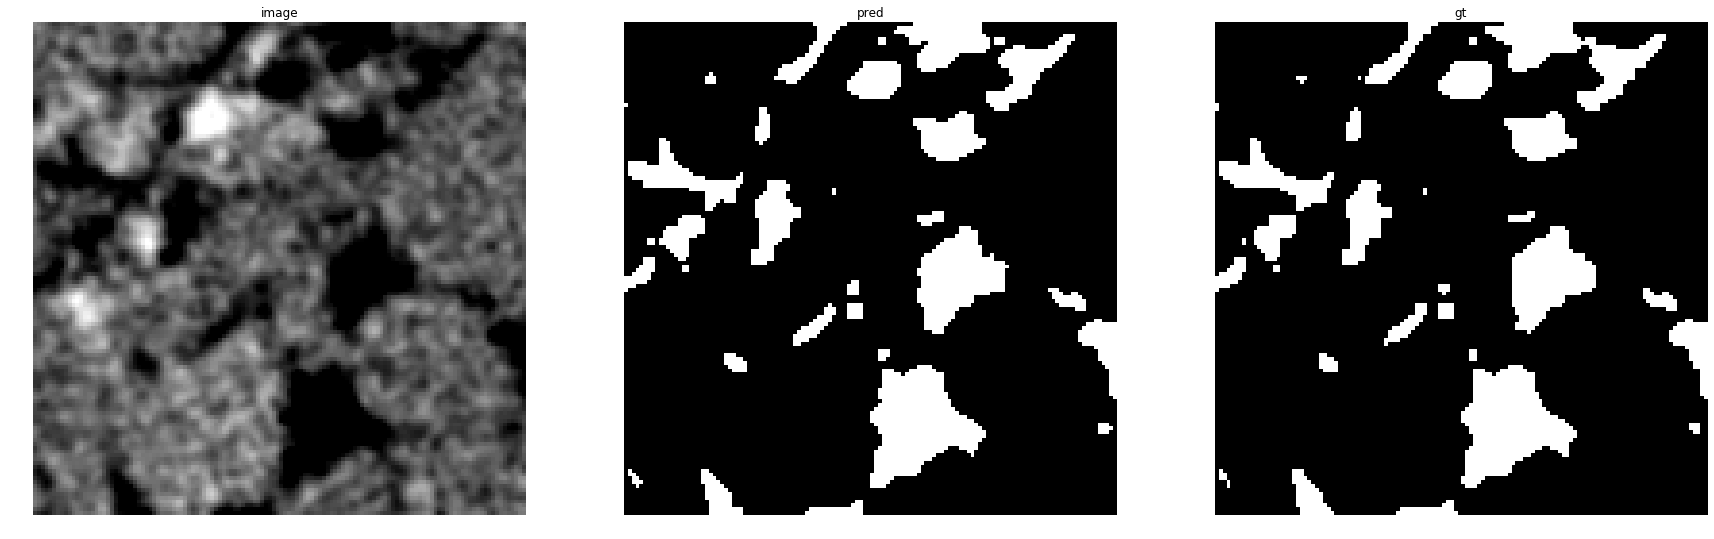

accuracy    : 0.9925537109375
precision   : 0.9760710150521035
recall      : 0.9768250289687138
f1          : 0.9764478764478766
pr_auc      : 0.998067009802523
iou         : 0.953979630328178


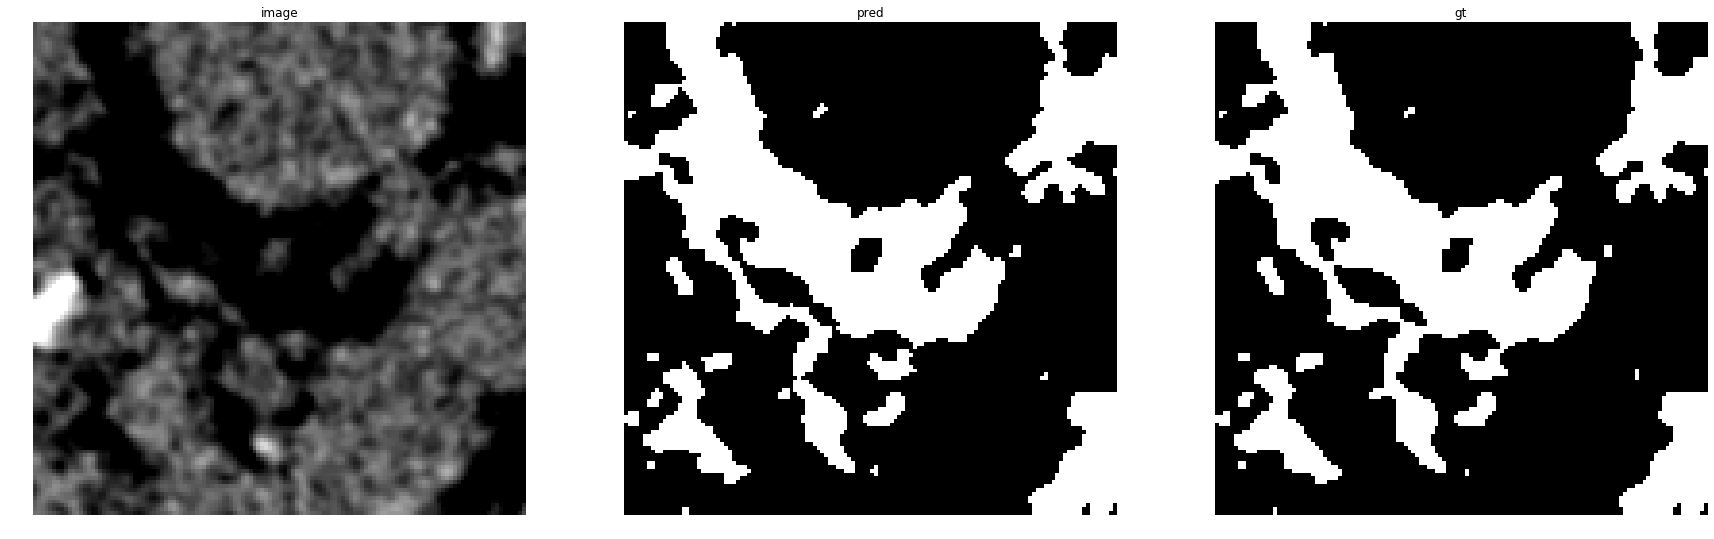

accuracy    : 0.9892578125
precision   : 0.9867239359625146
recall      : 0.9790778767919411
f1          : 0.9828860365616492
pr_auc      : 0.9989289878906256
iou         : 0.9663479923518165


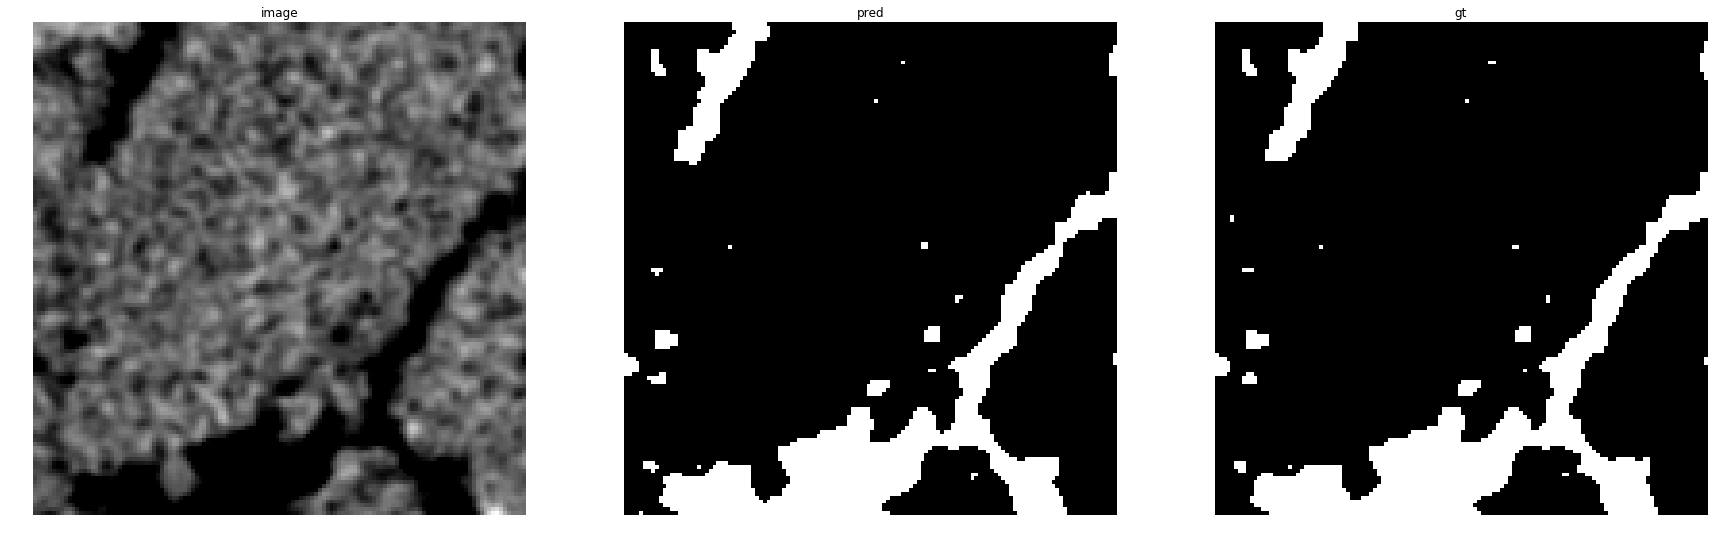

accuracy    : 0.99481201171875
precision   : 0.9827586206896551
recall      : 0.9815203695926081
f1          : 0.9821391048539608
pr_auc      : 0.9987707300655027
iou         : 0.9649050371593724


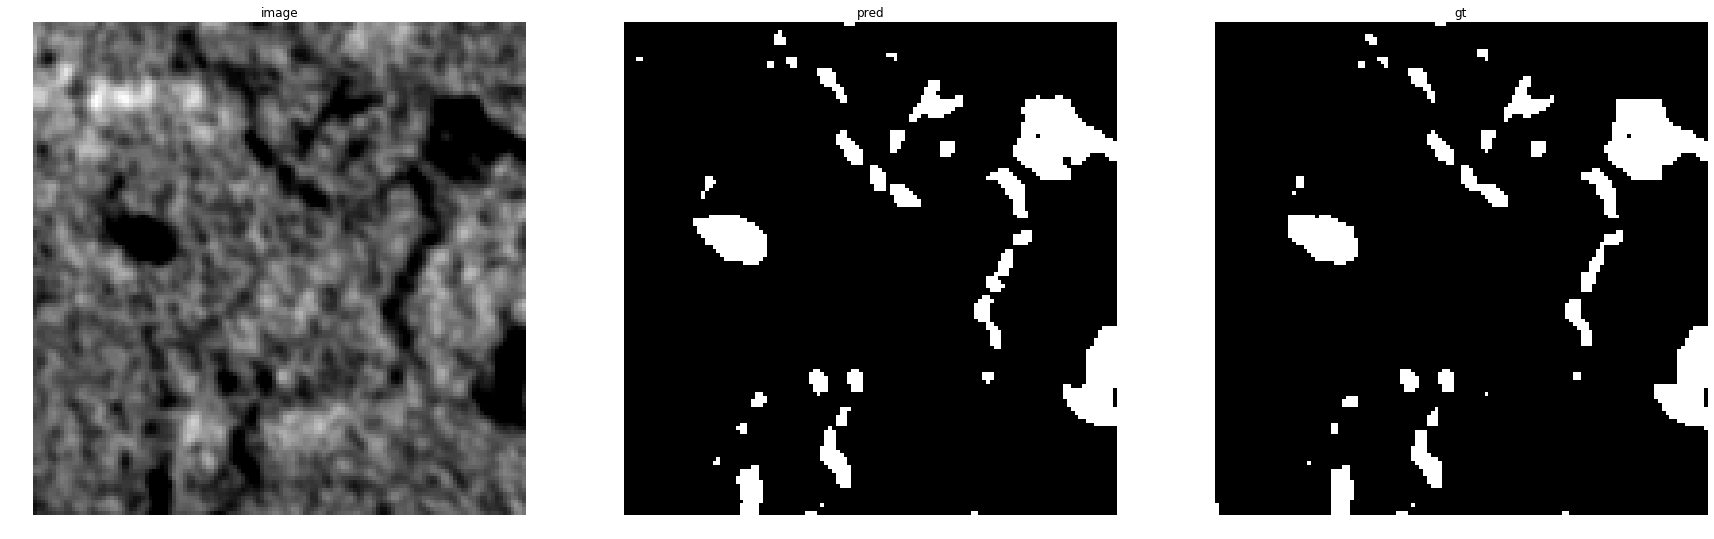

accuracy    : 0.99249267578125
precision   : 0.9415081042988019
recall      : 0.9709302325581395
f1          : 0.9559928443649374
pr_auc      : 0.9948755373862559
iou         : 0.9156956819739548


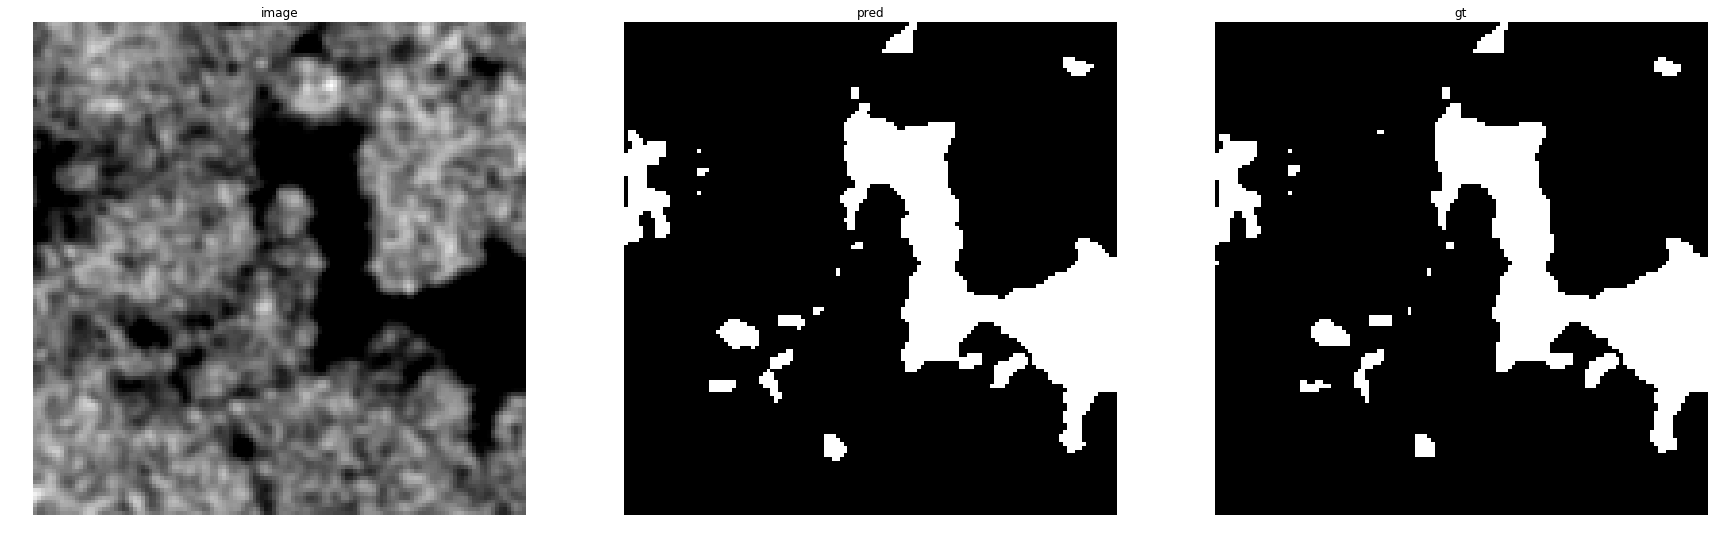

accuracy    : 0.99420166015625
precision   : 0.981419546636938
recall      : 0.9832464631422189
f1          : 0.9823321554770318
pr_auc      : 0.9990384284762289
iou         : 0.9652777777777778


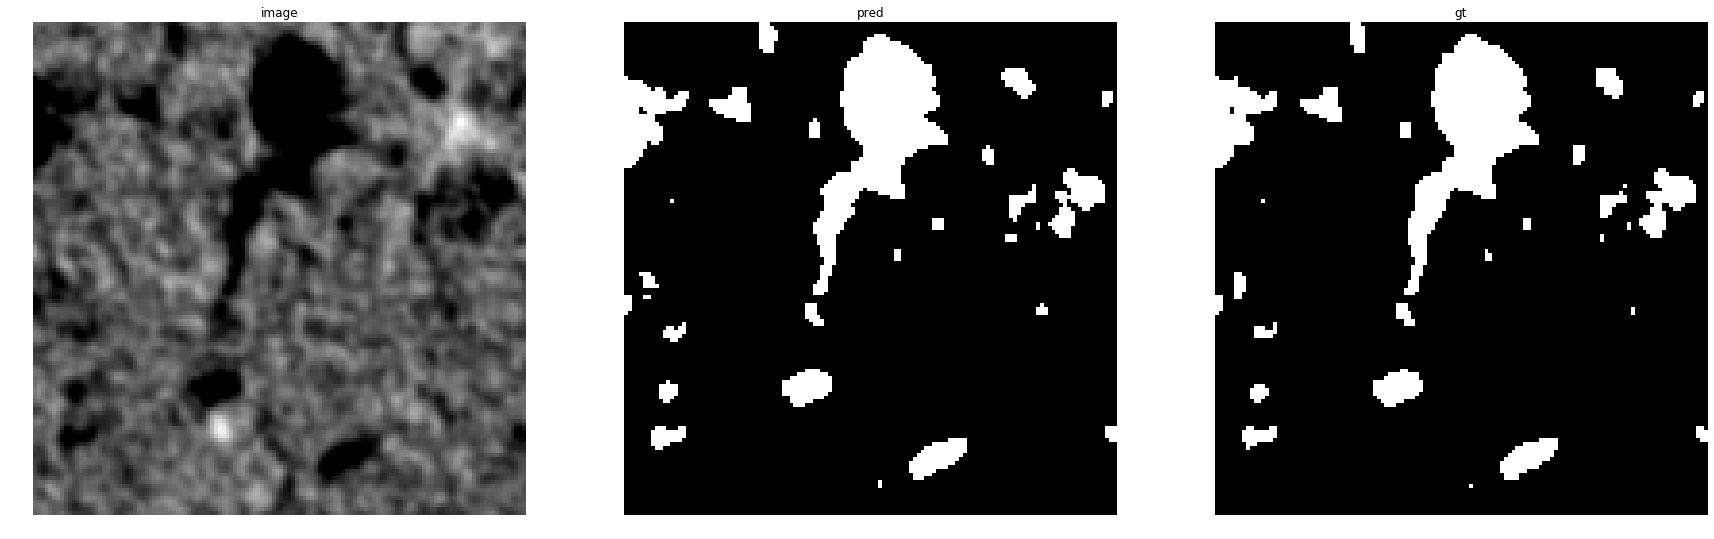

accuracy    : 0.99359130859375
precision   : 0.9608695652173913
recall      : 0.9816768461965575
f1          : 0.9711617687448504
pr_auc      : 0.9976971584057815
iou         : 0.9439402028830752


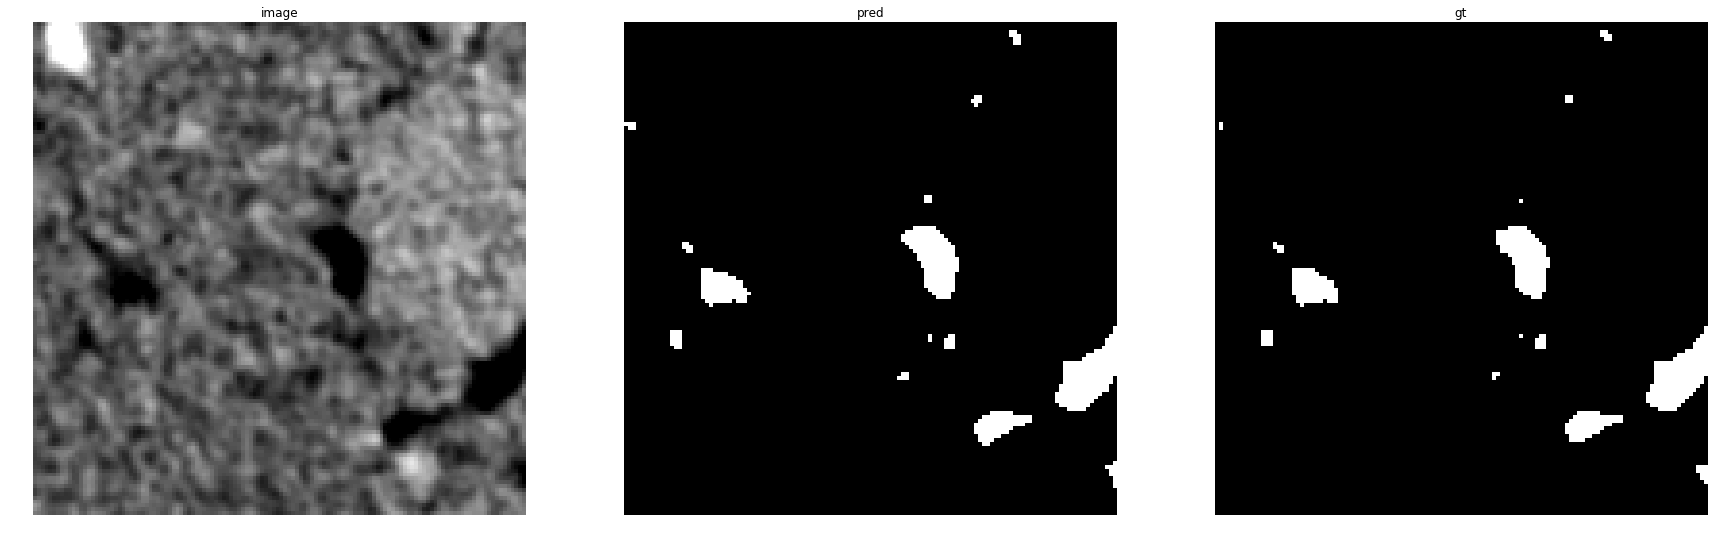

accuracy    : 0.99755859375
precision   : 0.946843853820598
recall      : 0.986159169550173
f1          : 0.9661016949152543
pr_auc      : 0.9978306972314744
iou         : 0.9344262295081968


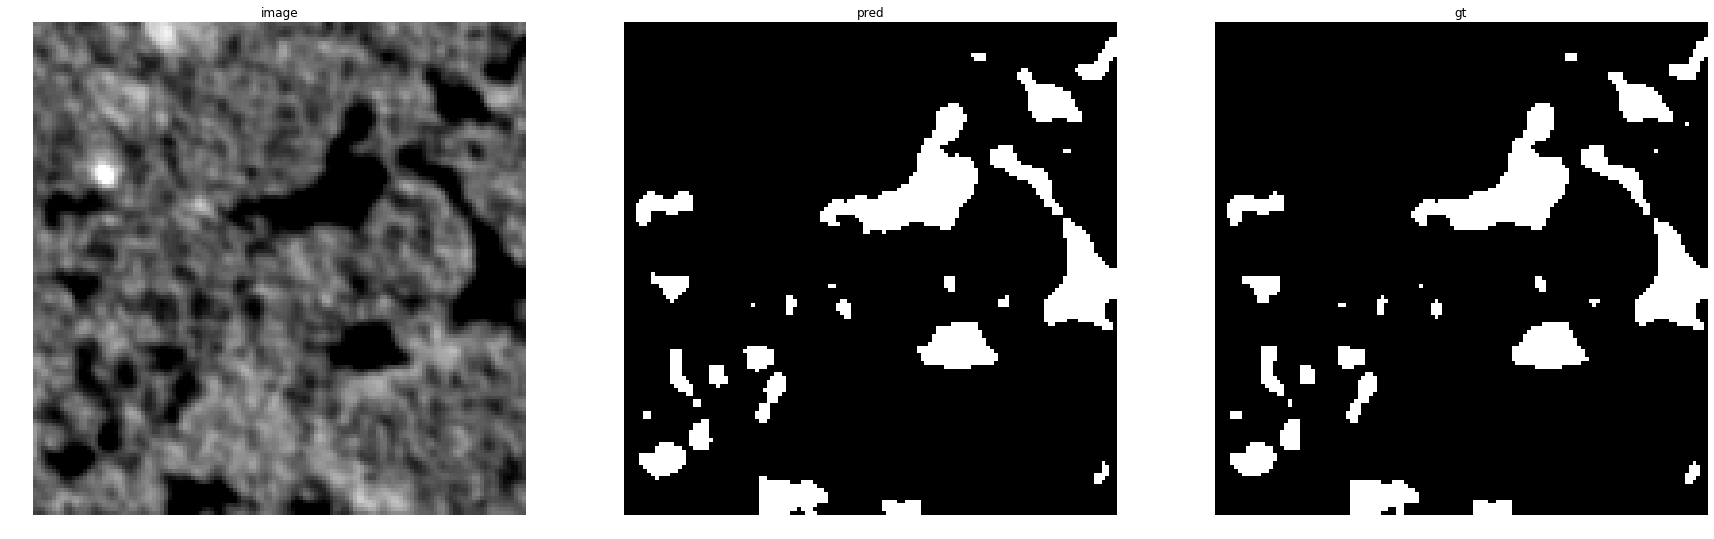

accuracy    : 0.99322509765625
precision   : 0.9574140584915342
recall      : 0.9852164730728616
f1          : 0.9711163153786104
pr_auc      : 0.9981277244606362
iou         : 0.9438543247344461


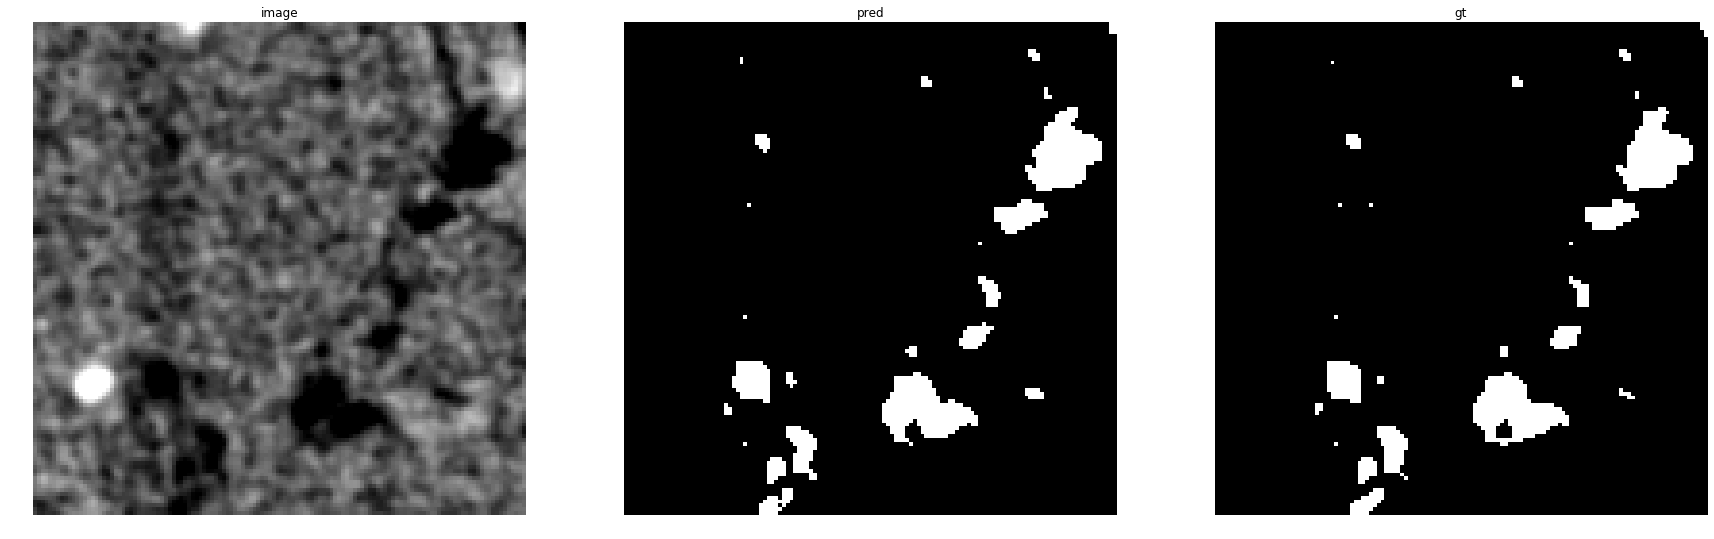

accuracy    : 0.99493408203125
precision   : 0.943064182194617
recall      : 0.9701810436634718
f1          : 0.9564304461942257
pr_auc      : 0.9945999724606277
iou         : 0.9164989939637826


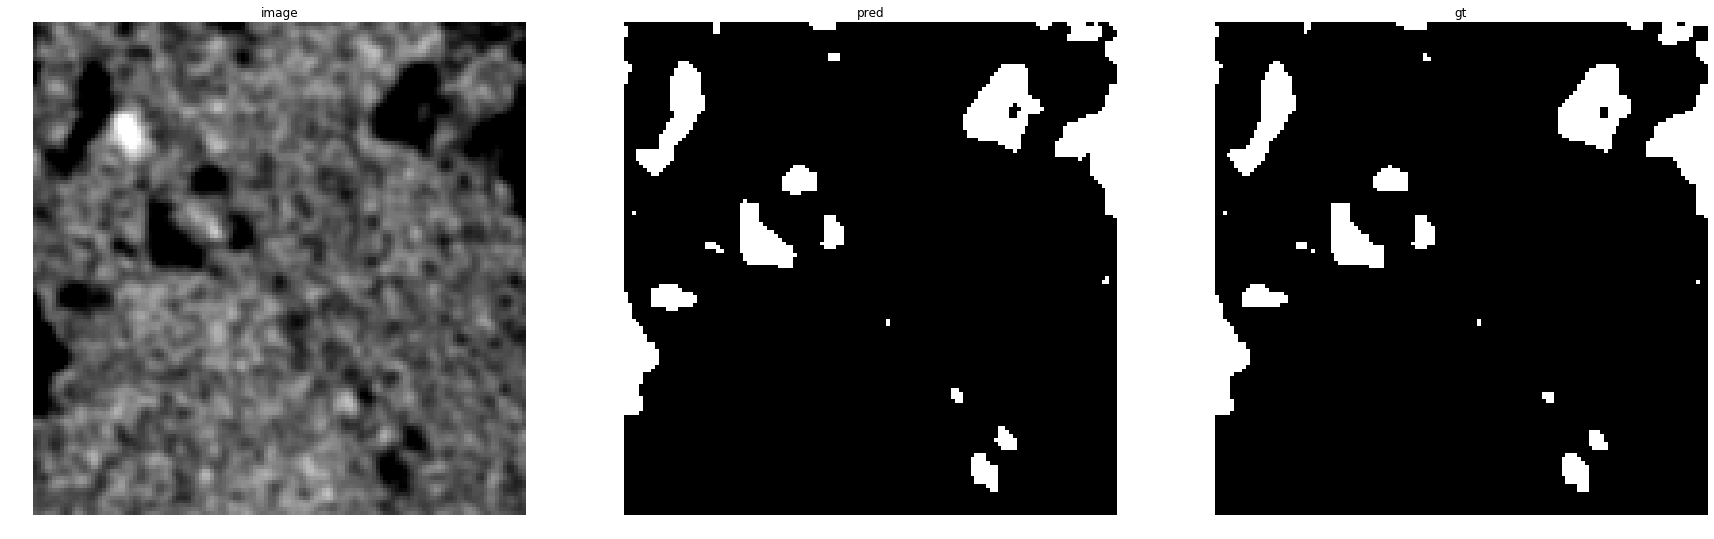

accuracy    : 0.994384765625
precision   : 0.956397426733381
recall      : 0.9773557341124909
f1          : 0.9667630057803468
pr_auc      : 0.9971685506148117
iou         : 0.9356643356643357


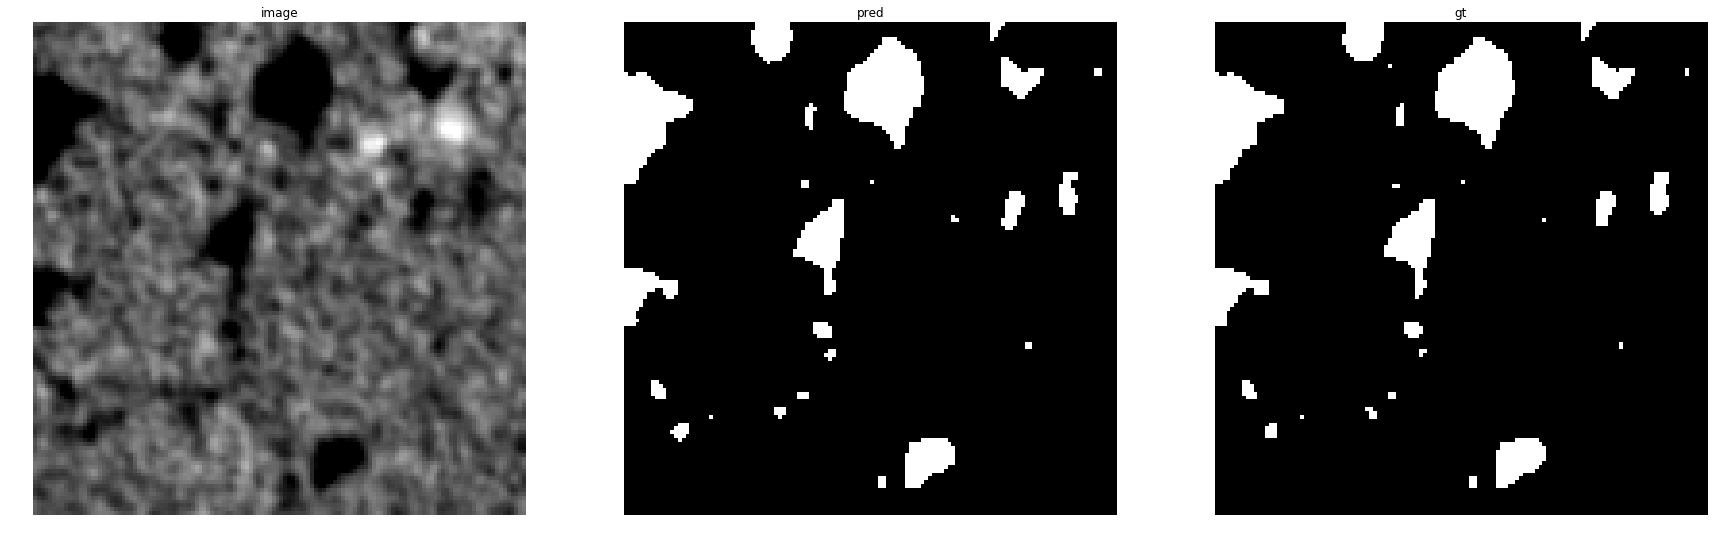

accuracy    : 0.99542236328125
precision   : 0.9655898876404494
recall      : 0.9814418272662384
f1          : 0.9734513274336284
pr_auc      : 0.998120158672914
iou         : 0.9482758620689655


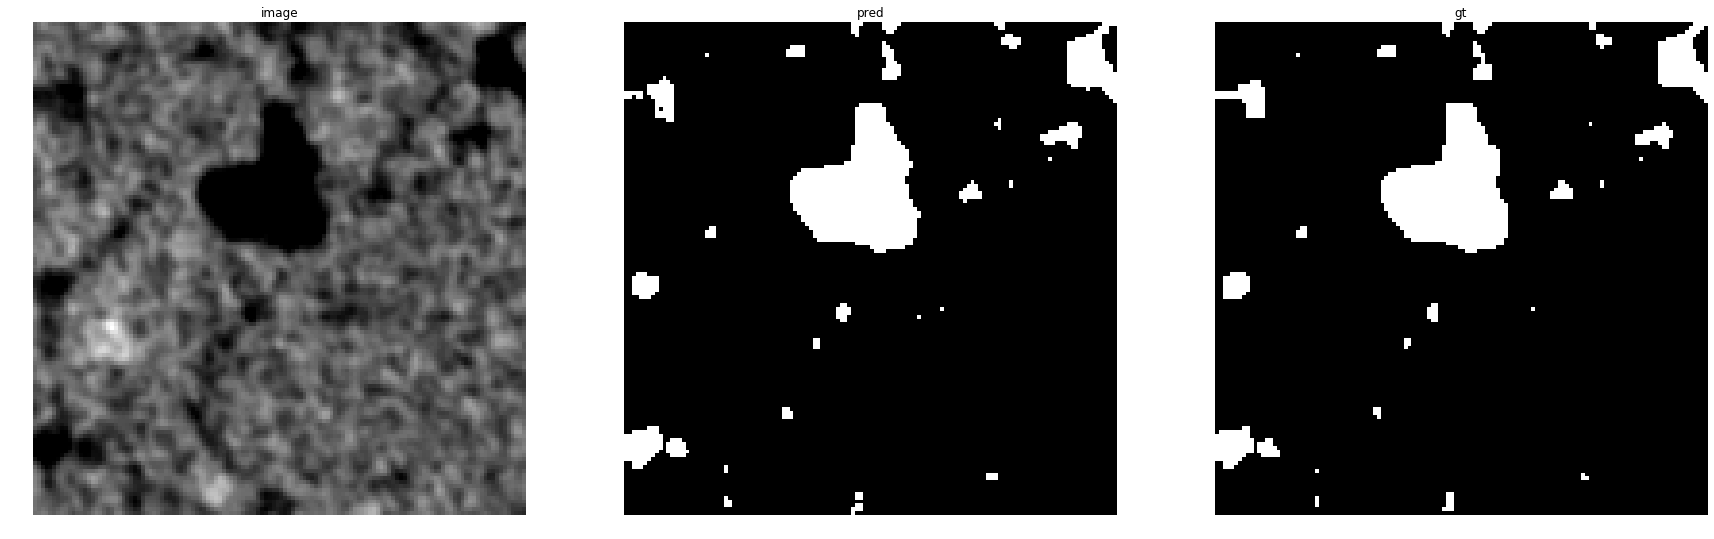

accuracy    : 0.9952392578125
precision   : 0.9633357296908699
recall      : 0.9802487198244331
f1          : 0.971718636693256
pr_auc      : 0.9977707561982093
iou         : 0.9449929478138223


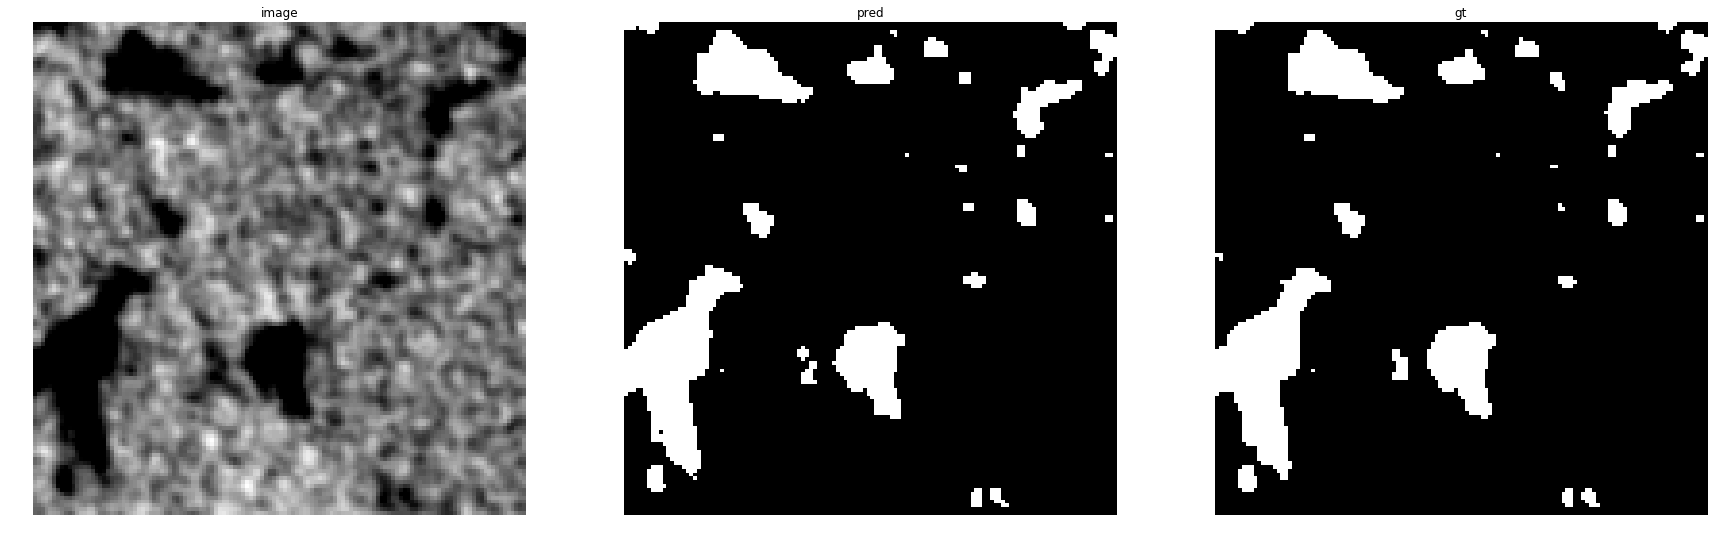

accuracy    : 0.9930419921875
precision   : 0.9640365002683843
recall      : 0.9744981009224091
f1          : 0.9692390717754992
pr_auc      : 0.9970606858702465
iou         : 0.9403141361256544


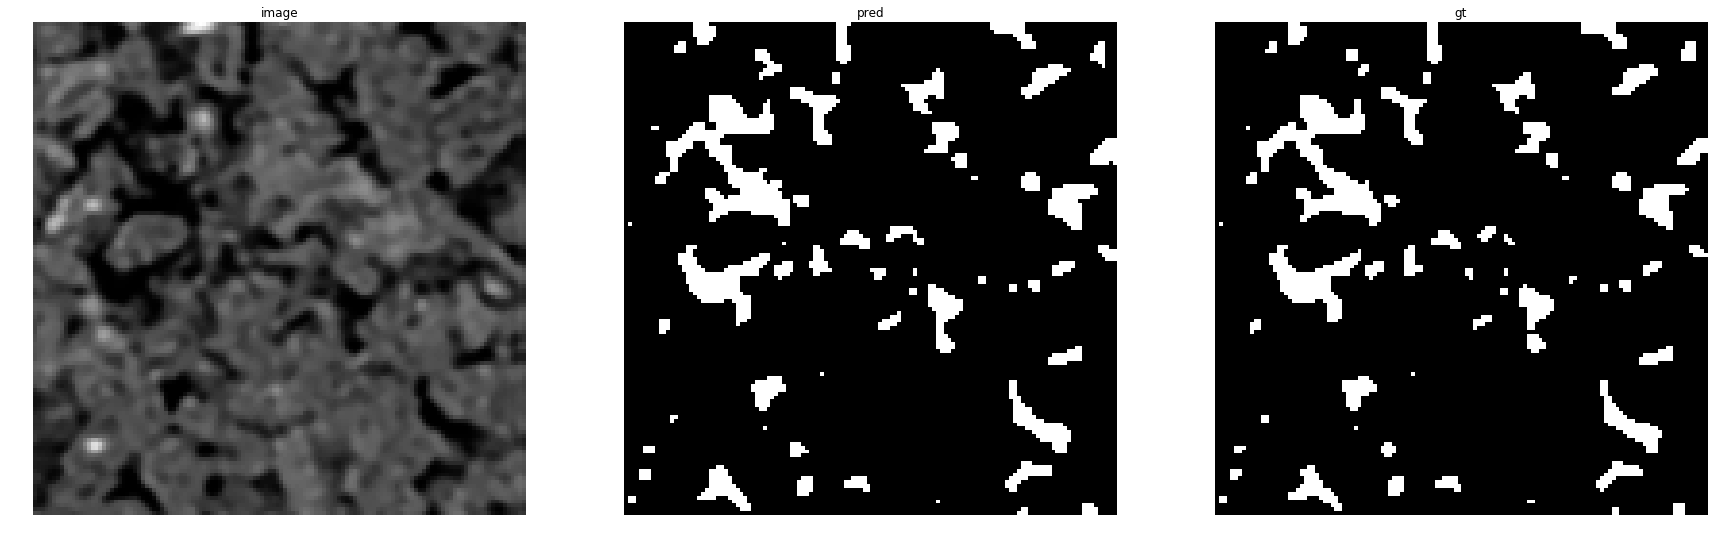

accuracy    : 0.9893798828125
precision   : 0.9166221272047034
recall      : 0.9896133871898442
f1          : 0.9517203107658158
pr_auc      : 0.9948373206962252
iou         : 0.9078877713075701


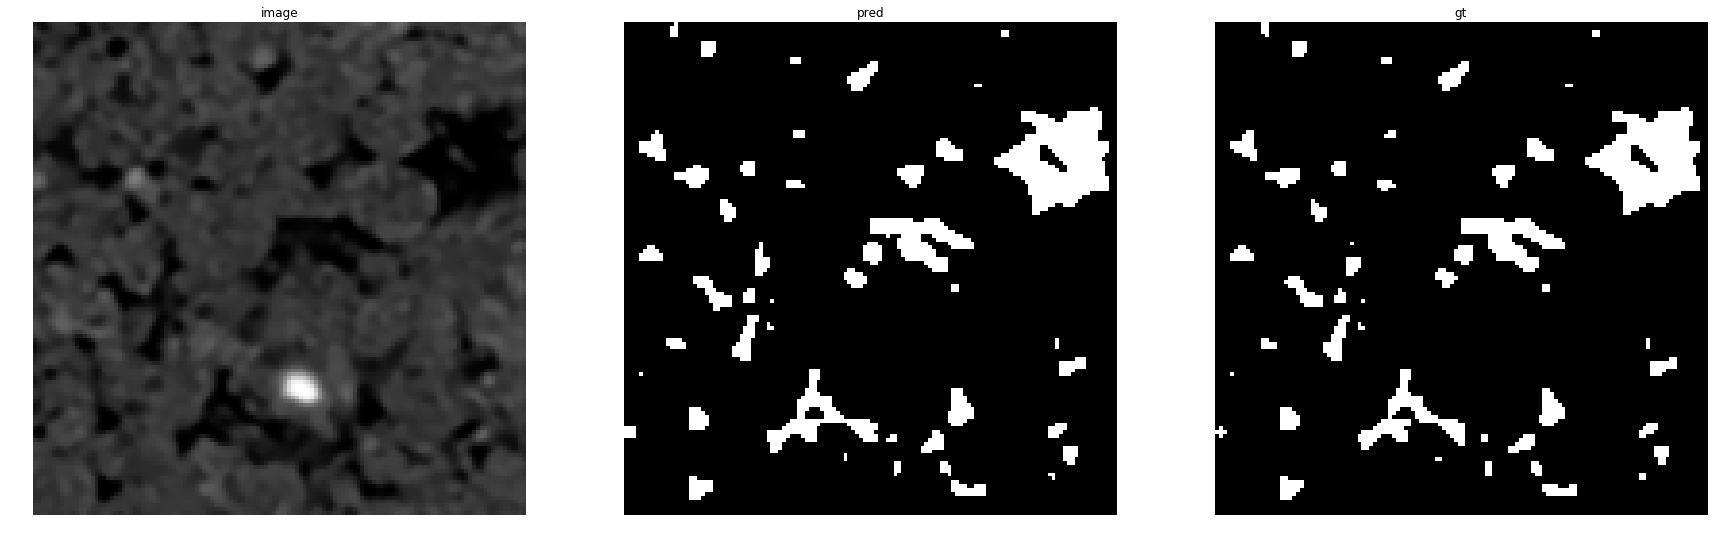

accuracy    : 0.9940185546875
precision   : 0.9466145833333334
recall      : 0.9891156462585035
f1          : 0.9673985362608118
pr_auc      : 0.9967879410835314
iou         : 0.9368556701030928


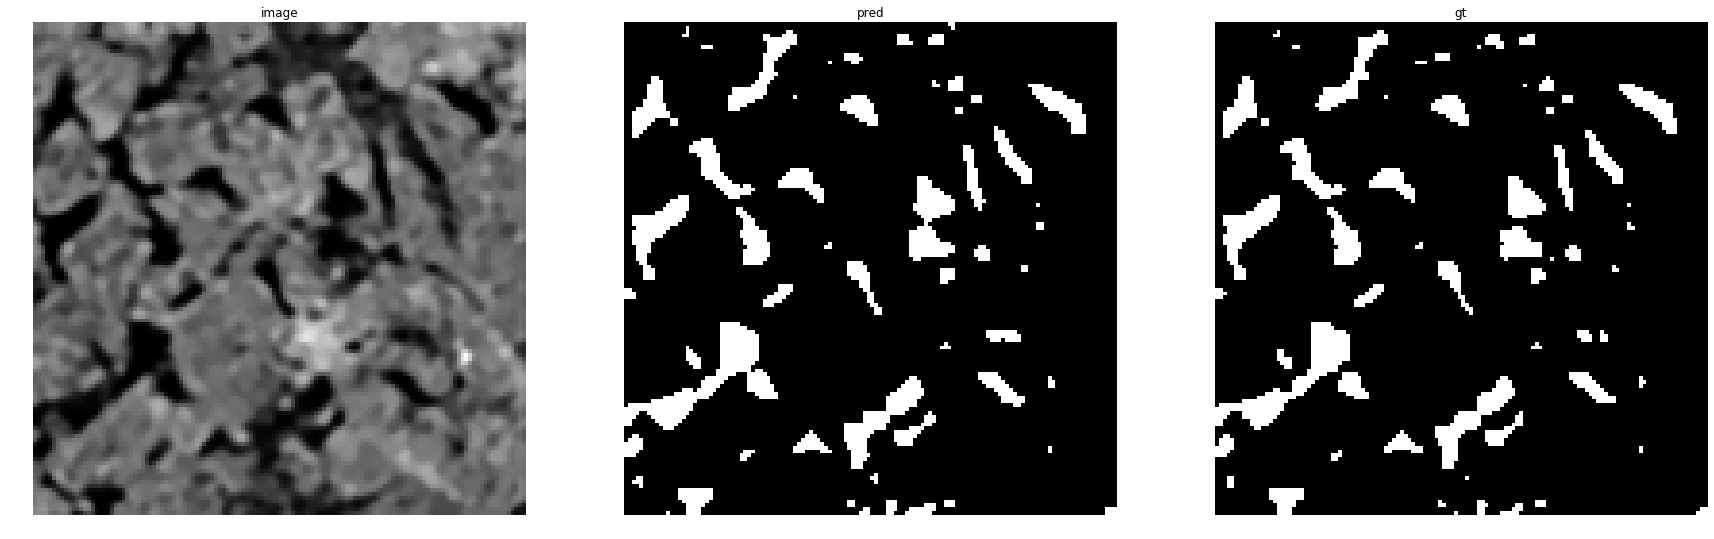

accuracy    : 0.9908447265625
precision   : 0.9301587301587302
recall      : 0.9898648648648649
f1          : 0.9590834697217676
pr_auc      : 0.9965828142710854
iou         : 0.9213836477987422


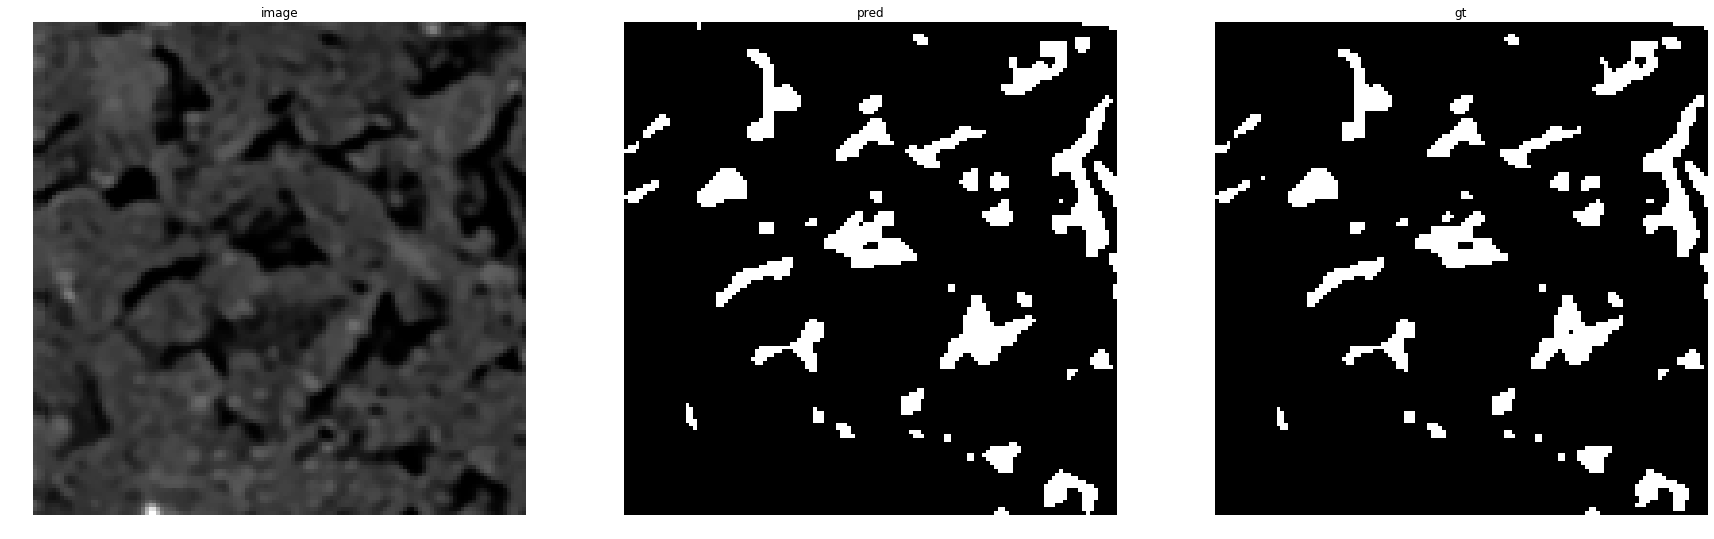

accuracy    : 0.99176025390625
precision   : 0.9400871459694989
recall      : 0.9857224443175329
f1          : 0.9623640925564538
pr_auc      : 0.9968314792042106
iou         : 0.9274583557227297


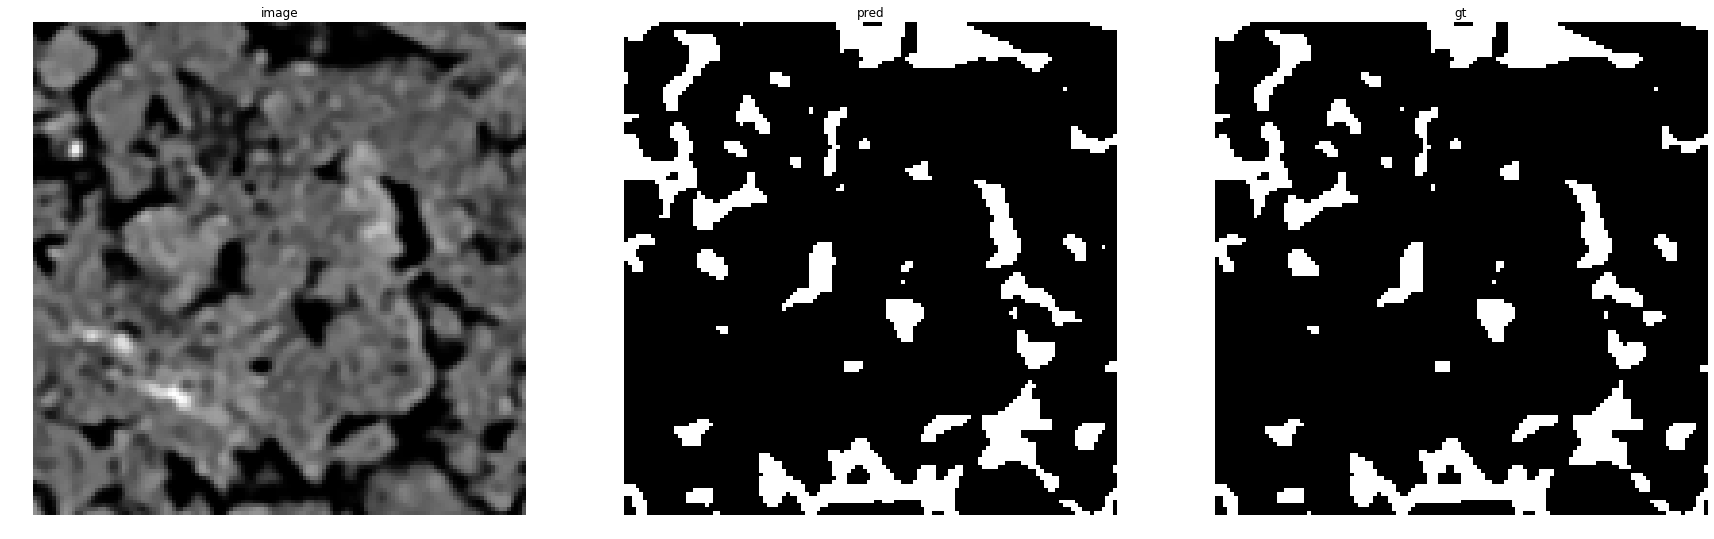

accuracy    : 0.9915771484375
precision   : 0.9543782192788816
recall      : 0.9946319018404908
f1          : 0.9740893728877207
pr_auc      : 0.9985025459679981
iou         : 0.9494875549048316


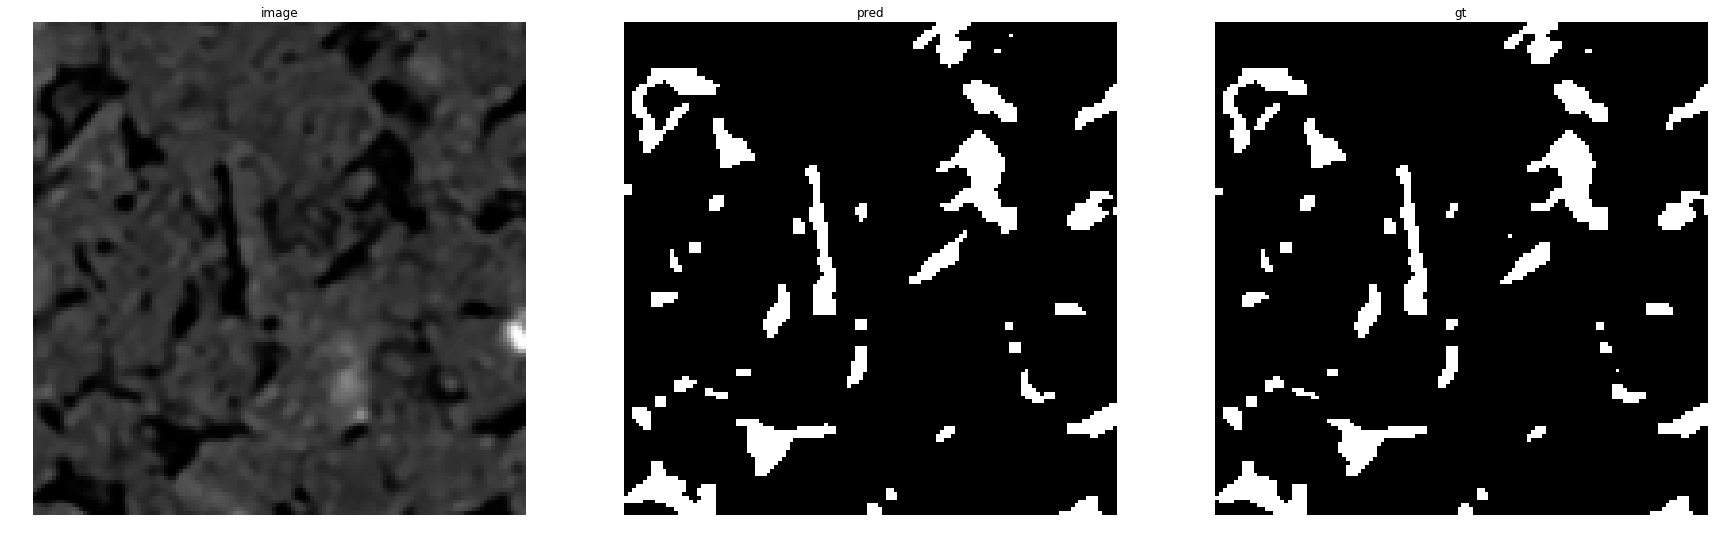

accuracy    : 0.99298095703125
precision   : 0.9449438202247191
recall      : 0.9899941141848146
f1          : 0.9669445242885887
pr_auc      : 0.9975662825557452
iou         : 0.9360044518642181


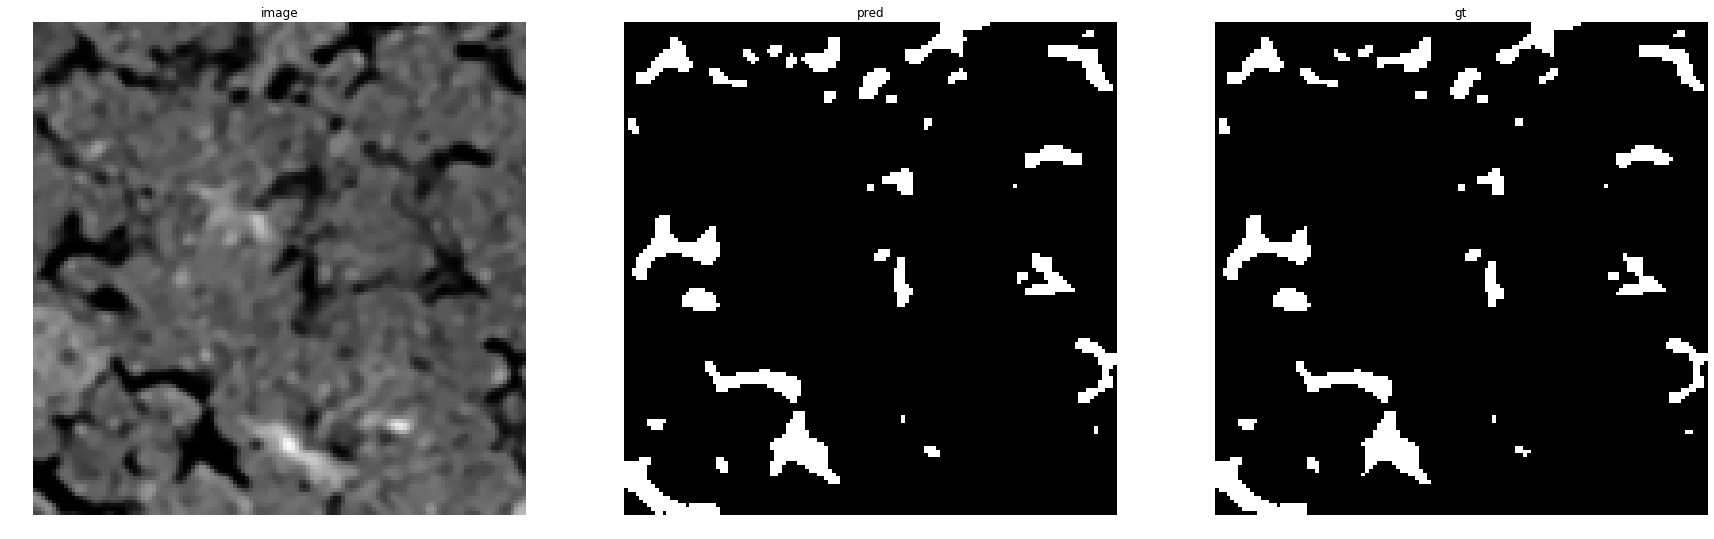

accuracy    : 0.99420166015625
precision   : 0.9379615952732644
recall      : 0.9914129586260734
f1          : 0.9639468690702088
pr_auc      : 0.9970779342971064
iou         : 0.9304029304029304


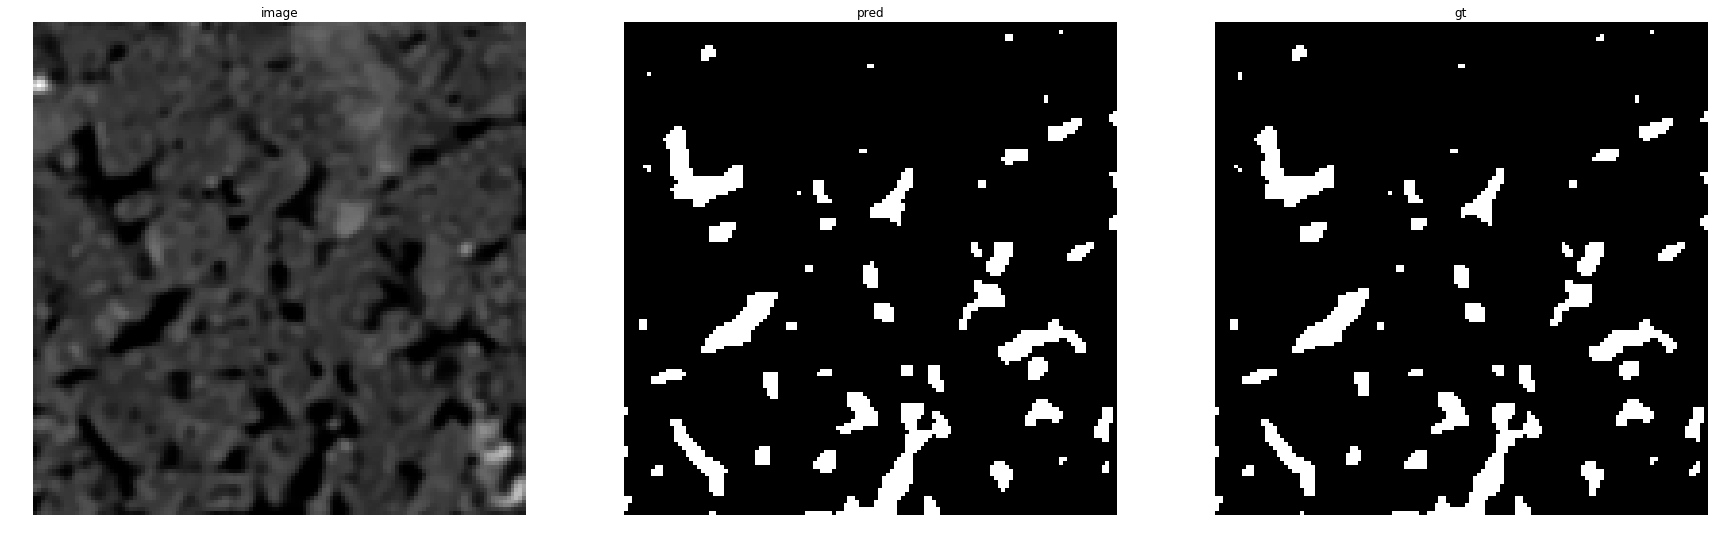

accuracy    : 0.99371337890625
precision   : 0.9455737704918032
recall      : 0.9863201094391245
f1          : 0.9655172413793103
pr_auc      : 0.9962807609998493
iou         : 0.9333333333333333


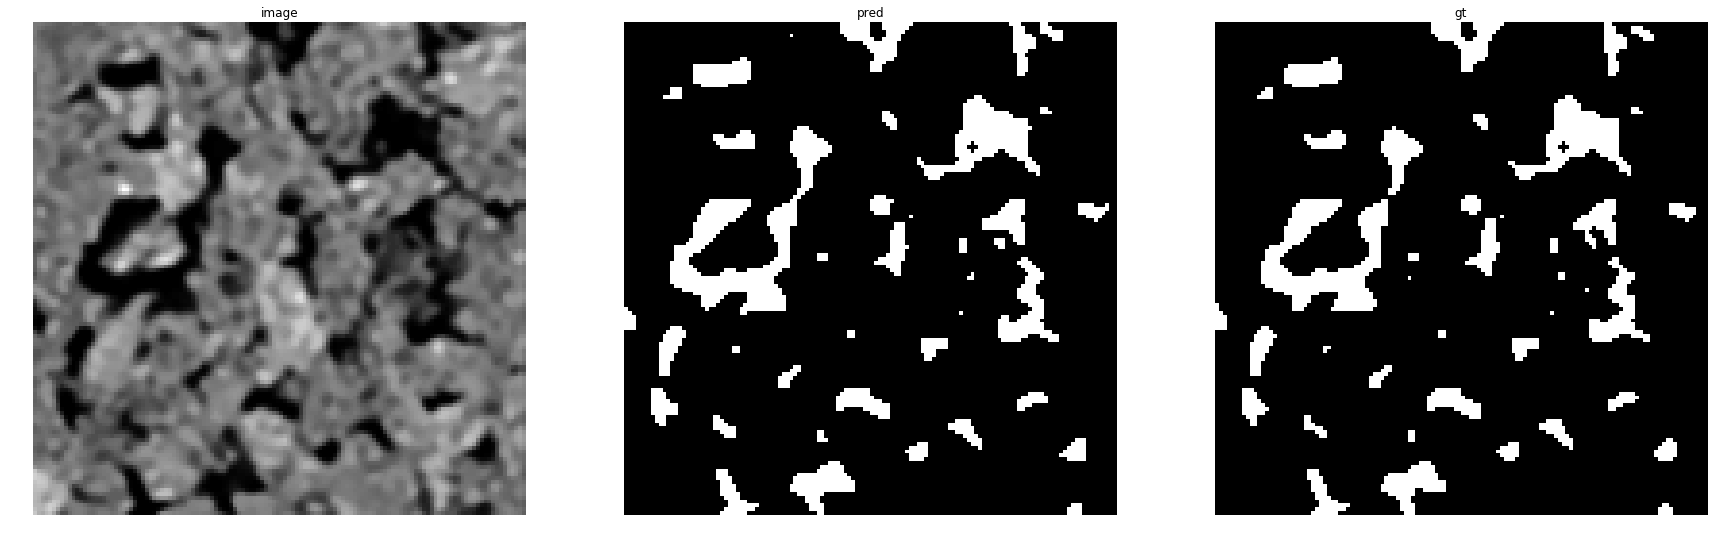

accuracy    : 0.993408203125
precision   : 0.9581550166428912
recall      : 0.9901719901719902
f1          : 0.9739004349927501
pr_auc      : 0.998047191361981
iou         : 0.9491285916156382


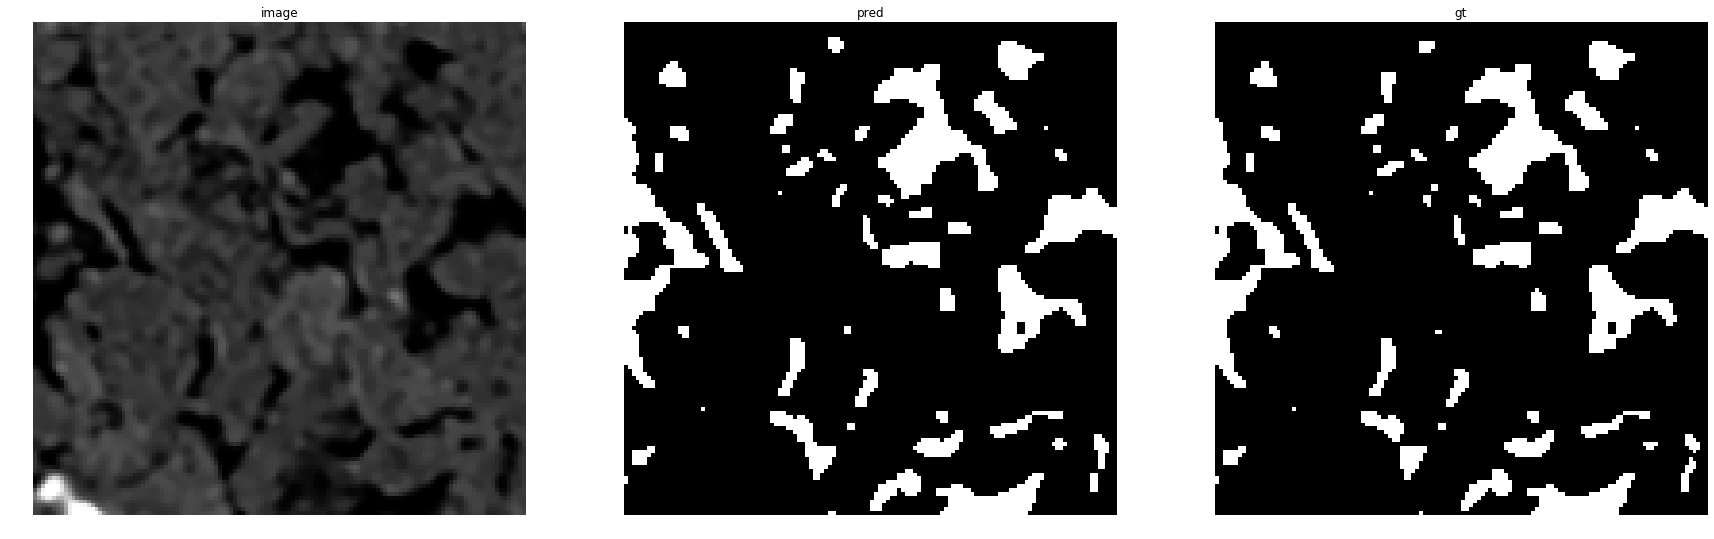

accuracy    : 0.99273681640625
precision   : 0.9586809694080254
recall      : 0.9938220757825371
f1          : 0.9759352881698685
pr_auc      : 0.9983353393139485
iou         : 0.9530015797788309


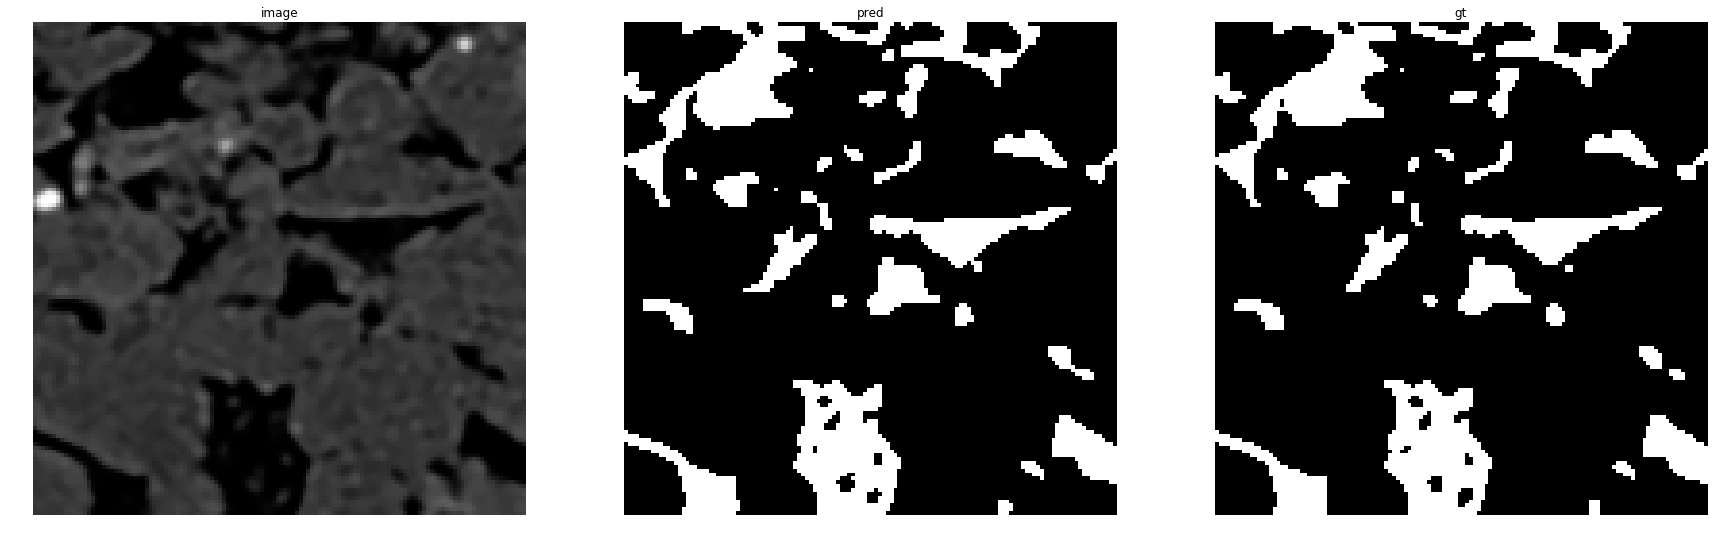

accuracy    : 0.99017333984375
precision   : 0.9644557283402094
recall      : 0.9841321243523317
f1          : 0.9741945824651387
pr_auc      : 0.9981535273709681
iou         : 0.9496875


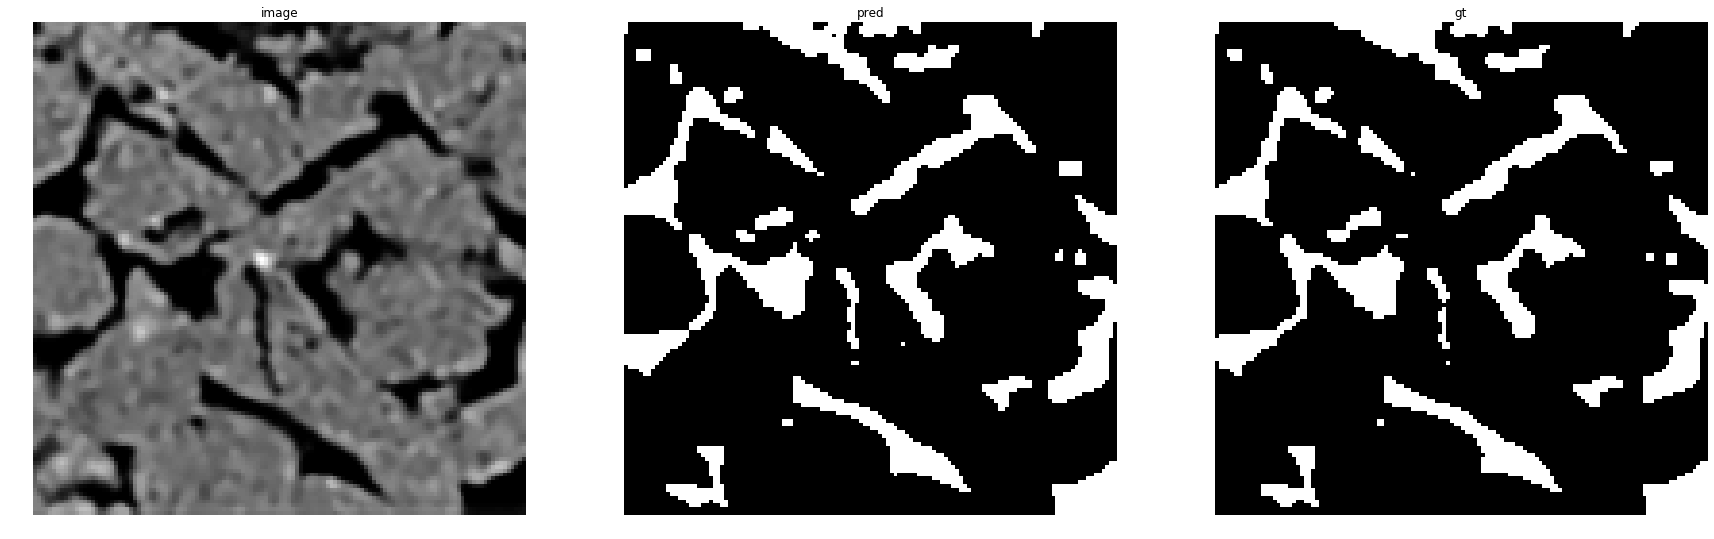

accuracy    : 0.9906005859375
precision   : 0.9616182572614108
recall      : 0.9847733711048159
f1          : 0.9730580825752273
pr_auc      : 0.9980859948022036
iou         : 0.9475298126064736


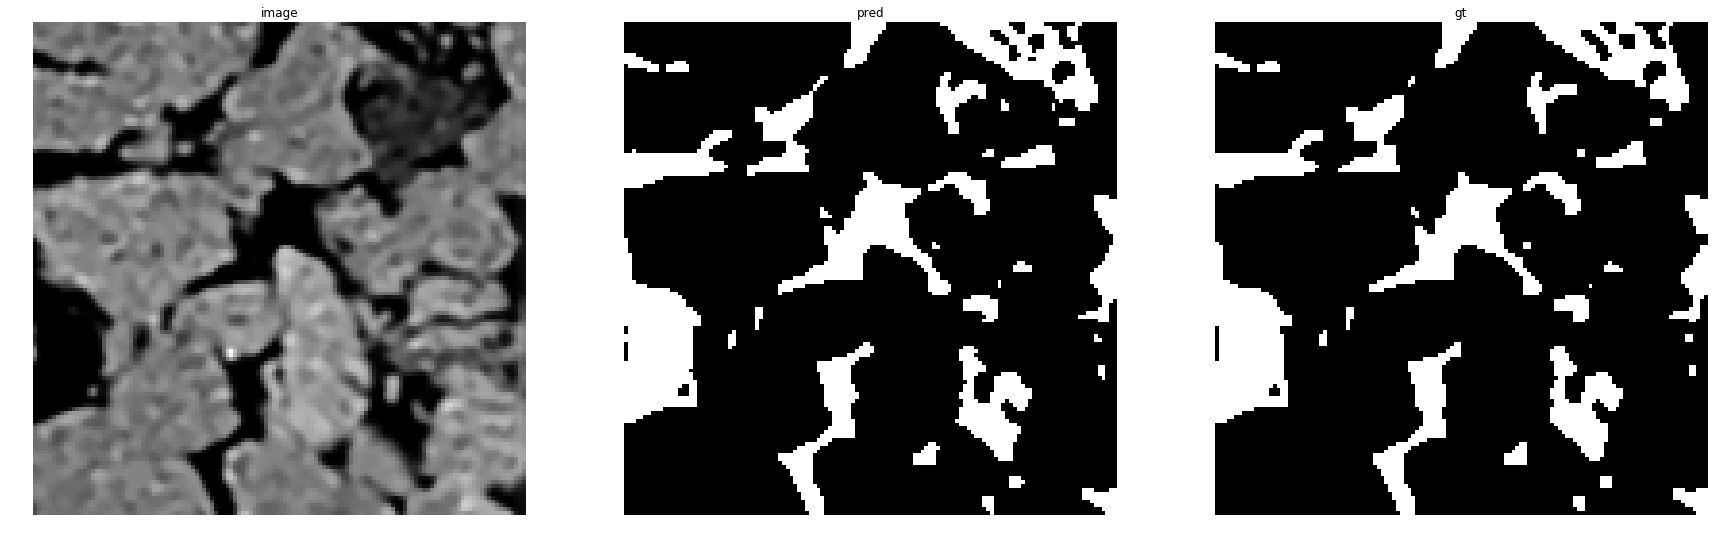

accuracy    : 0.99053955078125
precision   : 0.9618467457518436
recall      : 0.9881422924901185
f1          : 0.974817221770918
pr_auc      : 0.9983534307626856
iou         : 0.9508716323296355


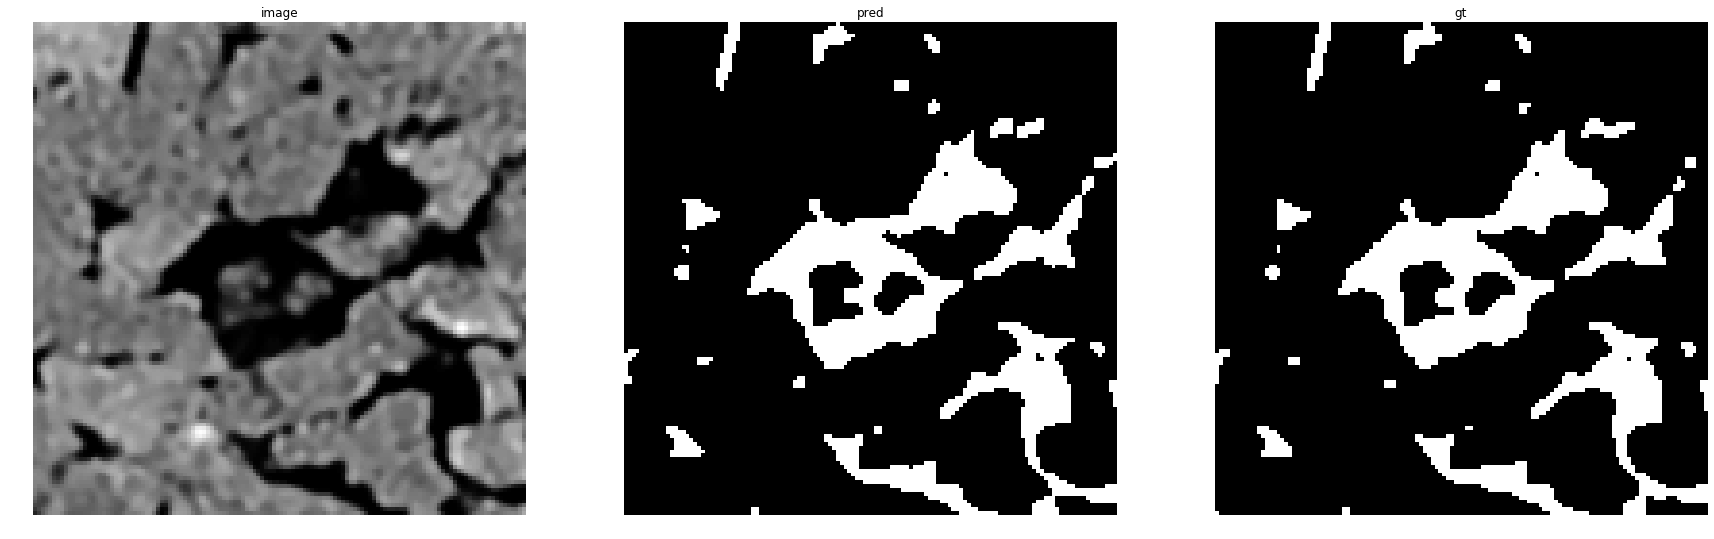

accuracy    : 0.99200439453125
precision   : 0.9731827805222301
recall      : 0.9804479203697121
f1          : 0.9768018416858508
pr_auc      : 0.9984712682278362
iou         : 0.9546555901696089


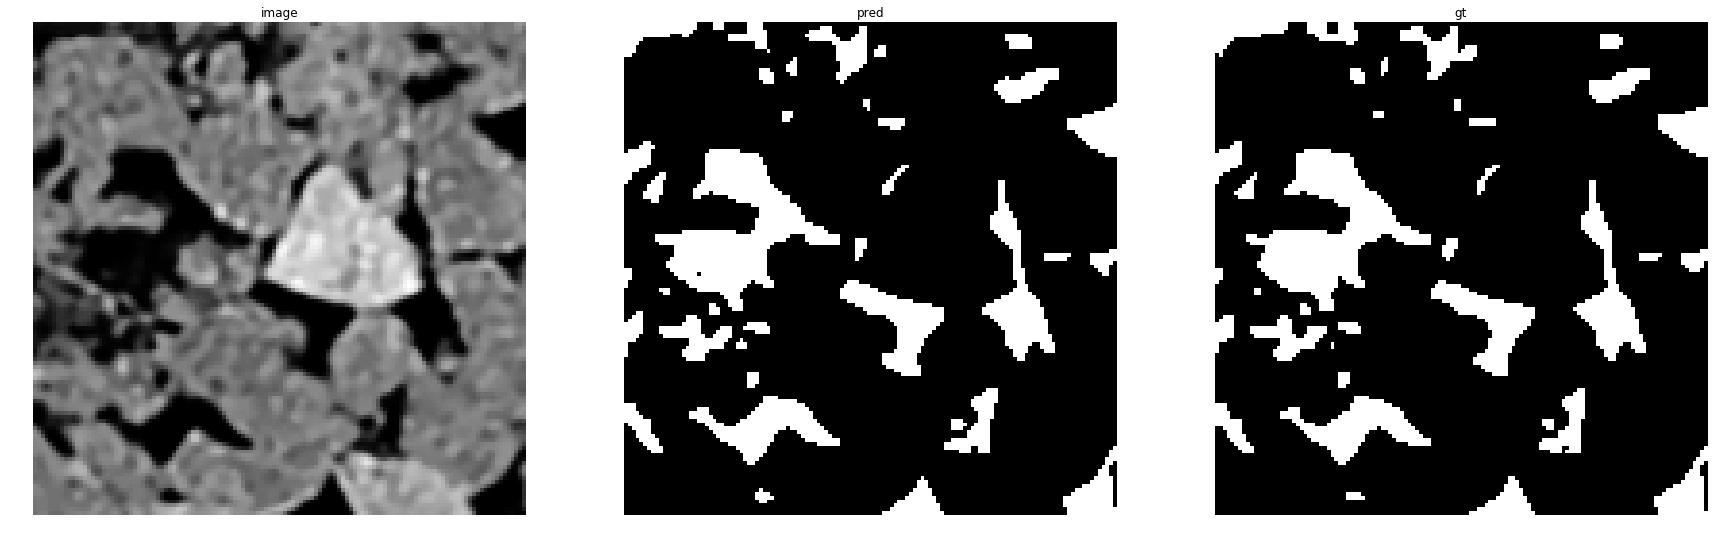

accuracy    : 0.98968505859375
precision   : 0.9595818815331011
recall      : 0.98111863199145
f1          : 0.9702307556808174
pr_auc      : 0.9977976527374957
iou         : 0.9421826890181321


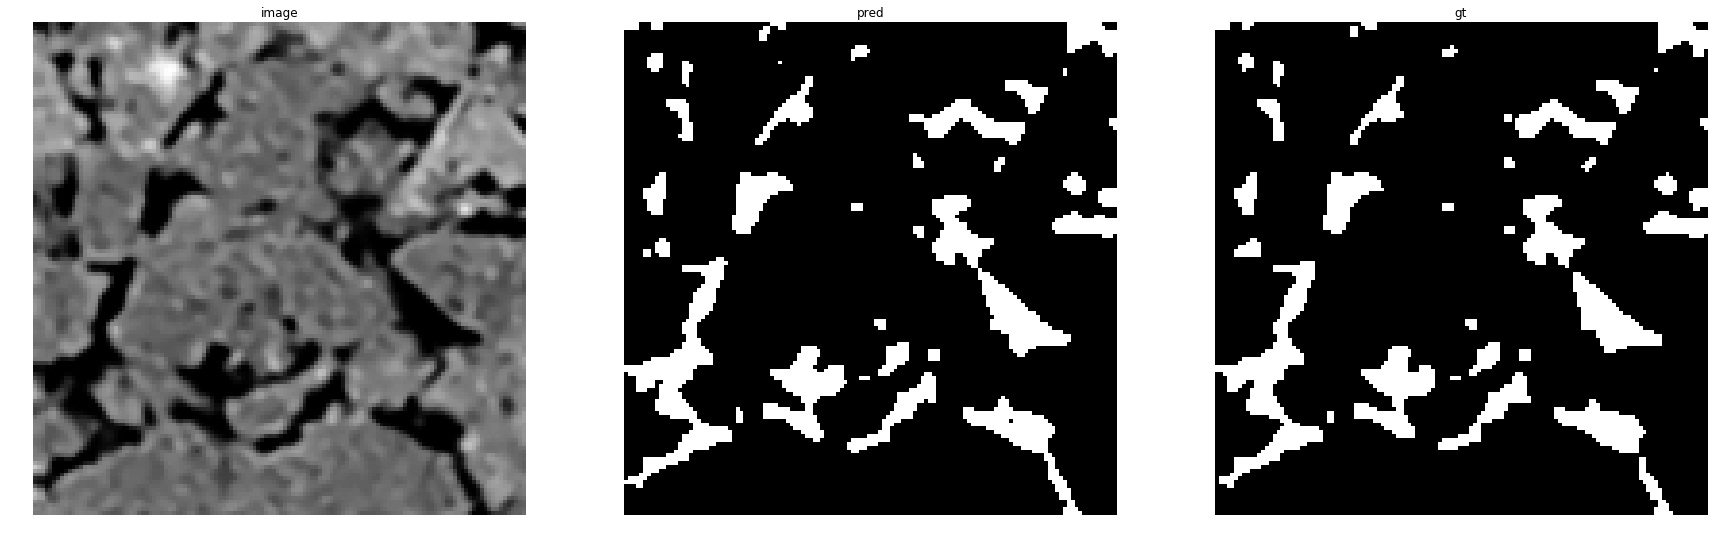

accuracy    : 0.9906005859375
precision   : 0.9552047781569966
recall      : 0.978583916083916
f1          : 0.9667530224525043
pr_auc      : 0.9973257569094661
iou         : 0.9356456330965316


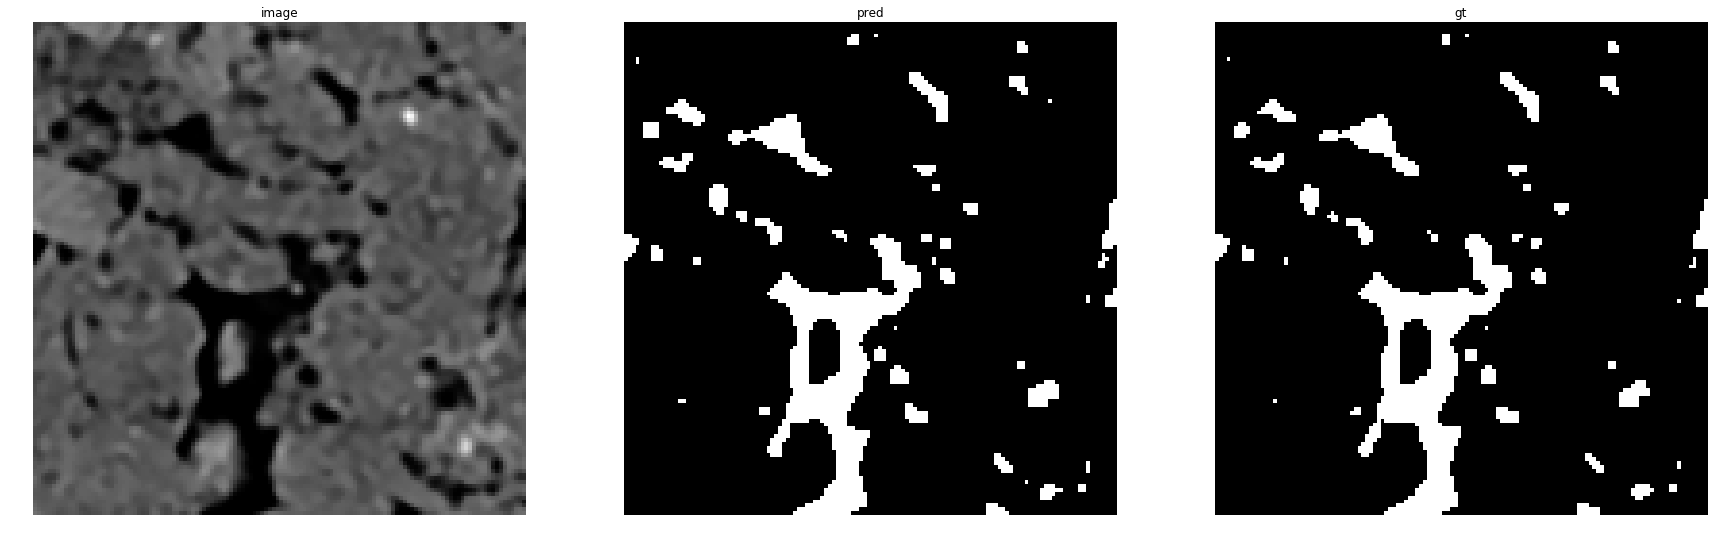

accuracy    : 0.9930419921875
precision   : 0.947935368043088
recall      : 0.9832402234636871
f1          : 0.9652650822669103
pr_auc      : 0.9974181362456884
iou         : 0.9328621908127208


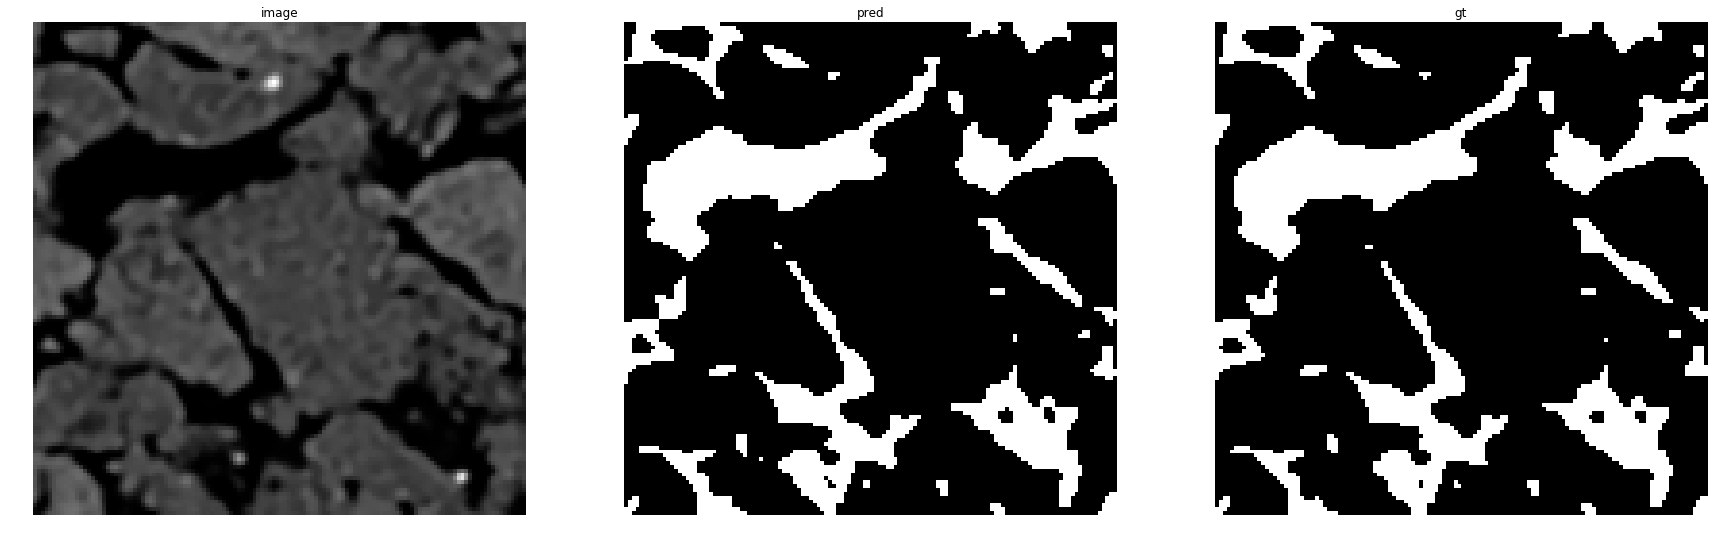

accuracy    : 0.99041748046875
precision   : 0.9724064738657469
recall      : 0.9857450242065626
f1          : 0.9790303192199812
pr_auc      : 0.9988929743185143
iou         : 0.9589220303506018


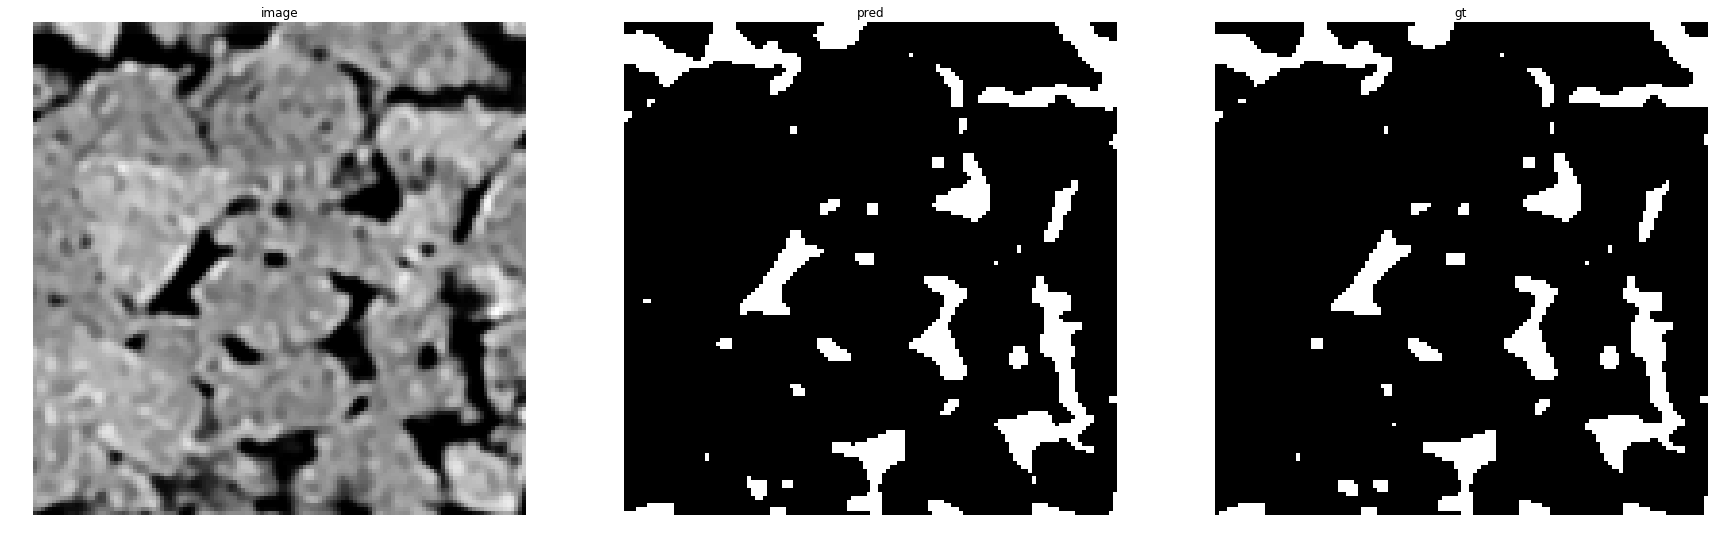

accuracy    : 0.9913330078125
precision   : 0.9547325102880658
recall      : 0.979821679962459
f1          : 0.967114404817045
pr_auc      : 0.9974760200352191
iou         : 0.9363228699551569


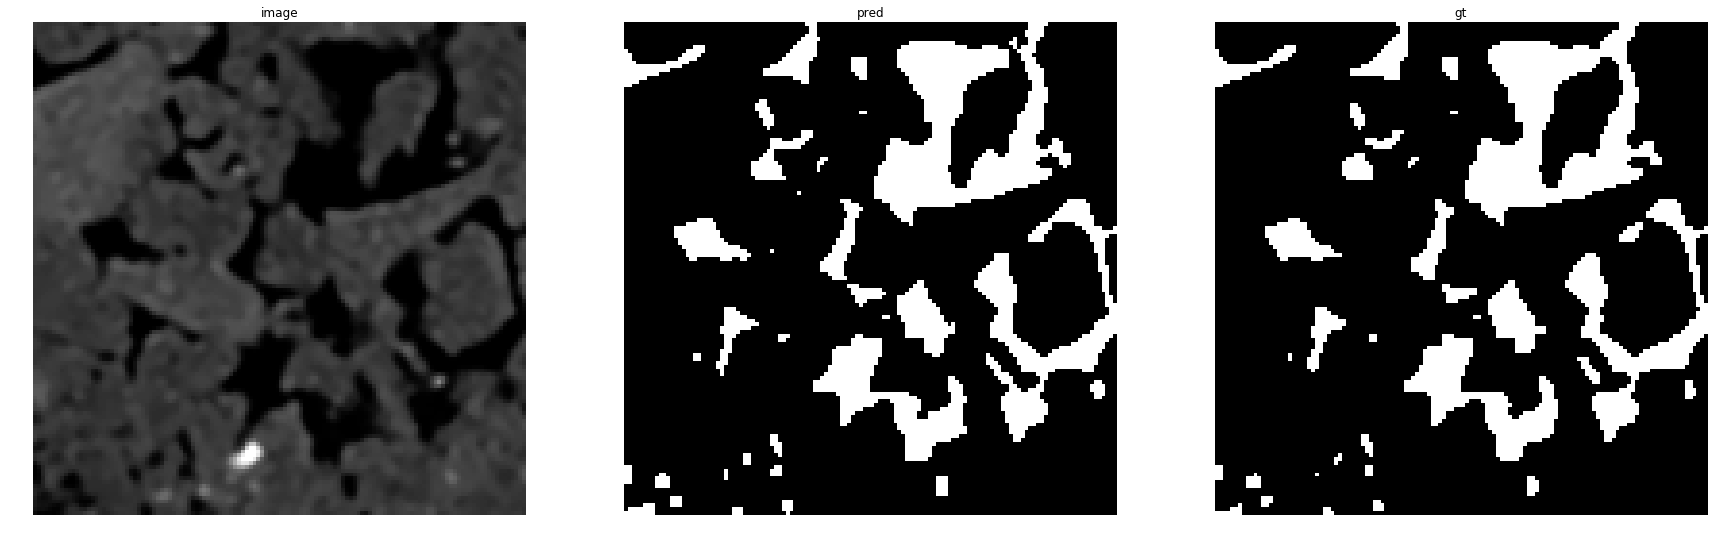

accuracy    : 0.988525390625
precision   : 0.959720900729464
recall      : 0.9802397149335925
f1          : 0.9698717948717949
pr_auc      : 0.9977000790538125
iou         : 0.9415059116365899


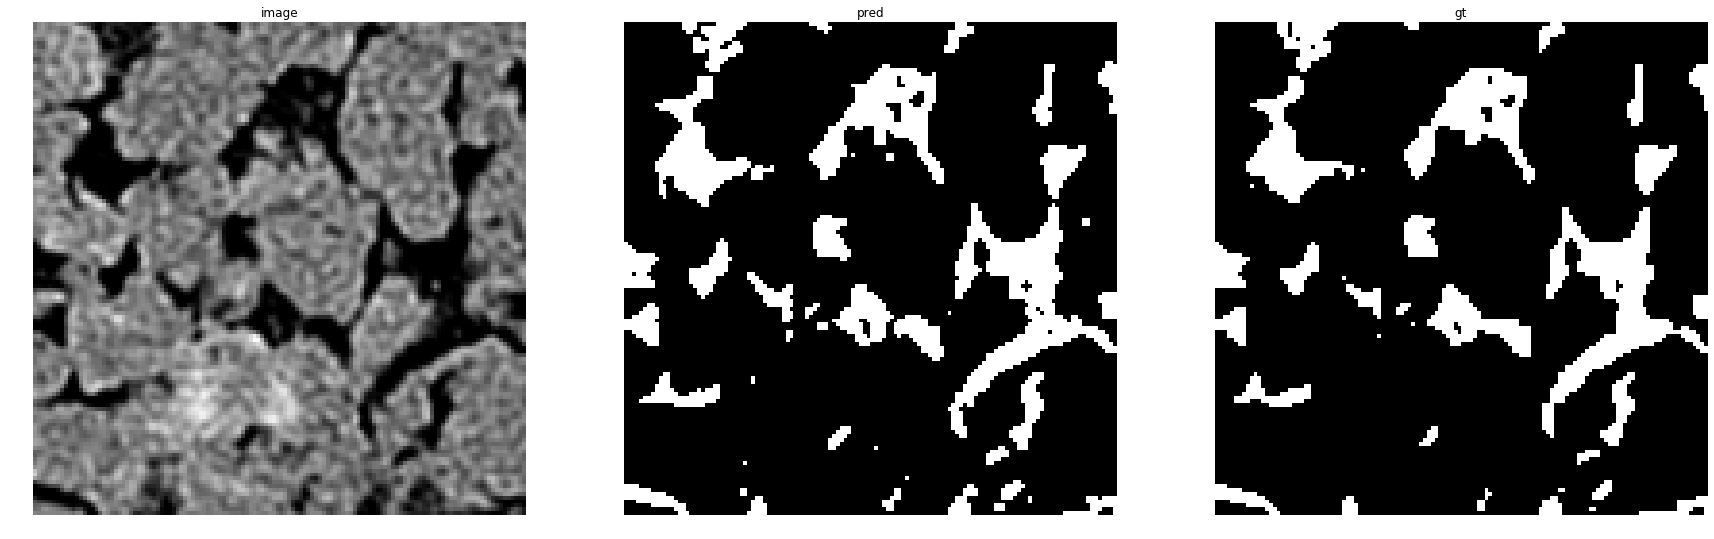

accuracy    : 0.97564697265625
precision   : 0.8882373232149017
recall      : 0.9716981132075472
f1          : 0.9280951522796901
pr_auc      : 0.9902367884254245
iou         : 0.8658372562205784


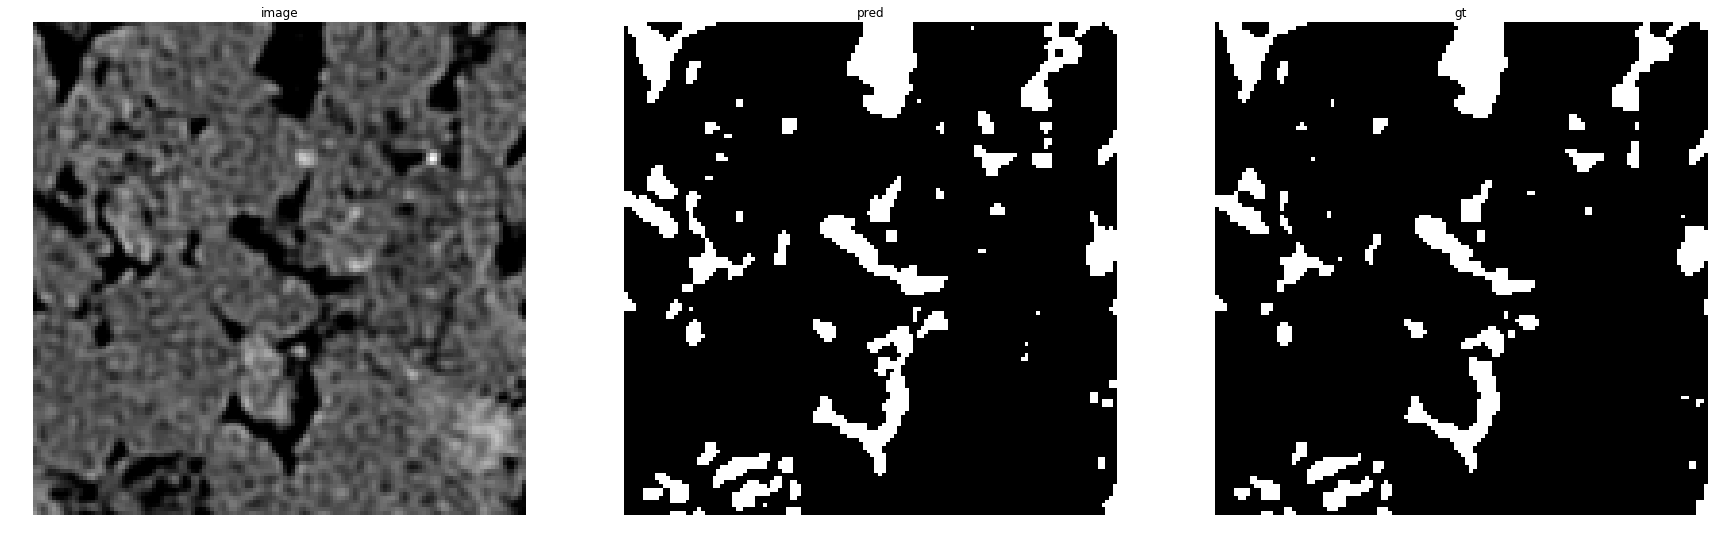

accuracy    : 0.9781494140625
precision   : 0.8498098859315589
recall      : 0.9770491803278688
f1          : 0.9089984748347737
pr_auc      : 0.9869723748715451
iou         : 0.8331780055917987


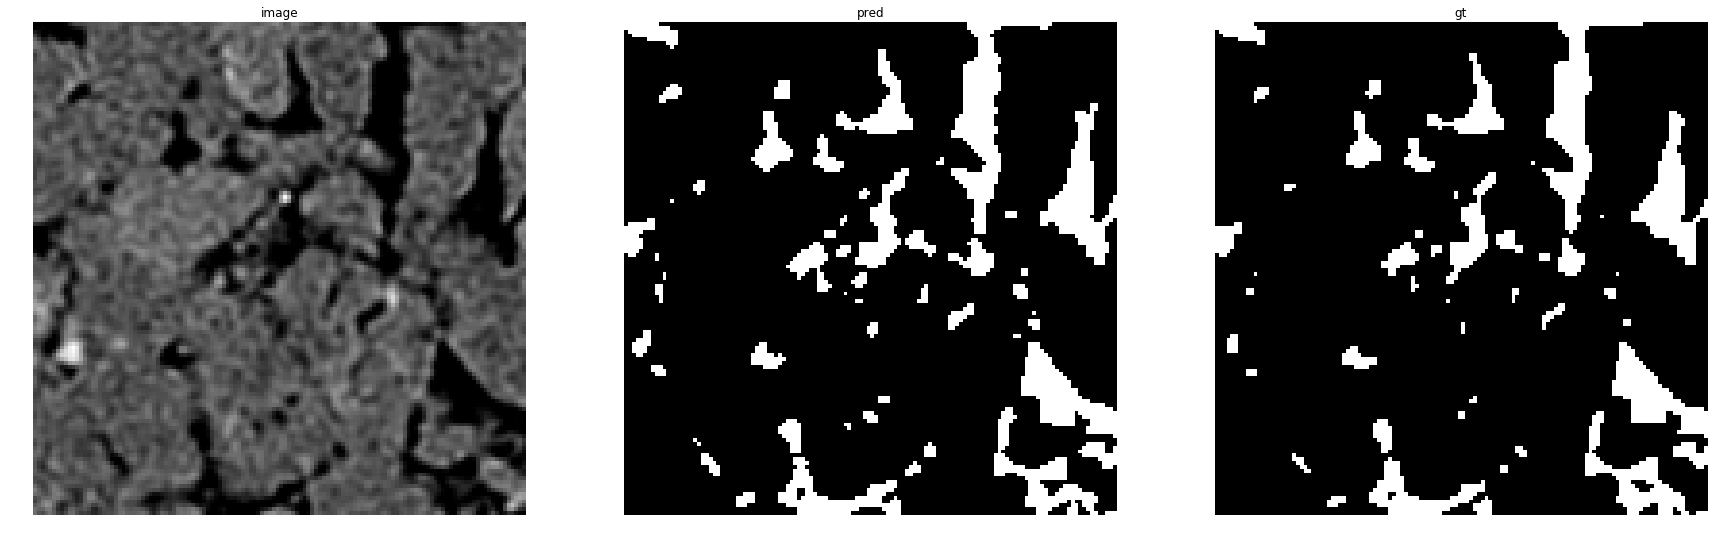

accuracy    : 0.9774169921875
precision   : 0.8683144246353323
recall      : 0.9794332723948812
f1          : 0.9205326460481099
pr_auc      : 0.989769876672691
iou         : 0.8527656187823319


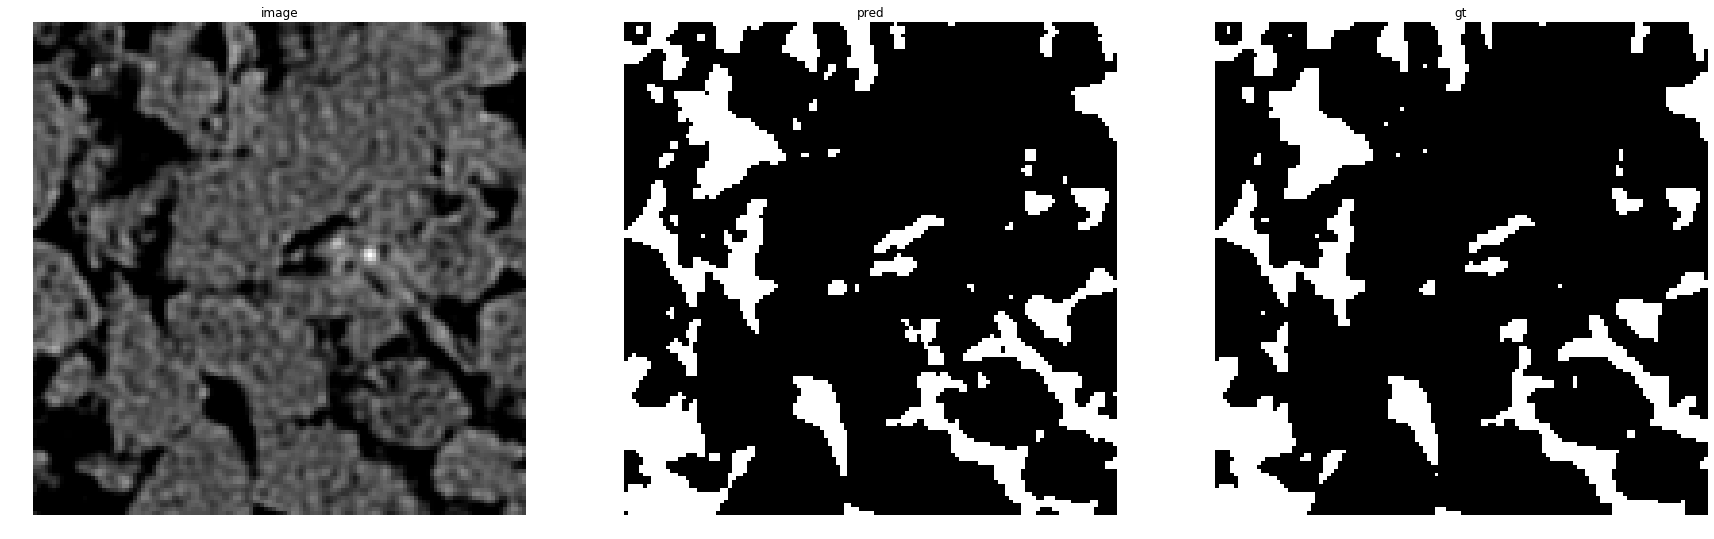

accuracy    : 0.97308349609375
precision   : 0.8964646464646465
recall      : 0.977961432506887
f1          : 0.9354413702239791
pr_auc      : 0.9923104112195303
iou         : 0.8787128712871287


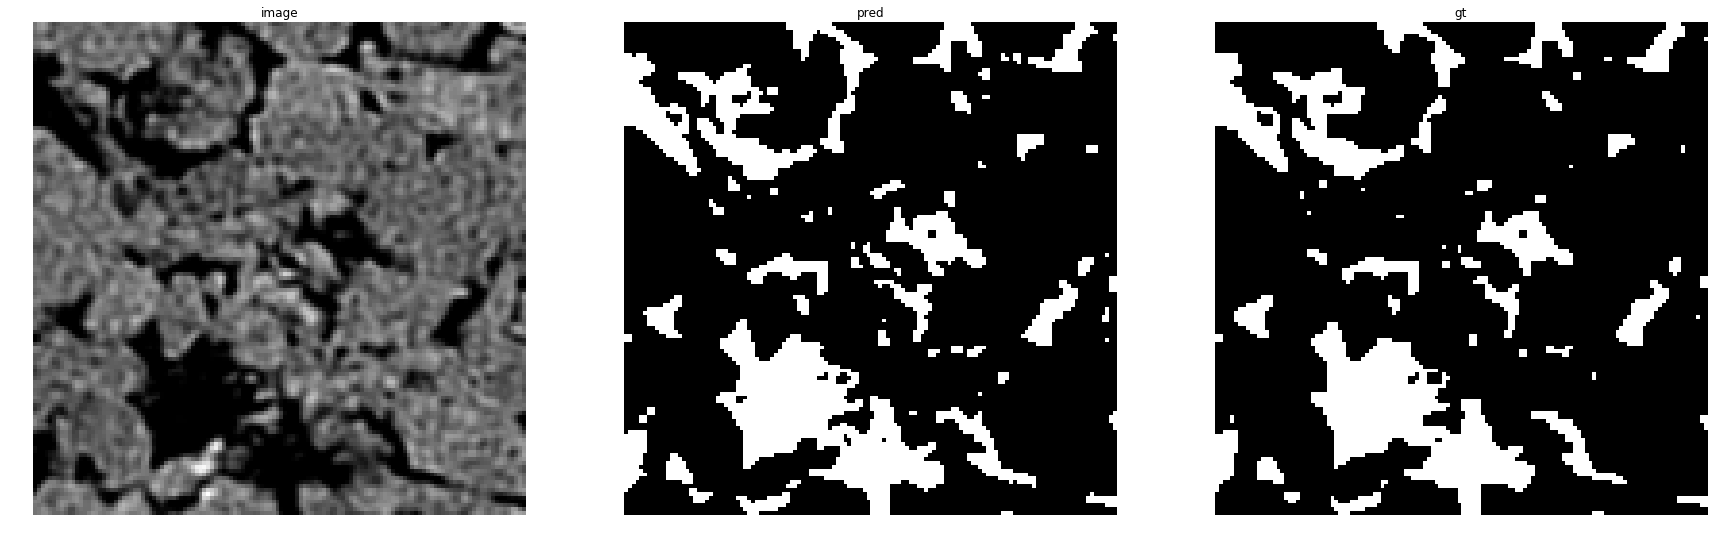

accuracy    : 0.9737548828125
precision   : 0.8973538819424252
recall      : 0.9756560227631995
f1          : 0.9348682217509845
pr_auc      : 0.9914890417474195
iou         : 0.8777019340159272


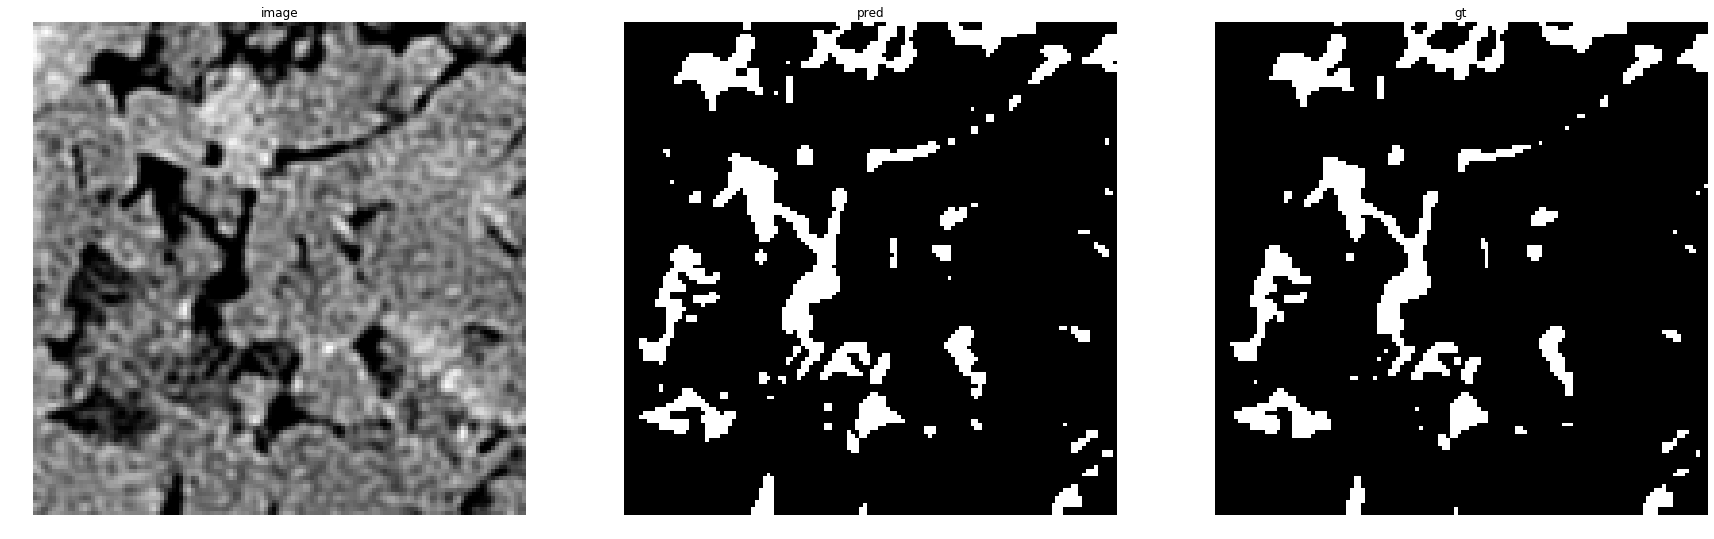

accuracy    : 0.9776611328125
precision   : 0.8596819457436857
recall      : 0.9653361344537815
f1          : 0.909450766947056
pr_auc      : 0.9811320890221499
iou         : 0.8339382940108893


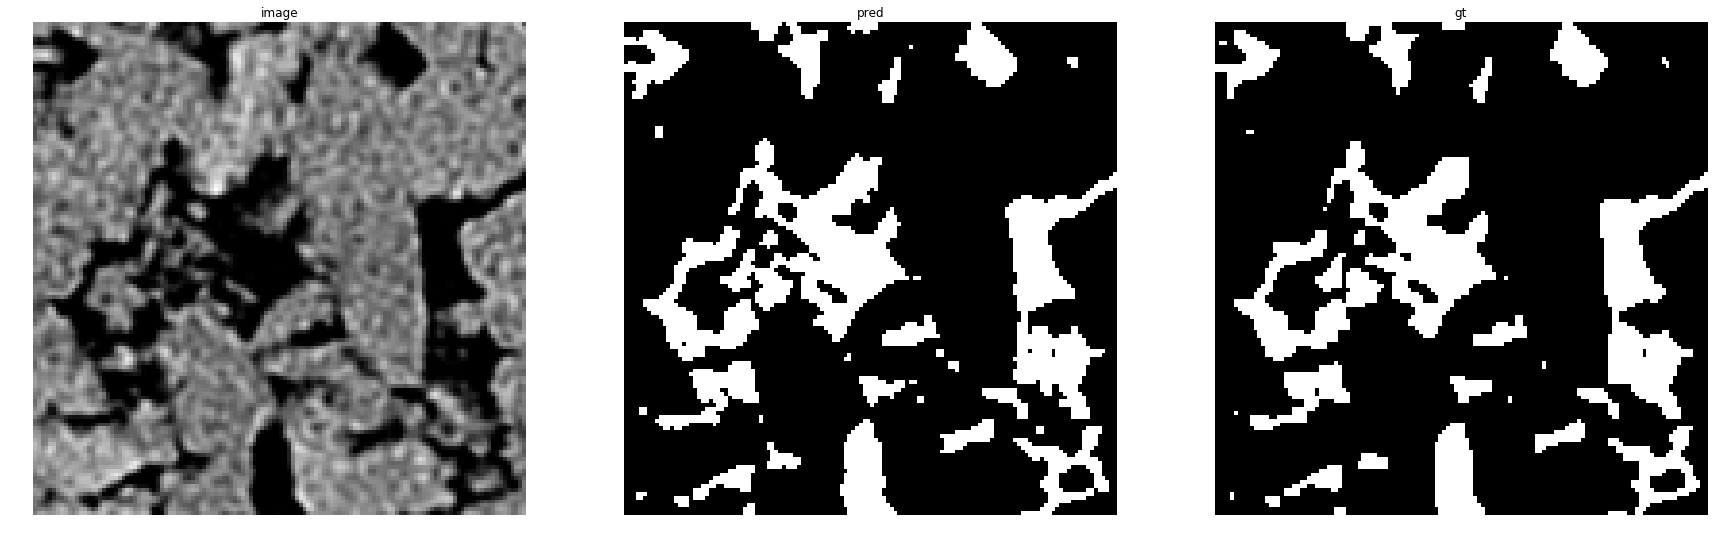

accuracy    : 0.97552490234375
precision   : 0.9140921409214092
recall      : 0.975701475267573
f1          : 0.9438925423254513
pr_auc      : 0.9926905542010175
iou         : 0.893746687864335


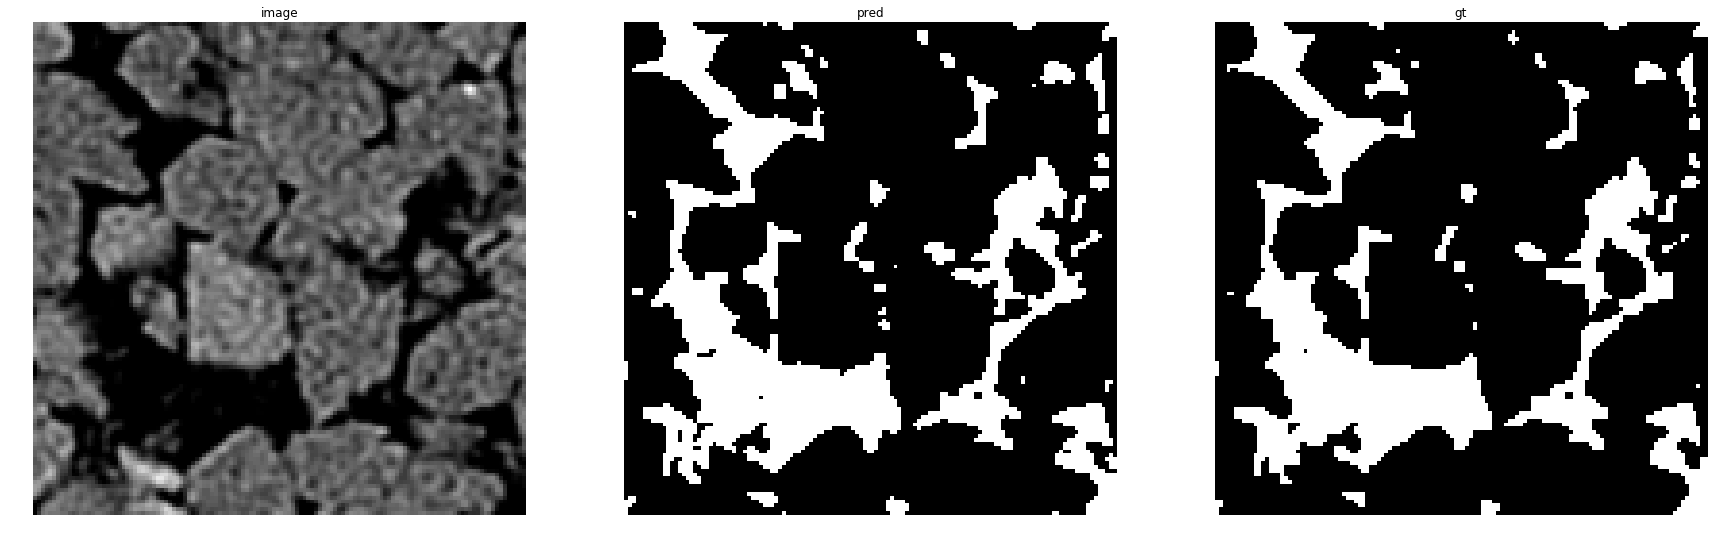

accuracy    : 0.97711181640625
precision   : 0.9240537240537241
recall      : 0.9833679833679834
f1          : 0.9527886189097319
pr_auc      : 0.9951916653064898
iou         : 0.9098340947343111


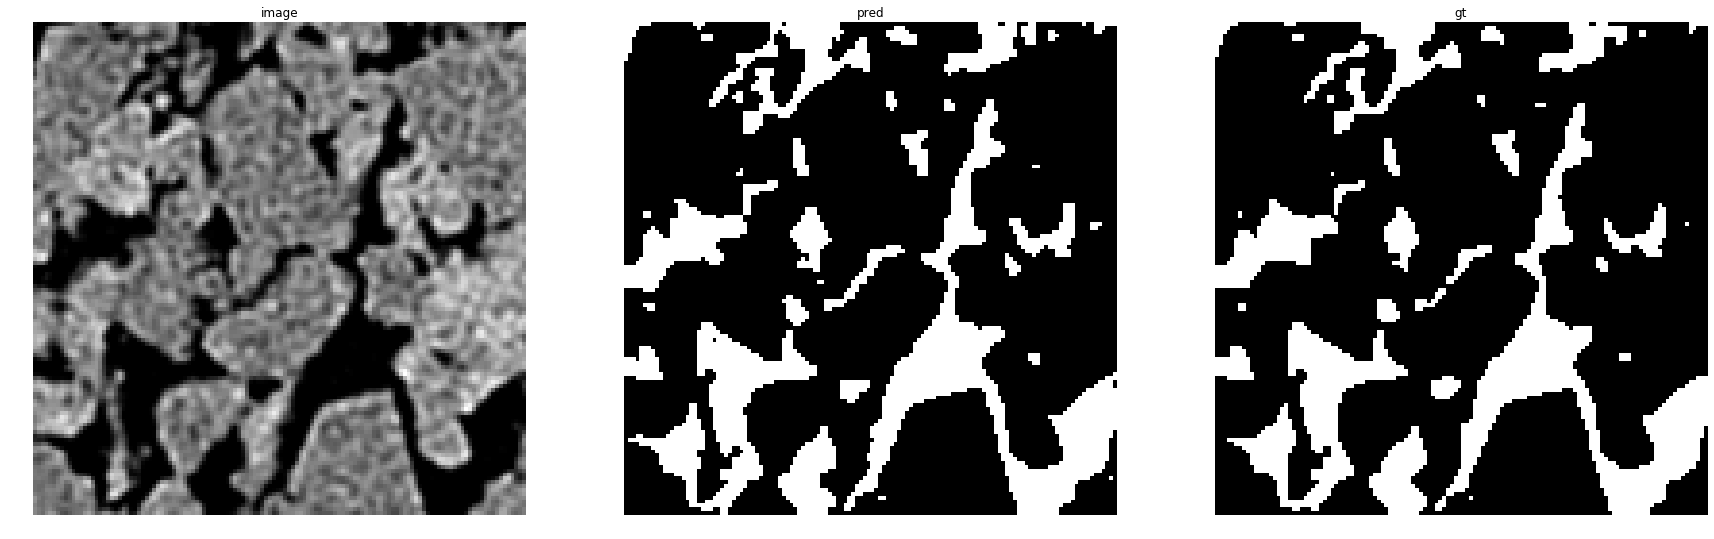

accuracy    : 0.98065185546875
precision   : 0.9341677096370463
recall      : 0.9857369255150554
f1          : 0.9592597352525382
pr_auc      : 0.9958562598463252
iou         : 0.9217090639664115


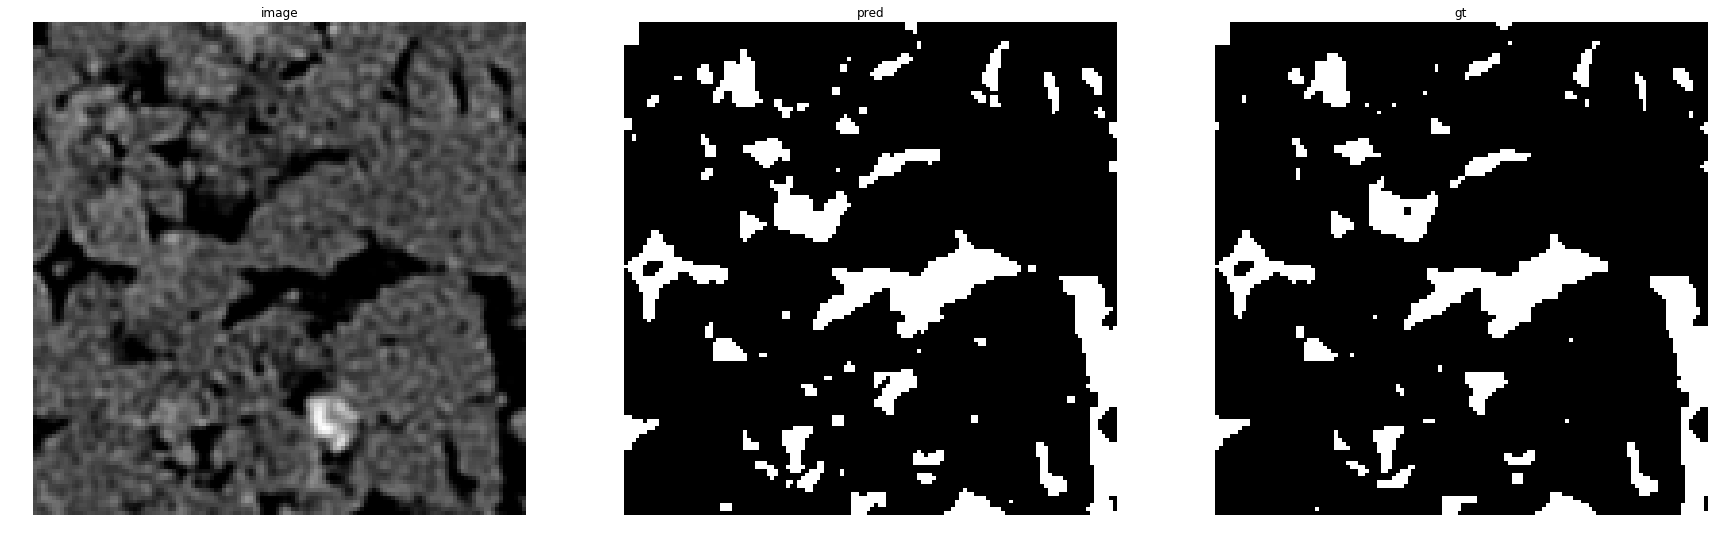

accuracy    : 0.979248046875
precision   : 0.8769356153219234
recall      : 0.982648401826484
f1          : 0.9267872523686478
pr_auc      : 0.9911085761297904
iou         : 0.8635634028892456


In [28]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [29]:
stack_name = 'carbRNF'

In [30]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:01, 690.41it/s]
100%|██████████| 700/700 [00:07<00:00, 98.57it/s] 


In [31]:
predicted_stack = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 244617.34it/s]
25200it [02:03, 203.81it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3187.39it/s]


In [33]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack.preds, 
                                    mode='stack')))

accuracy    : 0.974182
precision   : 0.832910
recall      : 0.967346
f1          : 0.895108
pr_auc      : 0.981873
iou         : 0.810132
